<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Machine_Larning_CM2604_Bank_Data/blob/main/ML_CW_AI%26DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Predictive Modeling for Classification Tasks Using Machine Learning and Neural Networks

---

# Name - Sachinthana

# RGU - 2330931

# IIT - 20231122

In [61]:
#1) Key Steps:
# 1. Load the dataset and perform initial exploration (dimensions, missing values, data types).
# 2. Identify categorical and numerical features and distinguish between discrete and continuous ones.
# 3. Visualize distributions of features (continuous and categorical) using histograms and boxplots.
# 4. Detect outliers using boxplots and analyze correlations (numerical with heatmaps, categorical with Cramér's V).
# 5. Encode the target variable for binary classification and analyze its correlation with numerical features.
# 6. All visualizations use modern color schemes for better aesthetics and clarity.


In [62]:
# Import essential libraries for data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import statistical tools
from scipy.stats import chi2_contingency

# Data preprocessing utilities
from sklearn.preprocessing import LabelEncoder

# Resampling technique for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing machine learning models
from sklearn.ensemble import RandomForestClassifier

# --- Handle Class Imbalance ---
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Metrics for model performance evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

# Deep learning framework
from keras.models import Sequential
from keras.layers import Dense
from keras import Input

import warnings
import math
warnings.filterwarnings('ignore')


# Exploratory Data Analysis (EDA) for Banking Dataset

In [63]:
# Step 1: Load and Examine the Dataset

# Read the dataset from a CSV file using ';' as a delimiter
bank_data = pd.read_csv('bank-full.csv', sep=';')
#--- Create a copy of the original data before encoding
original_bank_data = bank_data.copy()

# Display the first few rows of the dataset in a table format
print("### First 5 rows of the dataset ###")
display(bank_data.head())  # This will display the first 5 rows in table format in Jupyter/Colab

# Print the data types of all columns in a table format
print("\n### Data Types of Each Column ###")
data_types_table = pd.DataFrame(bank_data.dtypes, columns=['Data Type'])
display(data_types_table)

# Display the number of rows and columns in the dataset
print(f"\n### Dataset Dimensions ###")
dimensions_table = pd.DataFrame({
    'Description': ['Number of Rows', 'Number of Columns'],
    'Count': [bank_data.shape[0], bank_data.shape[1]]
})
display(dimensions_table)


### First 5 rows of the dataset ###


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no


### Data Types of Each Column ###


Data Type
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object


### Dataset Dimensions ###


Description  Count
0     Number of Rows  45211
1  Number of Columns     17

Check for Missing Values

In [64]:
# Step 2: Check for Missing Values
missing_values = bank_data.isnull().sum()

# Display missing values in a clear table format
print("### Missing Values in Each Column ###")
missing_values_table = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values Count': missing_values.values,
    'Percentage of Missing Values': (missing_values.values / bank_data.shape[0]) * 100
})

# Display the missing values table
display(missing_values_table)

### Missing Values in Each Column ###


Column Name  Missing Values Count  Percentage of Missing Values
0          age                     0                           0.0
1          job                     0                           0.0
2      marital                     0                           0.0
3    education                     0                           0.0
4      default                     0                           0.0
5      balance                     0                           0.0
6      housing                     0                           0.0
7         loan                     0                           0.0
8      contact                     0                           0.0
9          day                     0                           0.0
10       month                     0                           0.0
11    duration                     0                           0.0
12    campaign                     0                           0.0
13       pdays                     0                           0.0
14    previous                     0                           0.0
15    poutcome                     0                           0.0
16           y                     0                           0.0

Identify Categorical and Numerical Features

In [65]:
# Step 3: Identify Categorical and Numerical Features

# S1: Extract Categorical Columns (excluding the target variable)
categorical_cols = bank_data.select_dtypes(include='object').columns[:-1]  # Exclude the target column
print("Categorical Features (excluding target variable)")
print(categorical_cols.tolist(), end="\n\n")

# S2: Extract Numerical Columns
numeric_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features")
print(numeric_cols.tolist())

Categorical Features (excluding target variable)
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Numerical Features
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Separate Discrete and Continuous Features

In [66]:
# Step 4: Separate Discrete and Continuous Features
discrete_cols = [col for col in numeric_cols if bank_data[col].nunique() <= 25]
continuous_cols = [col for col in numeric_cols if bank_data[col].nunique() > 25]

# Display Discrete and Continuous Numerical Features in a Clear Format
print("### Discrete Numerical Features (with <= 25 unique values) ###")
print(discrete_cols if discrete_cols else "No discrete features found.", end="\n\n")

print("### Continuous Numerical Features (with > 25 unique values) ###")
print(continuous_cols if continuous_cols else "No continuous features found.")

### Discrete Numerical Features (with <= 25 unique values) ###
No discrete features found.

### Continuous Numerical Features (with > 25 unique values) ###
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Analyze Unique Values for Specific Features

In [67]:
# Define a list of specific features you want to analyze
specific_features = ['job', 'marital', 'education', 'pdays', 'age']

# Create a dictionary to store the unique values for each feature
unique_values = {}

# Loop through the selected features and gather unique values
for feature in specific_features:
    unique_values[feature] = bank_data[feature].unique()

# Display the unique values for the selected features
print("### Unique Values for Specific Features ###\n")
for feature, values in unique_values.items():
    print(f"Feature: {feature}")
    print(f"Unique Values: {values}")
    print(f"Number of Unique Values: {len(values)}\n")

### Unique Values for Specific Features ###

Feature: job
Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Number of Unique Values: 12

Feature: marital
Unique Values: ['married' 'single' 'divorced']
Number of Unique Values: 3

Feature: education
Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Number of Unique Values: 4

Feature: pdays
Unique Values: [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245

Frequency Counts for Categorical Features

In [68]:
# Step 5: Frequency Counts for Categorical Features
print("### Frequency Counts for Categorical Features ###\n")

# Loop through each categorical column to display the value counts and percentage
for column in categorical_cols:
    print(f"\n### {column} Value Counts ###")

    # Get the frequency count of each unique value
    value_counts = bank_data[column].value_counts()

    # Get the percentage of each category
    percentage_counts = bank_data[column].value_counts(normalize=True) * 100

    # Create a DataFrame to display both counts and percentages
    frequency_table = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentage_counts.round(2)  # Rounded to 2 decimal places for clarity
    })

    # Display the frequency table
    display(frequency_table)

### Frequency Counts for Categorical Features ###


### job Value Counts ###


Count  Percentage
job                             
blue-collar     9732       21.53
management      9458       20.92
technician      7597       16.80
admin.          5171       11.44
services        4154        9.19
retired         2264        5.01
self-employed   1579        3.49
entrepreneur    1487        3.29
unemployed      1303        2.88
housemaid       1240        2.74
student          938        2.07
unknown          288        0.64


### marital Value Counts ###


Count  Percentage
marital                    
married   27214       60.19
single    12790       28.29
divorced   5207       11.52


### education Value Counts ###


Count  Percentage
education                   
secondary  23202       51.32
tertiary   13301       29.42
primary     6851       15.15
unknown     1857        4.11


### default Value Counts ###


Count  Percentage
default                   
no       44396        98.2
yes        815         1.8


### housing Value Counts ###


Count  Percentage
housing                   
yes      25130       55.58
no       20081       44.42


### loan Value Counts ###


Count  Percentage
loan                   
no    37967       83.98
yes    7244       16.02


### contact Value Counts ###


Count  Percentage
contact                     
cellular   29285       64.77
unknown    13020       28.80
telephone   2906        6.43


### month Value Counts ###


Count  Percentage
month                   
may    13766       30.45
jul     6895       15.25
aug     6247       13.82
jun     5341       11.81
nov     3970        8.78
apr     2932        6.49
feb     2649        5.86
jan     1403        3.10
oct      738        1.63
sep      579        1.28
mar      477        1.06
dec      214        0.47


### poutcome Value Counts ###


Count  Percentage
poutcome                   
unknown   36959       81.75
failure    4901       10.84
other      1840        4.07
success    1511        3.34

Visualize Categorical Feature Distributions

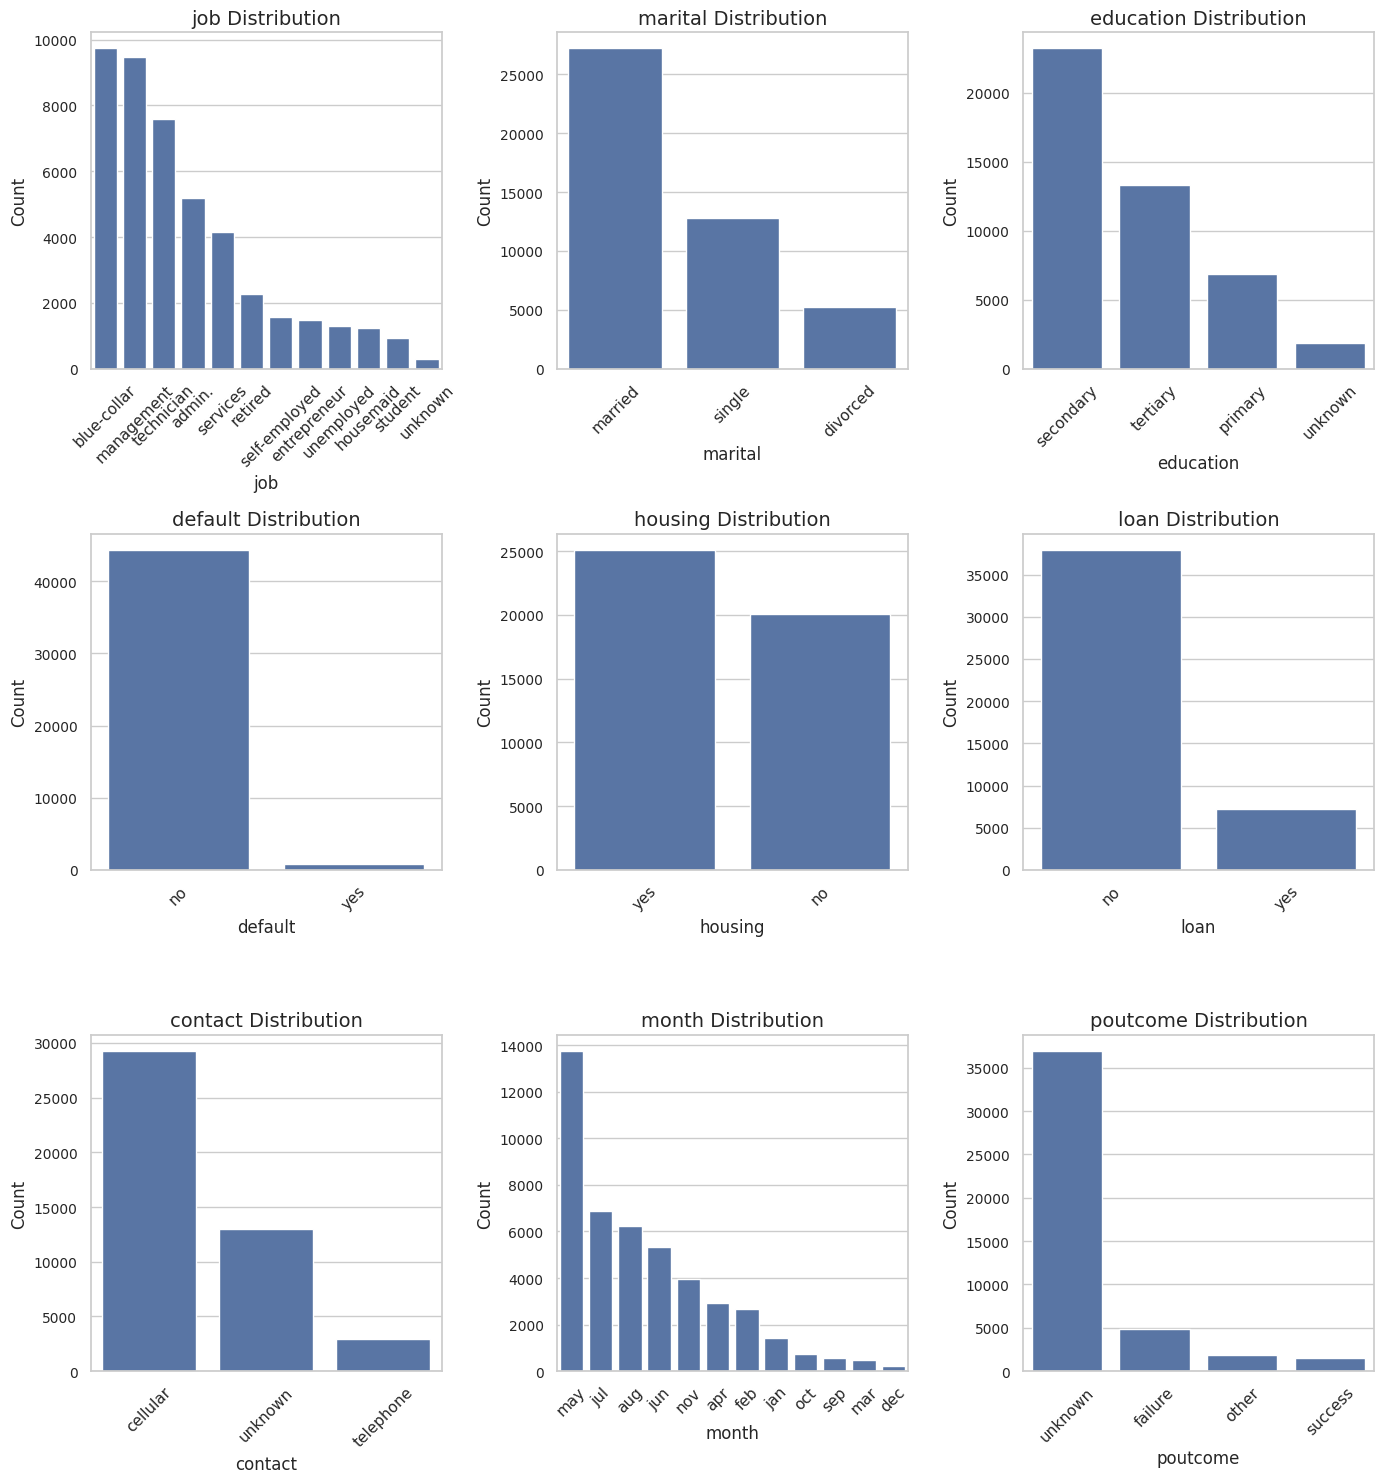

In [69]:
# Step 6: Visualizing Categorical Feature Distributions with Advanced Color Scheme
# Set up the figure with dynamically calculated rows and columns for subplots
n_cols = 3  # Number of columns for the subplots grid
n_rows = (len(categorical_cols) // n_cols) + (len(categorical_cols) % n_cols > 0)  # Calculate rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))  # Adjust figure size dynamically
axs = axs.flatten()

# Set a custom advanced color palette (e.g., "Set2" for a pastel color palette)
sns.set_palette("Set2")

# Loop through categorical columns to create count plots
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=bank_data, x=col, order=bank_data[col].value_counts().index, ax=axs[idx])
    axs[idx].set_title(f"{col} Distribution", fontsize=14)
    axs[idx].set_xlabel(col, fontsize=12)
    axs[idx].set_ylabel("Count", fontsize=12)
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].tick_params(axis='y', labelsize=10)

# Hide any empty subplots if there are fewer than 9 categorical columns
for idx in range(len(categorical_cols), len(axs)):
    axs[idx].axis('off')

# Adjust the layout and spacing between plots
plt.tight_layout()
plt.show()

 Summary Statistics for Numerical Features

In [70]:
# Step 7: Descriptive Statistics for Numerical Features
# Generate the summary statistics for numerical features
numerical_summary = bank_data.describe()

# Display the numerical summary
print("### Numerical Features Summary ###\n")
print(numerical_summary)

#Insights for Numerical Features
# 1. Skewness: Measures the asymmetry of the distribution of values
skewness = bank_data[numeric_cols].skew()

# 2. Kurtosis: Measures the "tailedness" of the distribution
kurtosis = bank_data[numeric_cols].kurt()

# 3. Correlations between numerical features
correlations = bank_data[numeric_cols].corr()

# Display skewness and kurtosis
print("\n### Skewness for Numerical Features ###")
print(skewness)

print("\n### Kurtosis for Numerical Features ###")
print(kurtosis)


### Numerical Features Summary ###

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.

Visualize Continuous Feature Distributions

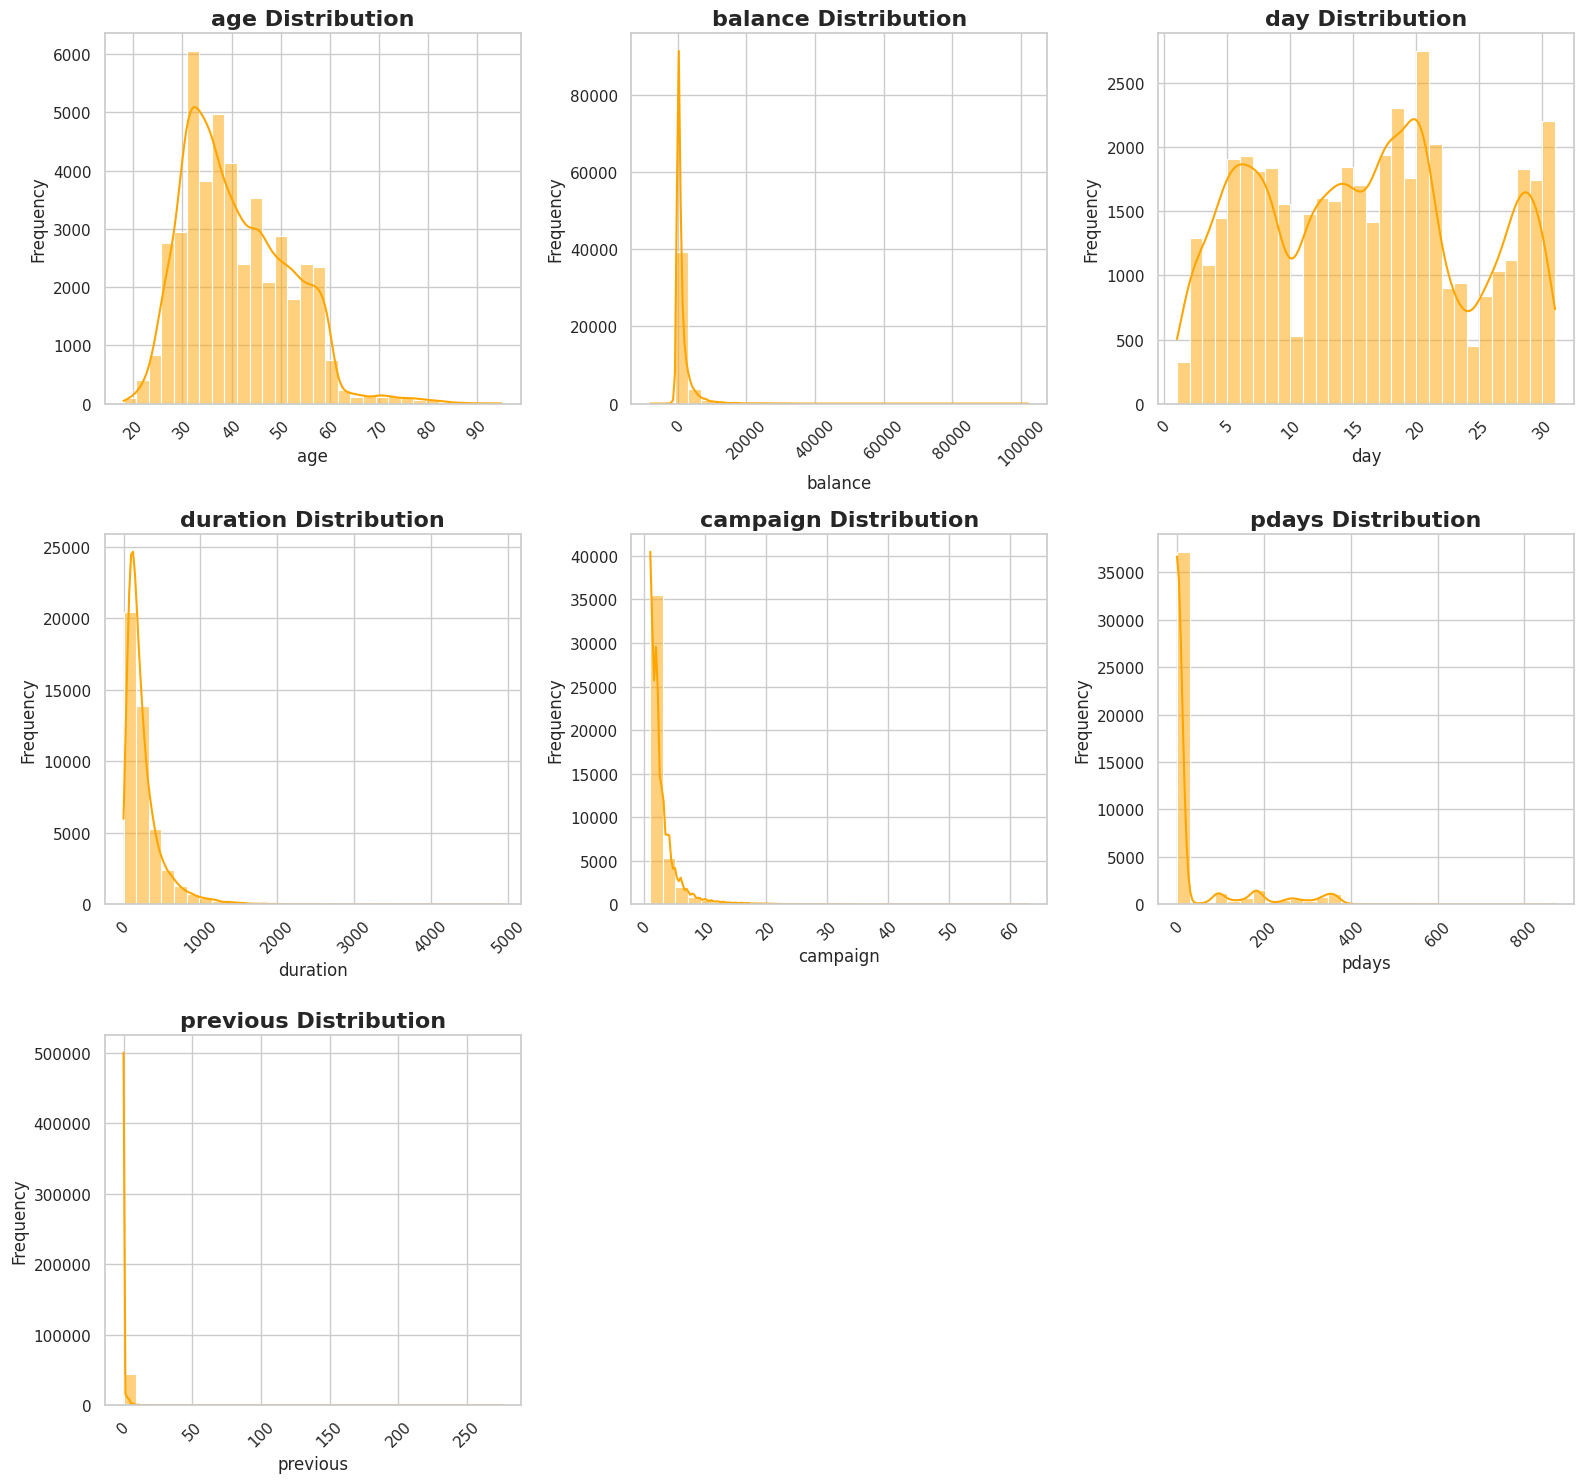

In [71]:
# Step 8: Continuous Feature Distributions

# Set up the plot aesthetics
sns.set(style="whitegrid")

# -------------------------- Numerical Feature Distribution --------------------------
# Dynamically calculate the number of rows and columns for subplots
num_features = len(numeric_cols)
rows = math.ceil(num_features / 3)  # Assuming 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 5))  # Adjust grid size based on features
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot histograms with KDE for each numerical feature
for i, col in enumerate(numeric_cols):
    sns.histplot(bank_data[col], kde=True, color='orange', ax=axes[i], bins=30)
    axes[i].set_title(f"{col} Distribution", fontsize=16, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused axes (in case there are fewer numerical features than subplots)
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure all plots fit well
plt.tight_layout()
plt.show()

Analyze and Plot Discrete Numerical Features (e.g., 'day')

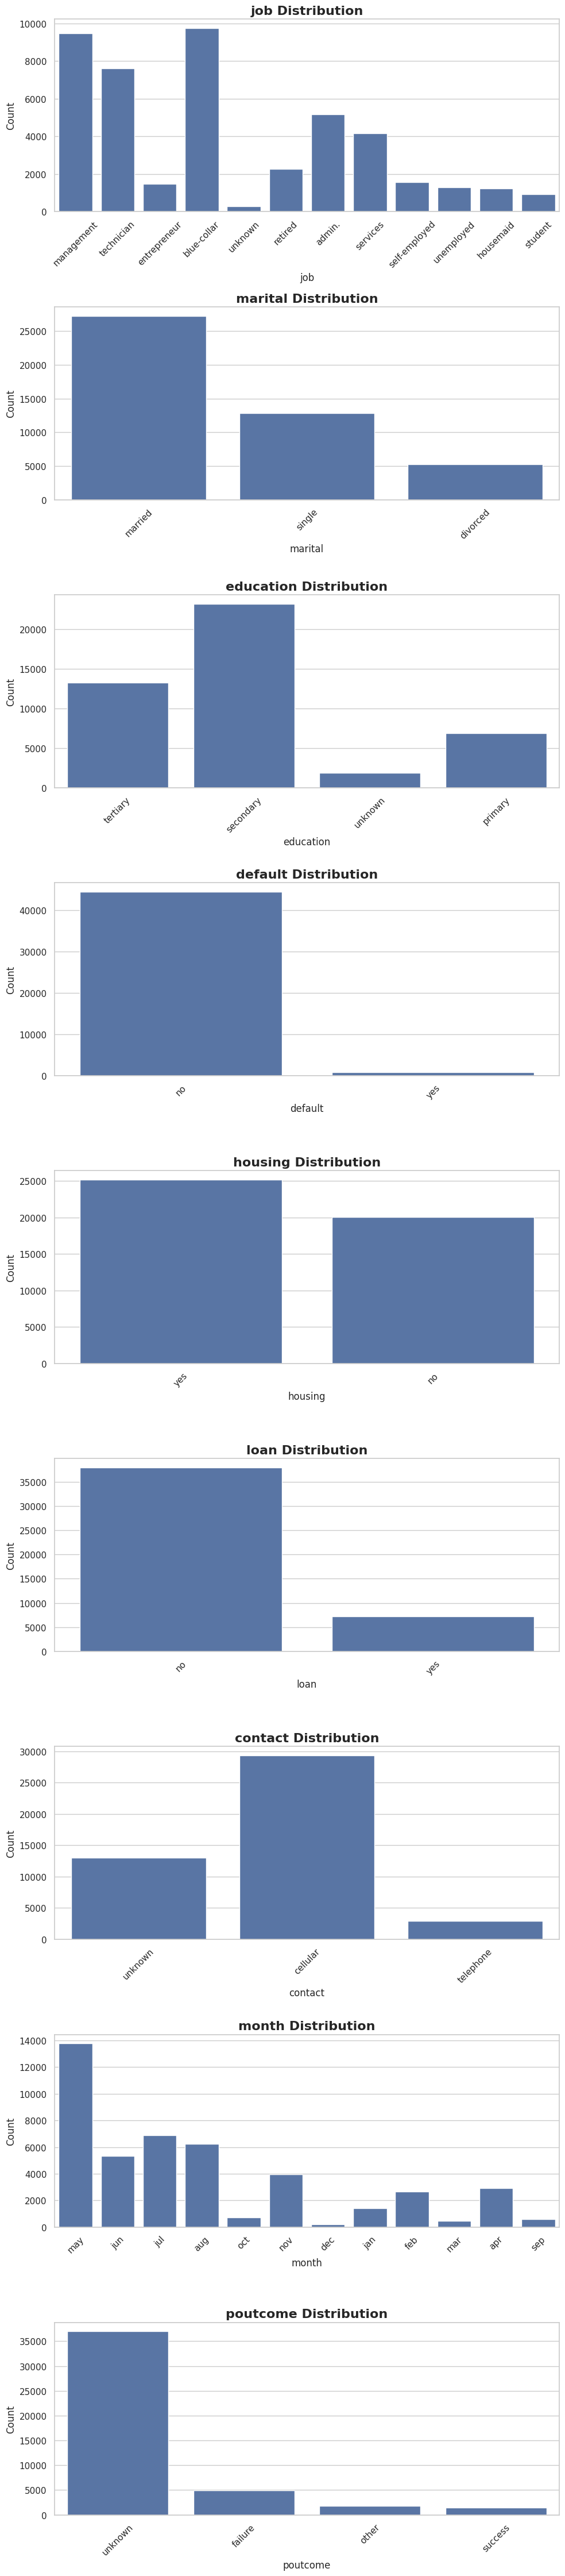

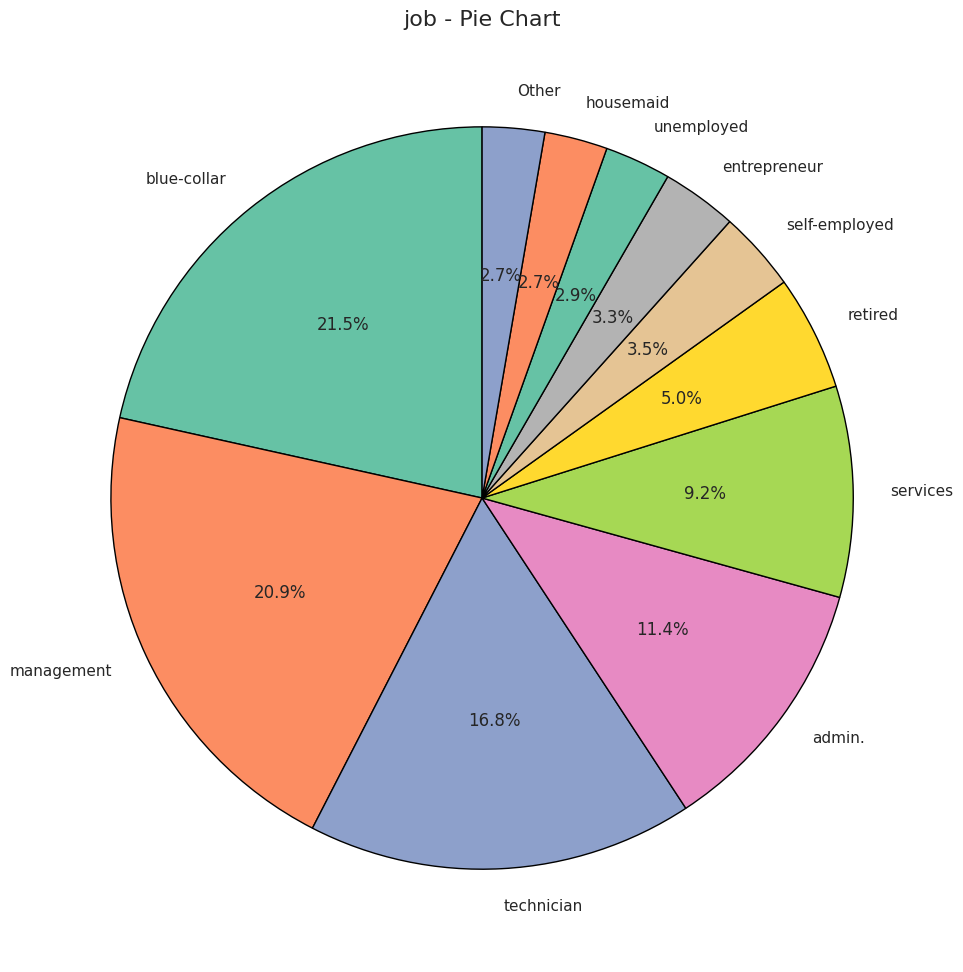

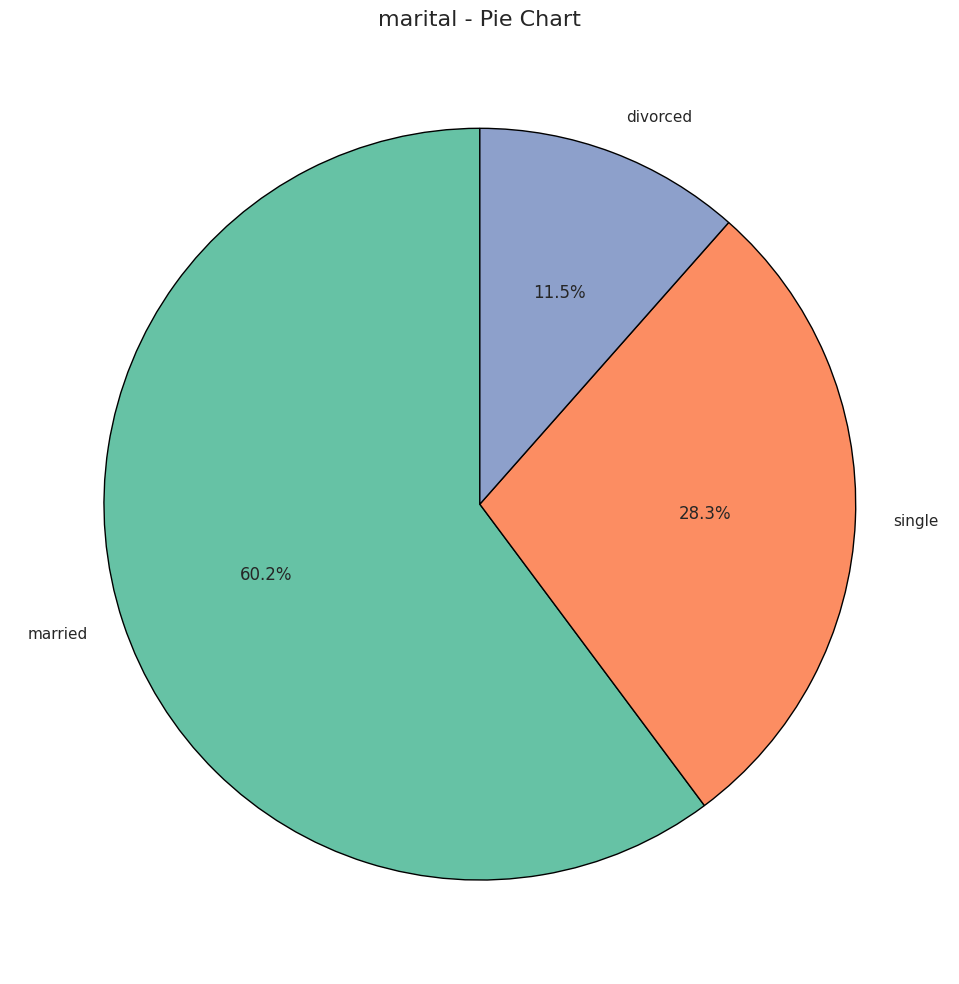

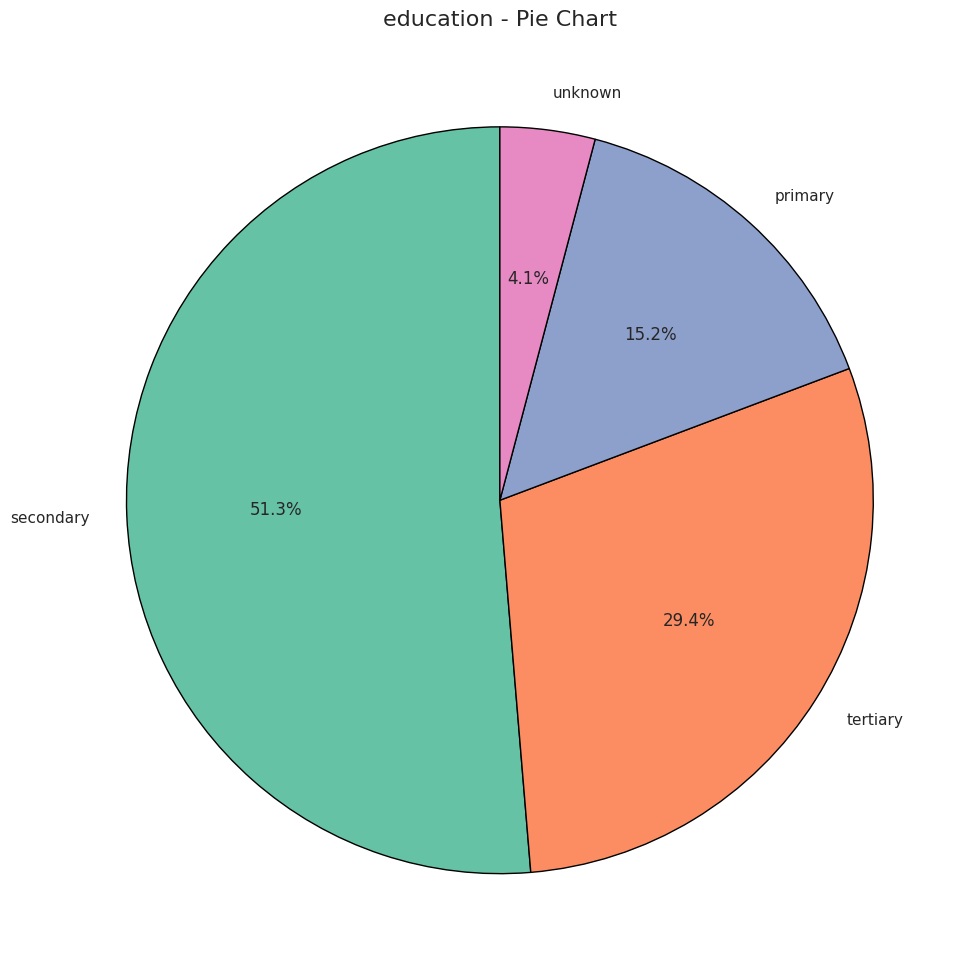

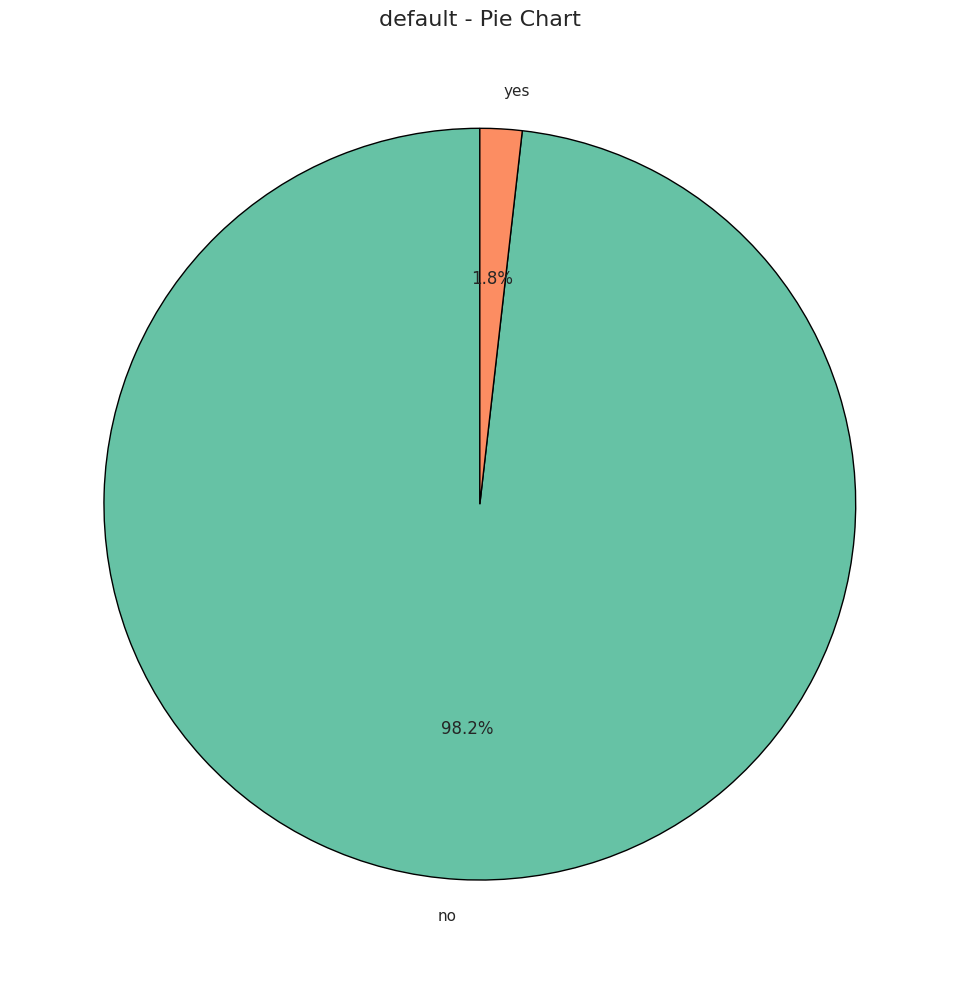

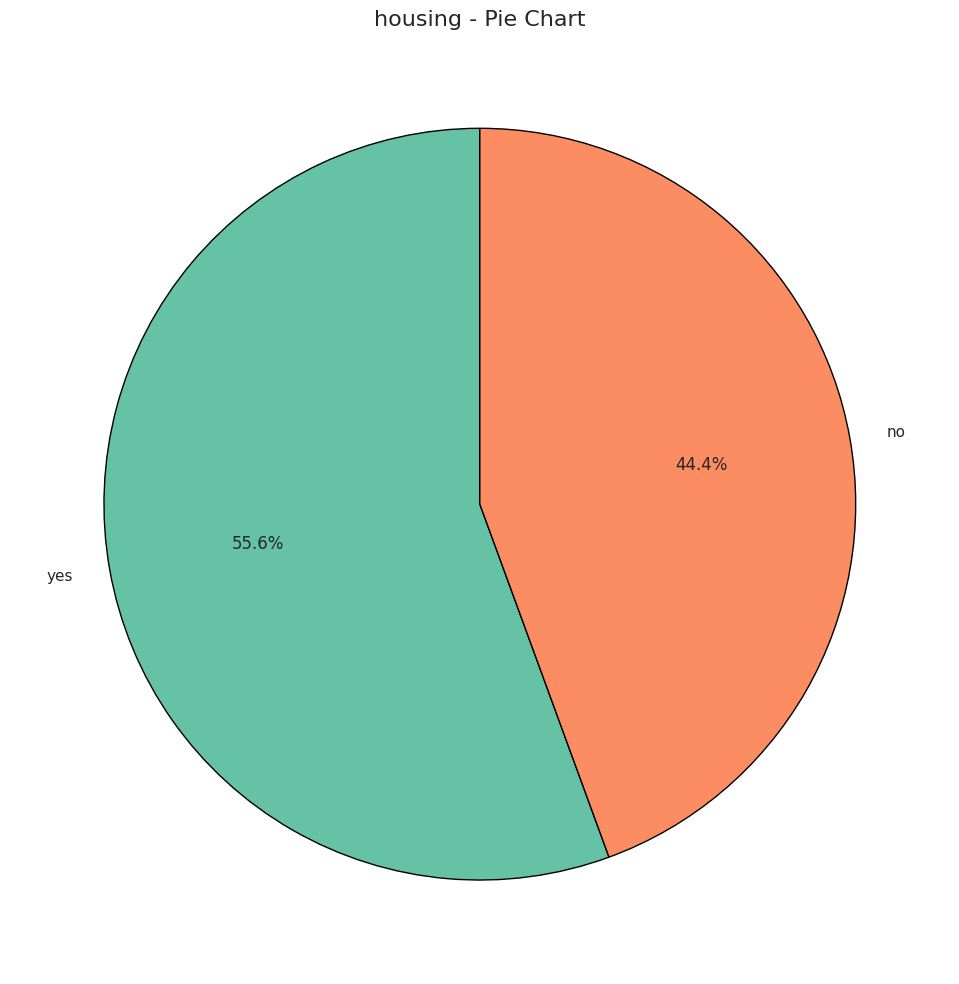

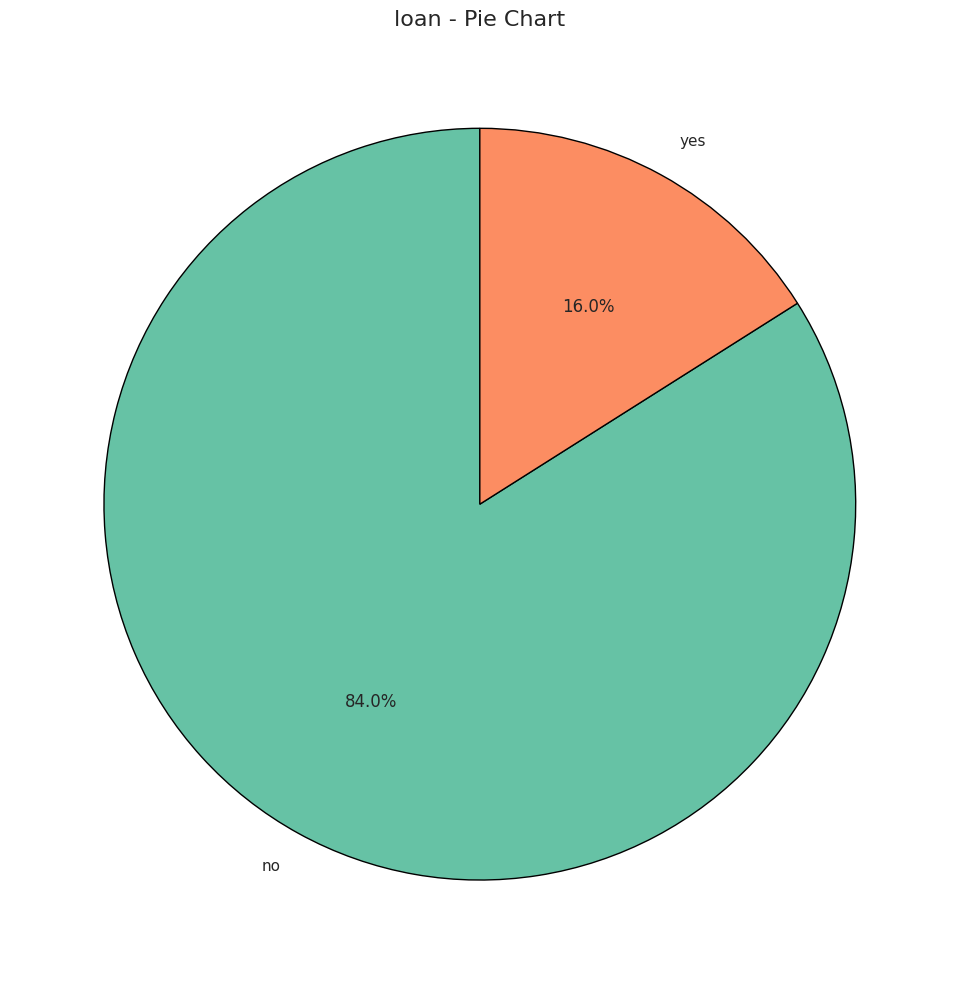

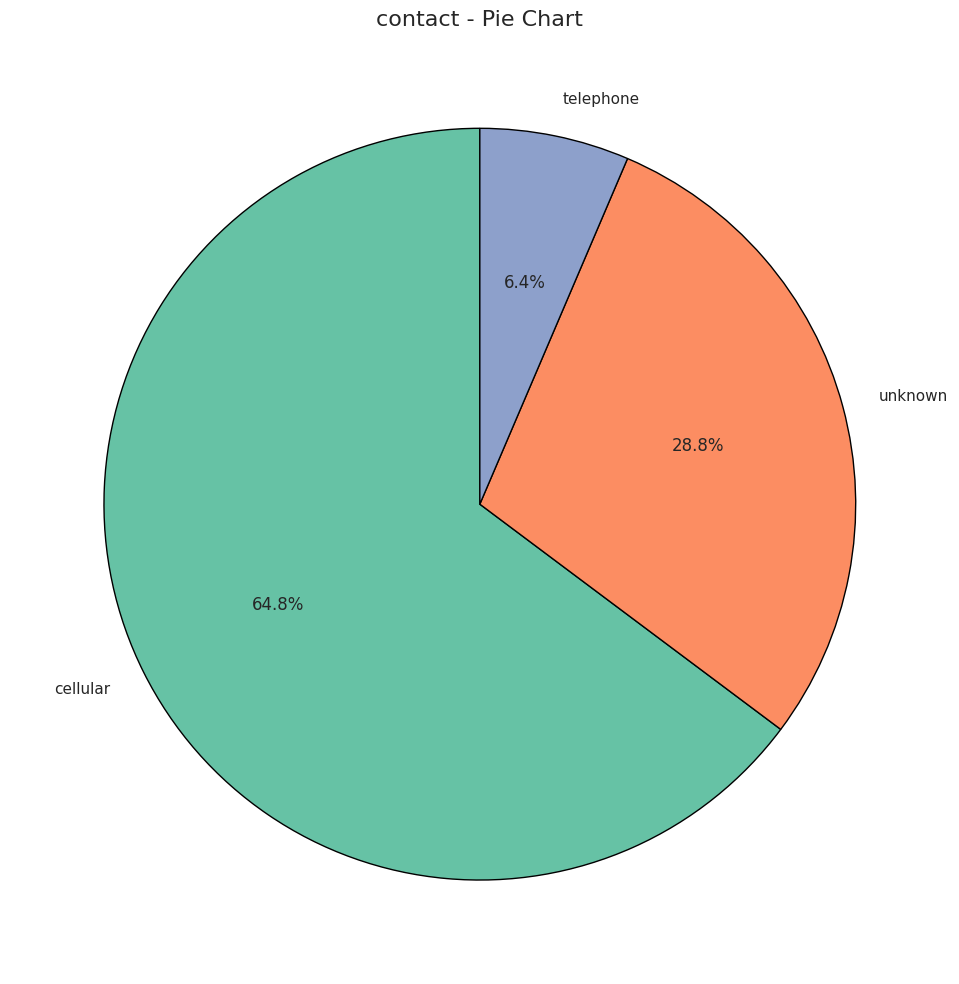

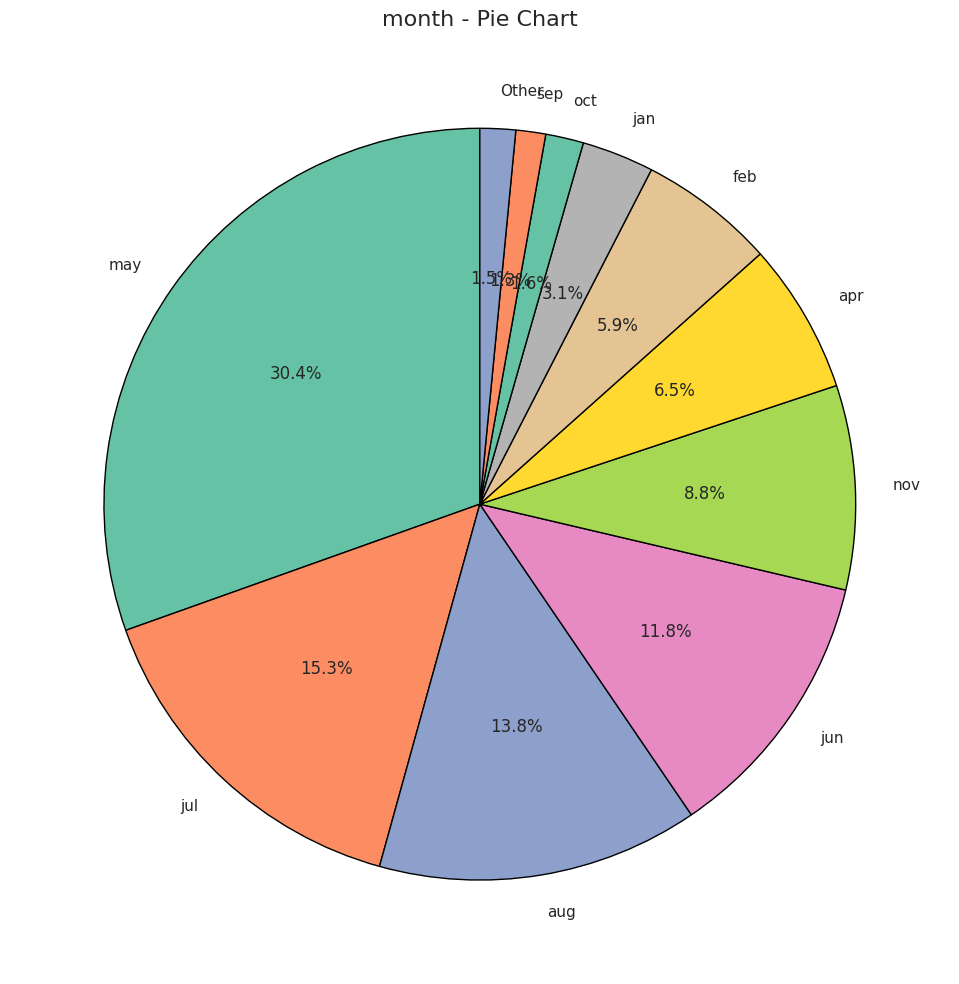

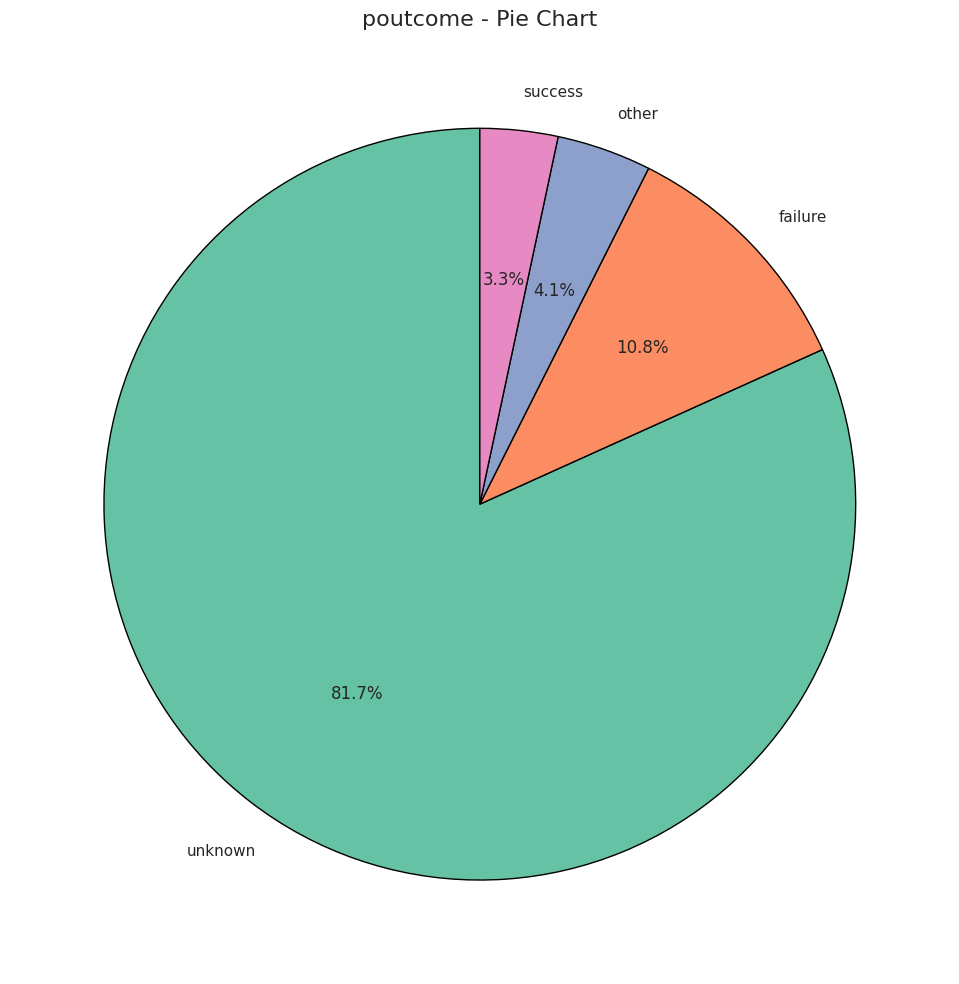

In [72]:
#Step 9
# -------------------------- Categorical Feature Distribution --------------------------
# Create bar plots for categorical features
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 5 * len(categorical_cols)))

# Check if only one categorical feature is present
if len(categorical_cols) == 1:
    axes = [axes]

# Plot the distribution for each categorical feature
for i, col in enumerate(categorical_cols):
    sns.countplot(data=bank_data, x=col, ax=axes[i])
    axes[i].set_title(f"{col} Distribution", fontsize=16, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to make sure all plots fit well
plt.tight_layout()
plt.show()

# -------------------------- Pie Charts for Categorical Features --------------------------
# Plot pie charts for categorical features (with improved layout)
for col in categorical_cols:
    plt.figure(figsize=(8, 8))

    # Group small categories into 'Other'
    value_counts = bank_data[col].value_counts()
    if len(value_counts) > 10:  # Limit the number of categories to prevent clutter
        other_category_count = value_counts[10:].sum()
        value_counts = value_counts[:10]
        value_counts['Other'] = other_category_count

    # Plot the pie chart with improved aesthetics
    value_counts.plot.pie(autopct='%1.1f%%',
                          colors=sns.color_palette('Set2', n_colors=len(value_counts)),
                          startangle=90,
                          wedgeprops={'edgecolor': 'black'},  # Adds borders to the wedges for clarity
                          figsize=(10, 10))

    plt.title(f"{col} - Pie Chart", fontsize=16)
    plt.ylabel('')  # Remove the y-label
    plt.tight_layout()  # Ensure the layout is tight and labels fit
    plt.show()

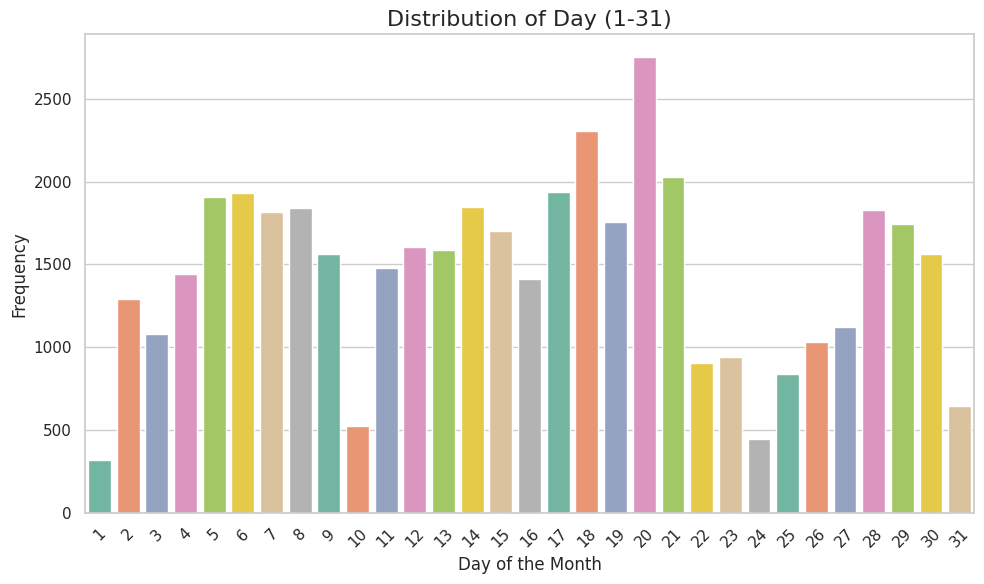

In [73]:
# Step 9: Analyze 'day' Feature Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=bank_data, hue='day', palette='Set2', legend=False)
plt.title("Distribution of Day (1-31)", fontsize=16)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Outlier Detection with Boxplots

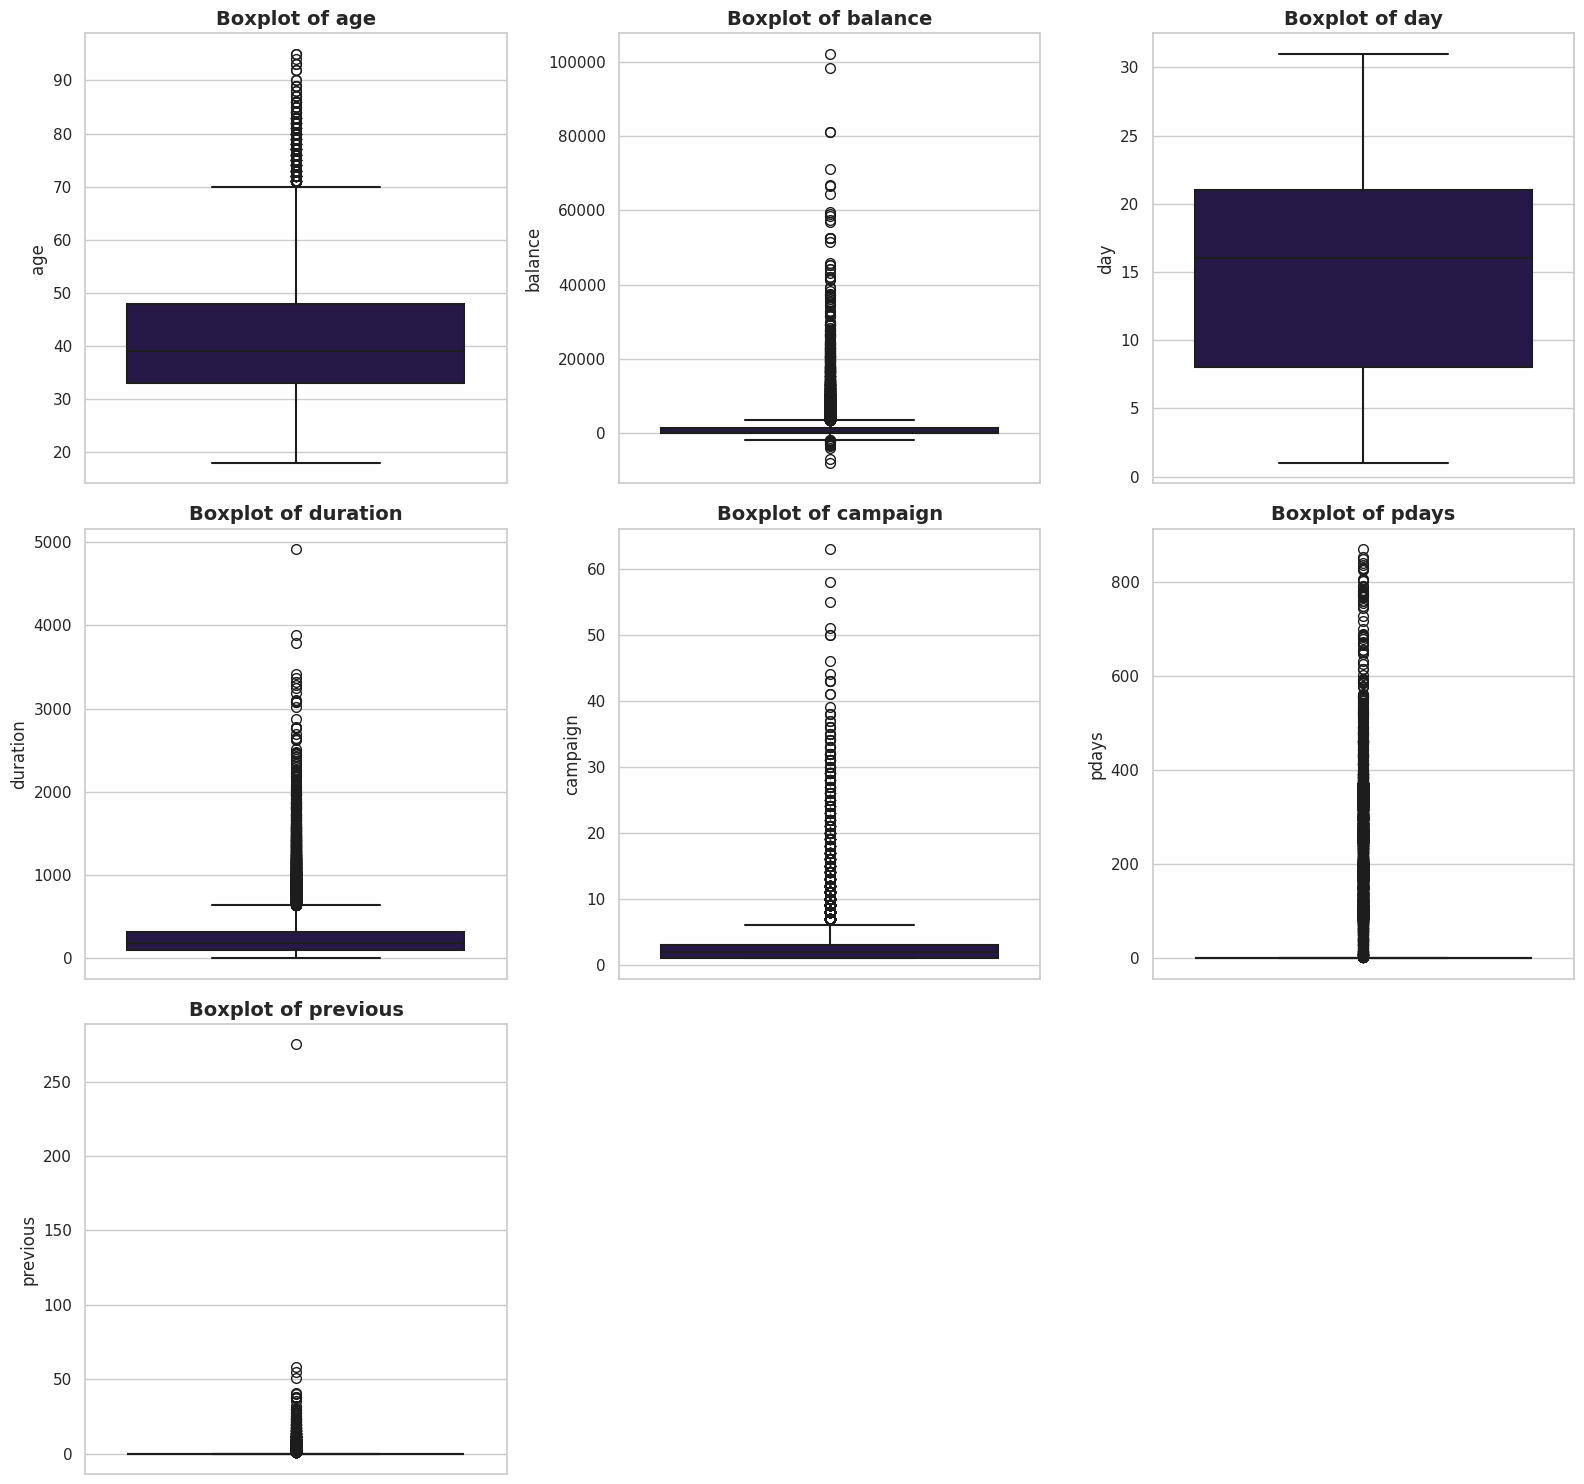

In [74]:
# Step 10: Outlier Detection (Boxplots)

# Dynamically calculate the number of rows and columns for subplots
num_features = len(numeric_cols)
cols = 3  # Number of columns for the grid
rows = math.ceil(num_features / cols)  # Calculate rows dynamically

# Create a figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Set a color palette for boxplots (using default or "magma" without hue)
palette = "magma"  # A visually appealing color palette for outlier detection

# Plot a boxplot for each numerical feature
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=bank_data, y=feature, ax=axes[i], color=sns.color_palette(palette)[0], fliersize=7, linewidth=1.5)
    axes[i].set_title(f"Boxplot of {feature}", fontsize=14, weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off axes for unused subplots (if there are any)
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing and readability
plt.tight_layout()
plt.show()


Correlation Analysis for Numerical Features

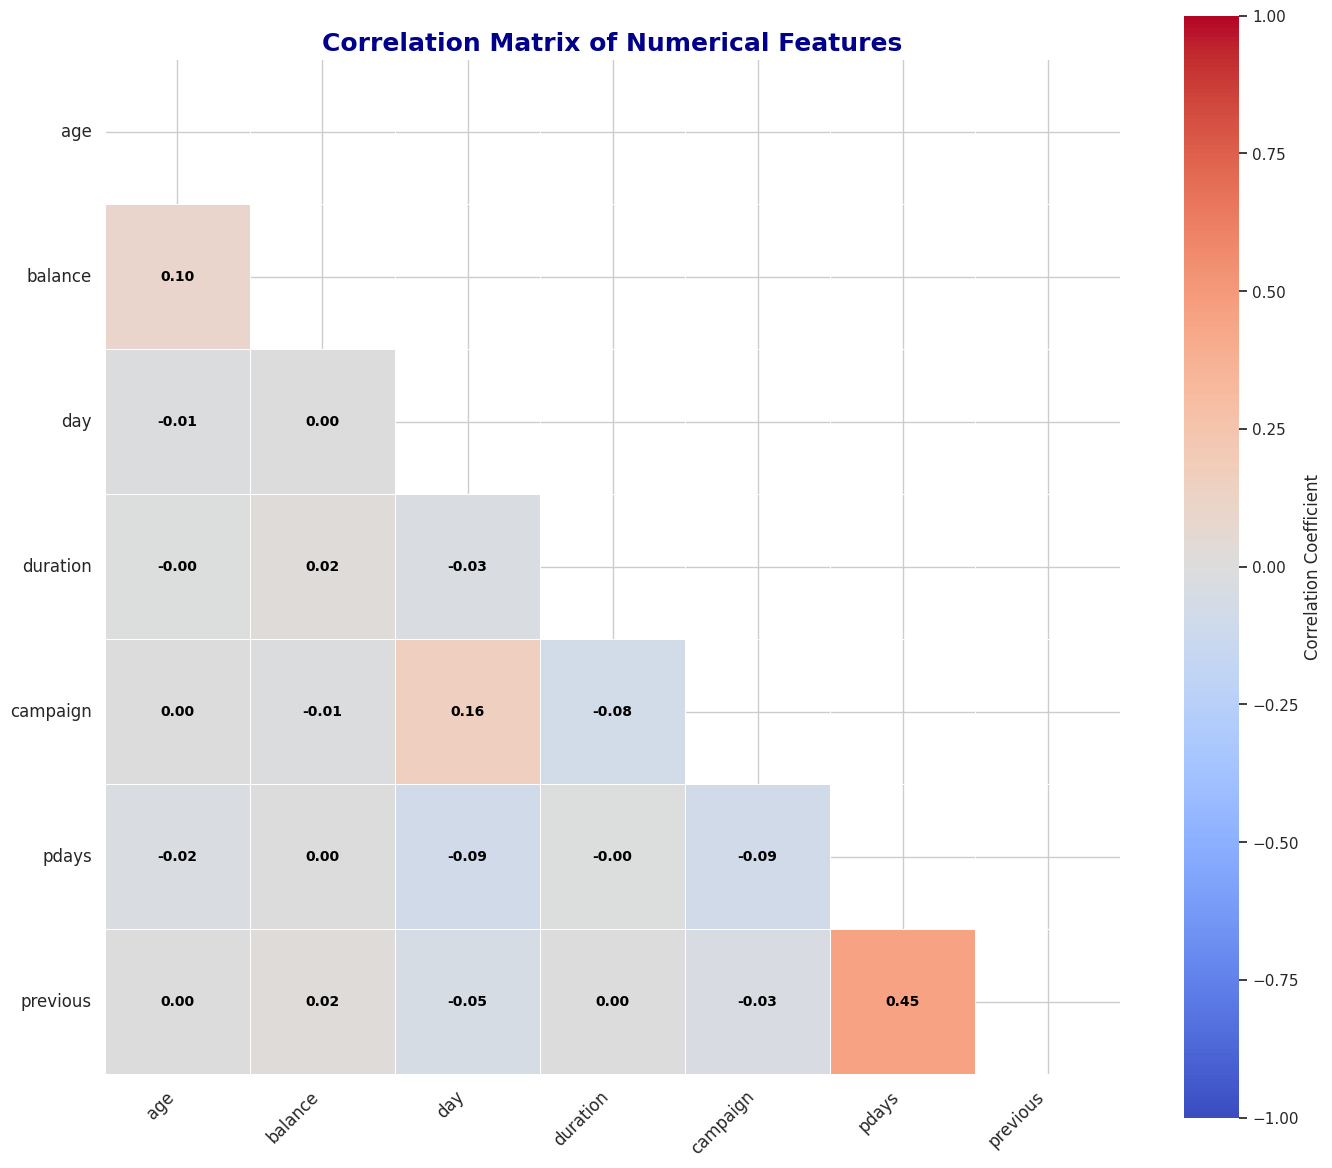

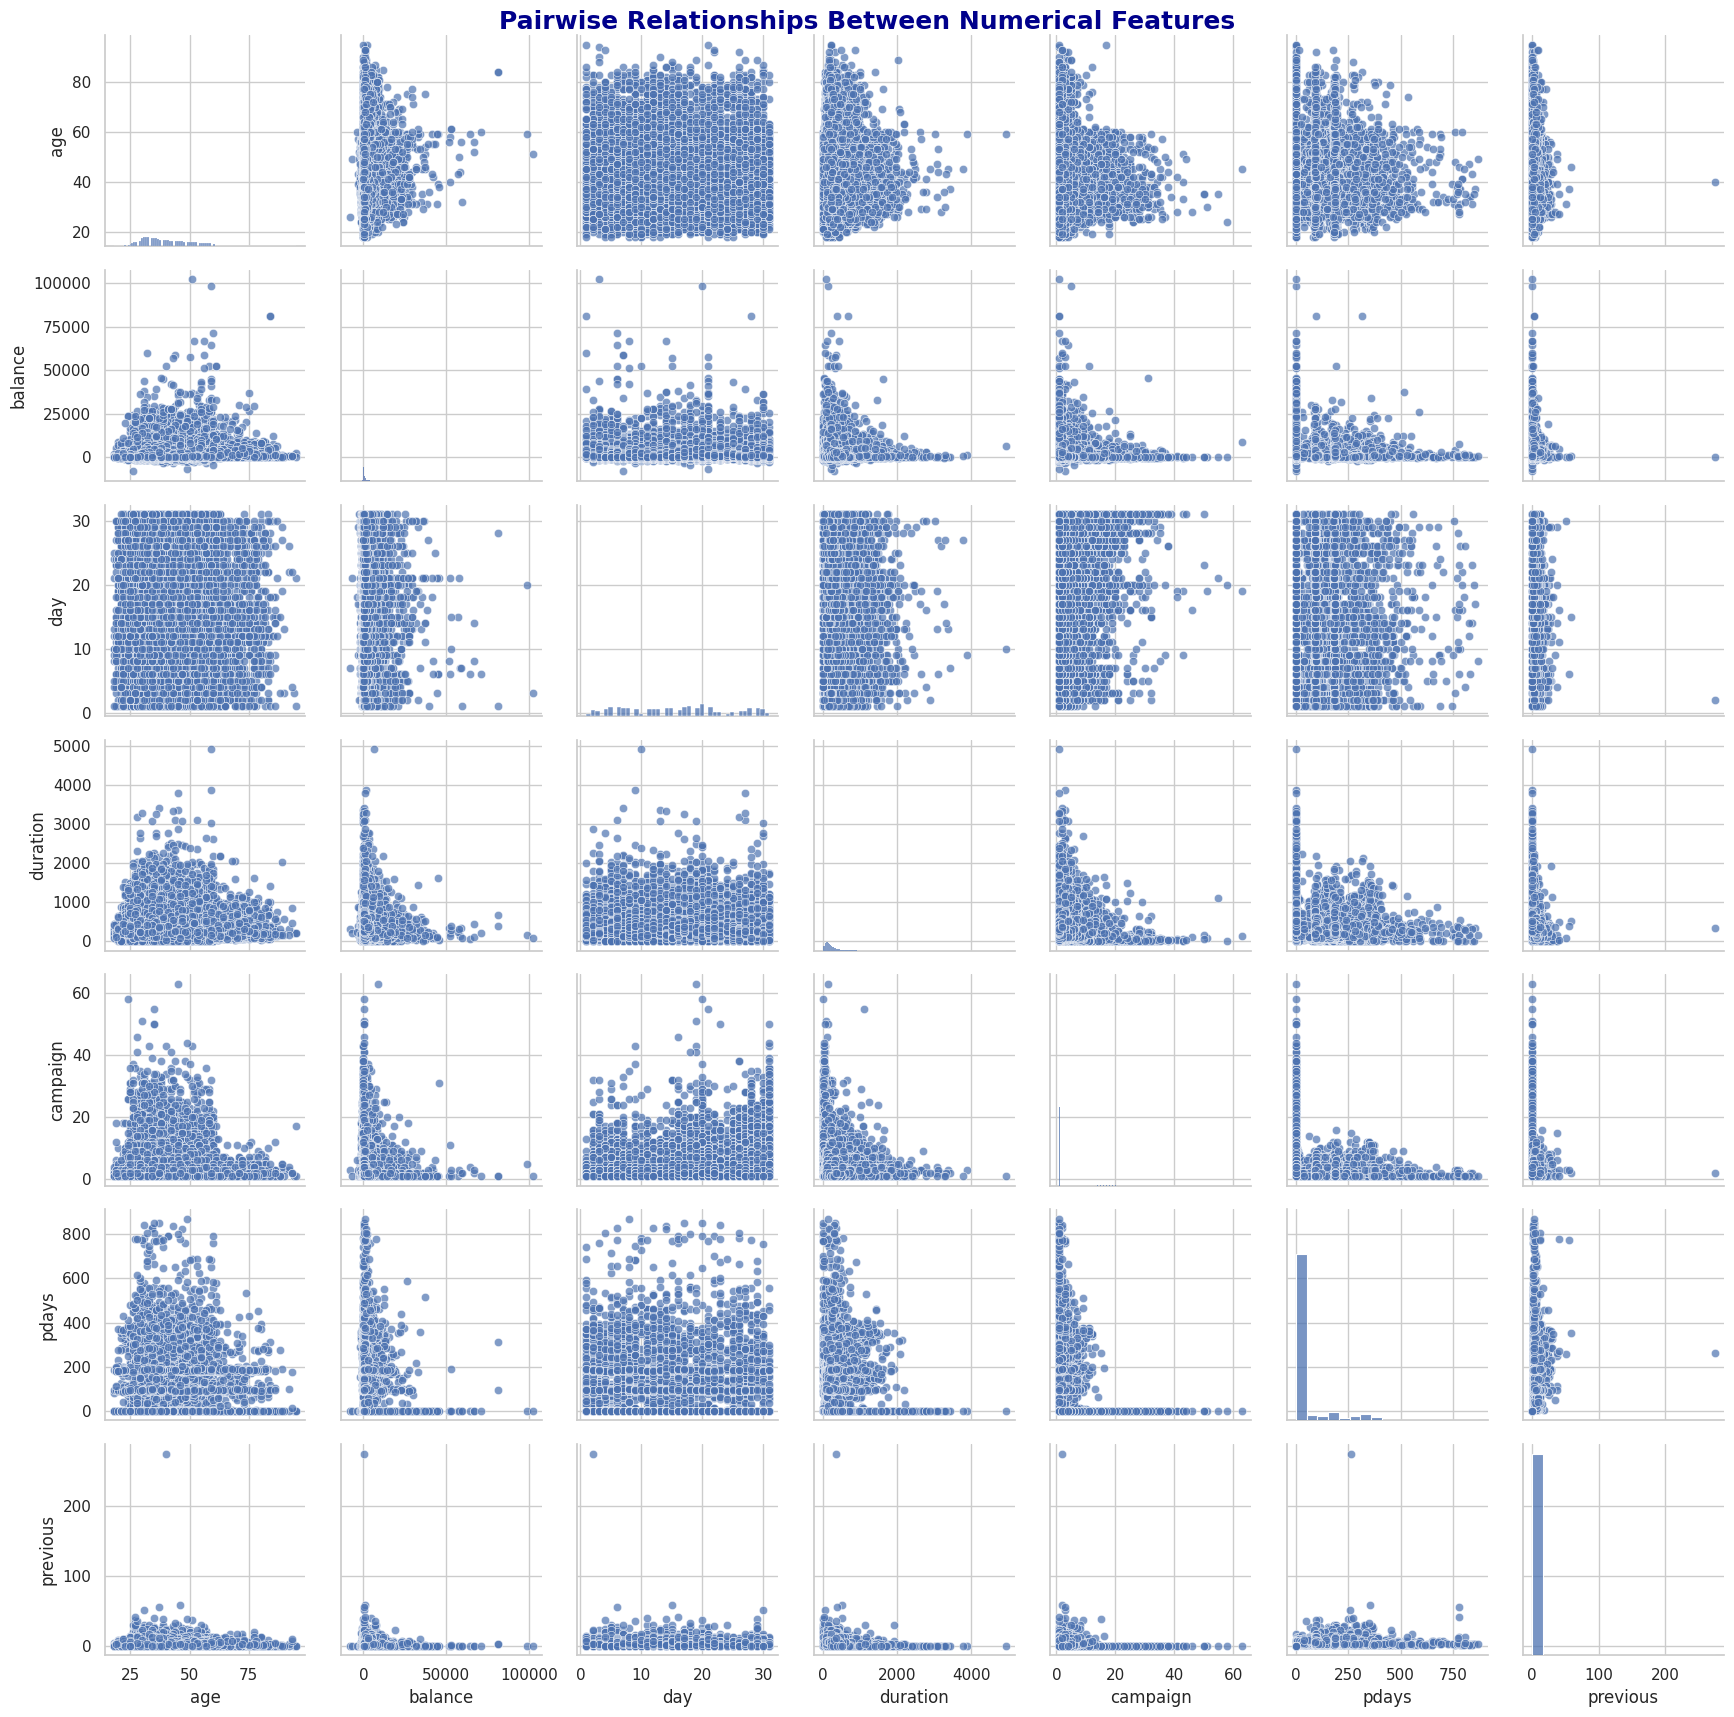

In [75]:
# Compute the correlation matrix
corr_matrix = bank_data[numeric_cols].corr(method='pearson')

# Create a figure with size
plt.figure(figsize=(14, 12))

# Advanced heatmap plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'},
            square=True, mask=np.triu(corr_matrix), center=0)

# Title and axis customization
plt.title('Correlation Matrix of Numerical Features', fontsize=18, weight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Pairwise plot for selected features (just to get a sense of relationships)
sns.pairplot(bank_data[numeric_cols], kind="scatter", plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Numerical Features', fontsize=18, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()

In [76]:
print(categorical_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


FOR ALL VARIABLES

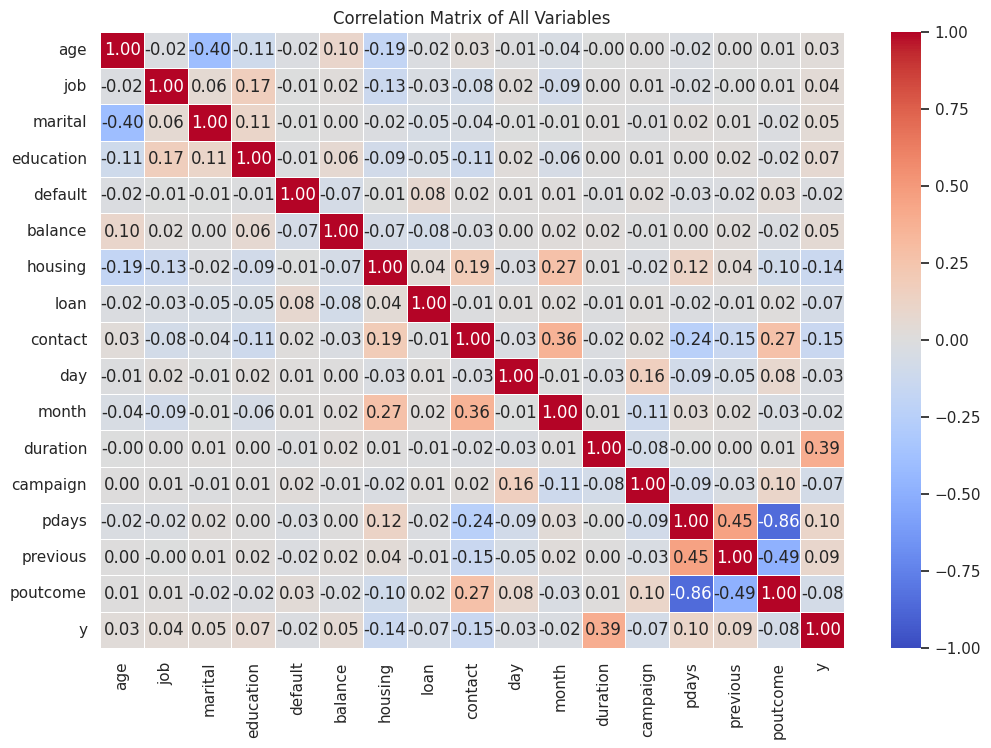

In [77]:
# Create a label encoder
label_encoder = LabelEncoder()

# Store the original labels in a dictionary
label_mappings = {}

# Encode categorical features, including the target variable 'y', to numeric
categorical_cols_with_target = categorical_cols.tolist() + ['y'] # Include target 'y'

for column in categorical_cols_with_target:  # Loop includes 'y' now
    label_encoder.fit(bank_data[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    bank_data[column] = label_encoder.transform(bank_data[column])

# Now calculate the correlation matrix for all variables
correlation_matrix = bank_data.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of All Variables")
plt.show()


 Cramér's V for Categorical Features

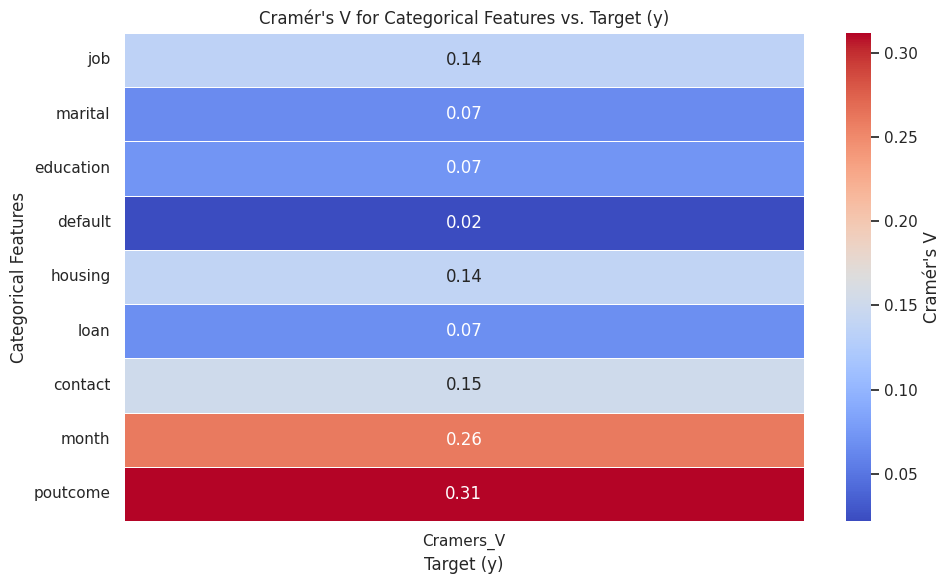

In [78]:
# Cramér's V calculation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if chi2_stat > 0 else 0

# Initialize a dictionary to store Cramér's V values for each feature
cramers_v_values = {}

# Calculate Cramér's V for each categorical feature against the target 'y'
for col in categorical_cols:
    cramers_v_values[col] = cramers_v(bank_data[col], bank_data['y'])

# Convert the dictionary to a DataFrame for easy plotting
cramers_v_df = pd.DataFrame(cramers_v_values, index=['Cramers_V']).T  # Transpose for heatmap

# Plotting the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V for Categorical Features vs. Target (y)")
plt.xlabel("Target (y)")  # Since we transposed, 'y' is now on the x-axis
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()

Check for Duplicate Records

In [79]:
# Step 1: Find fully duplicated rows by comparing all columns
duplicates_all_columns = bank_data[bank_data.duplicated(keep=False)]

# Step 2: Show the total number of fully duplicated records
total_duplicates = duplicates_all_columns.shape[0]
print(f"Total number of fully duplicated records: {total_duplicates}")

# Step 3: If you want to display the first few fully duplicated records for inspection
if total_duplicates > 0:
    print("\nFirst few fully duplicated records:")
    print(duplicates_all_columns.head())

Total number of fully duplicated records: 0


Target Class Distribution

Target Value Counts:
y
0    39922
1     5289
Name: count, dtype: int64

Target Proportions (%):
y
0    88.30152
1    11.69848
Name: count, dtype: float64


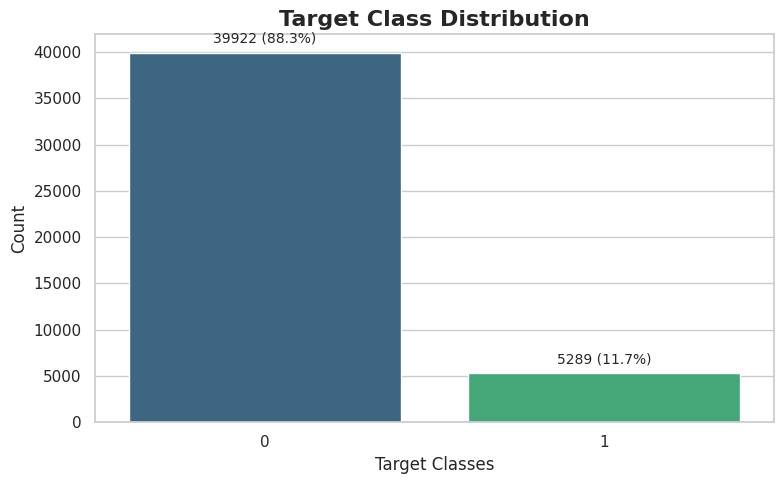

In [80]:
# Count and percentage distribution of target classes
target_counts = bank_data['y'].value_counts()
target_percentage = target_counts / len(bank_data) * 100  # More efficient calculation

# Display results (unchanged)
print("Target Value Counts:")
print(target_counts)
print("\nTarget Proportions (%):")
print(target_percentage)

# Visualize the target class distribution with enhancements
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")  # Enhanced color palette
plt.title("Target Class Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Target Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({(p.get_height() / len(bank_data) * 100):.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Feature Relationship with Target Variable

A. Categorical Features

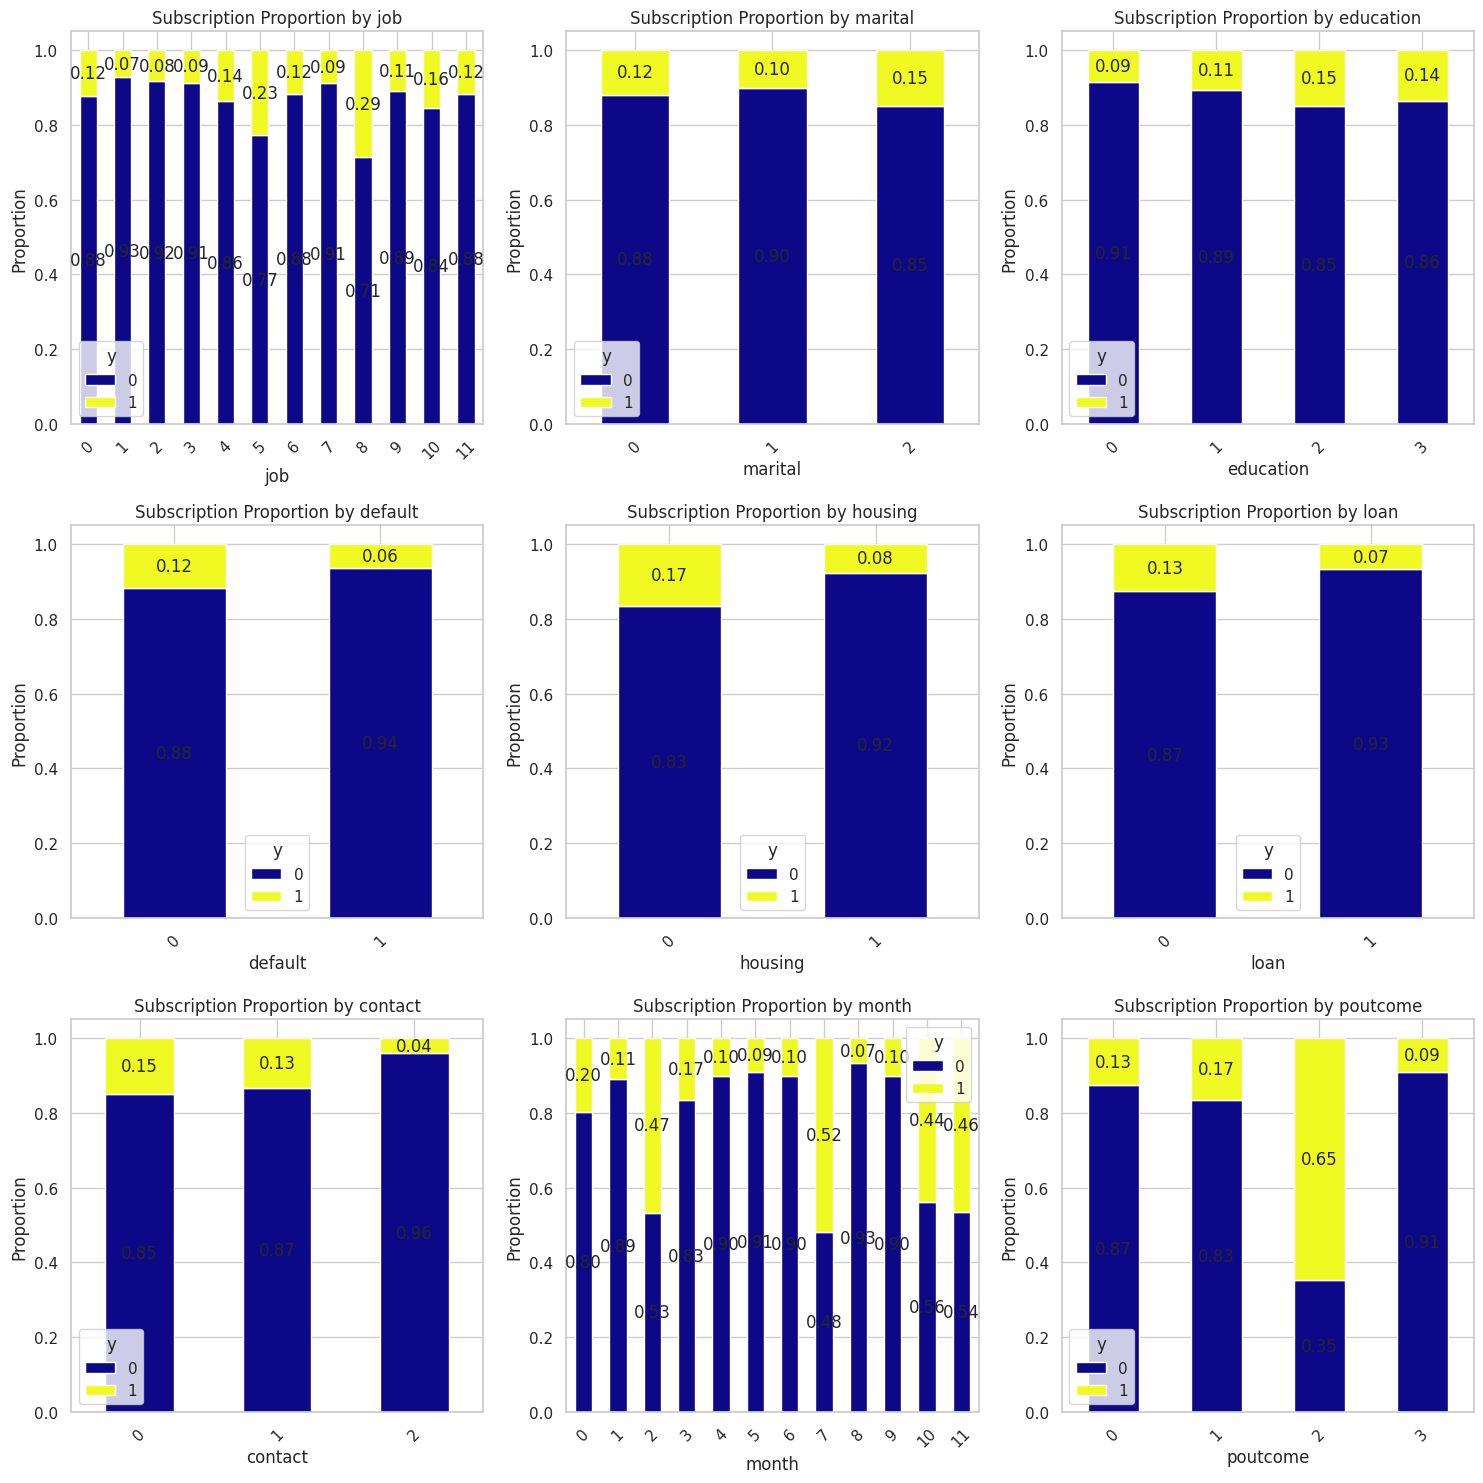

In [81]:
# Create subplots dynamically
import math
rows = math.ceil(len(categorical_cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Advanced color palette
palette = "plasma"  # or "magma", "plasma", "inferno", etc.

# Plot relationships for each categorical feature using a stacked bar plot with a different color palette
for i, feature in enumerate(categorical_cols):
    cross_tab = pd.crosstab(bank_data[feature], bank_data['y'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap=palette)  # Applying the color palette here
    axes[i].set_title(f"Subscription Proportion by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

    # Adding annotations for clarity (optional)
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

# Turn off unused axes
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

B. Numerical Features

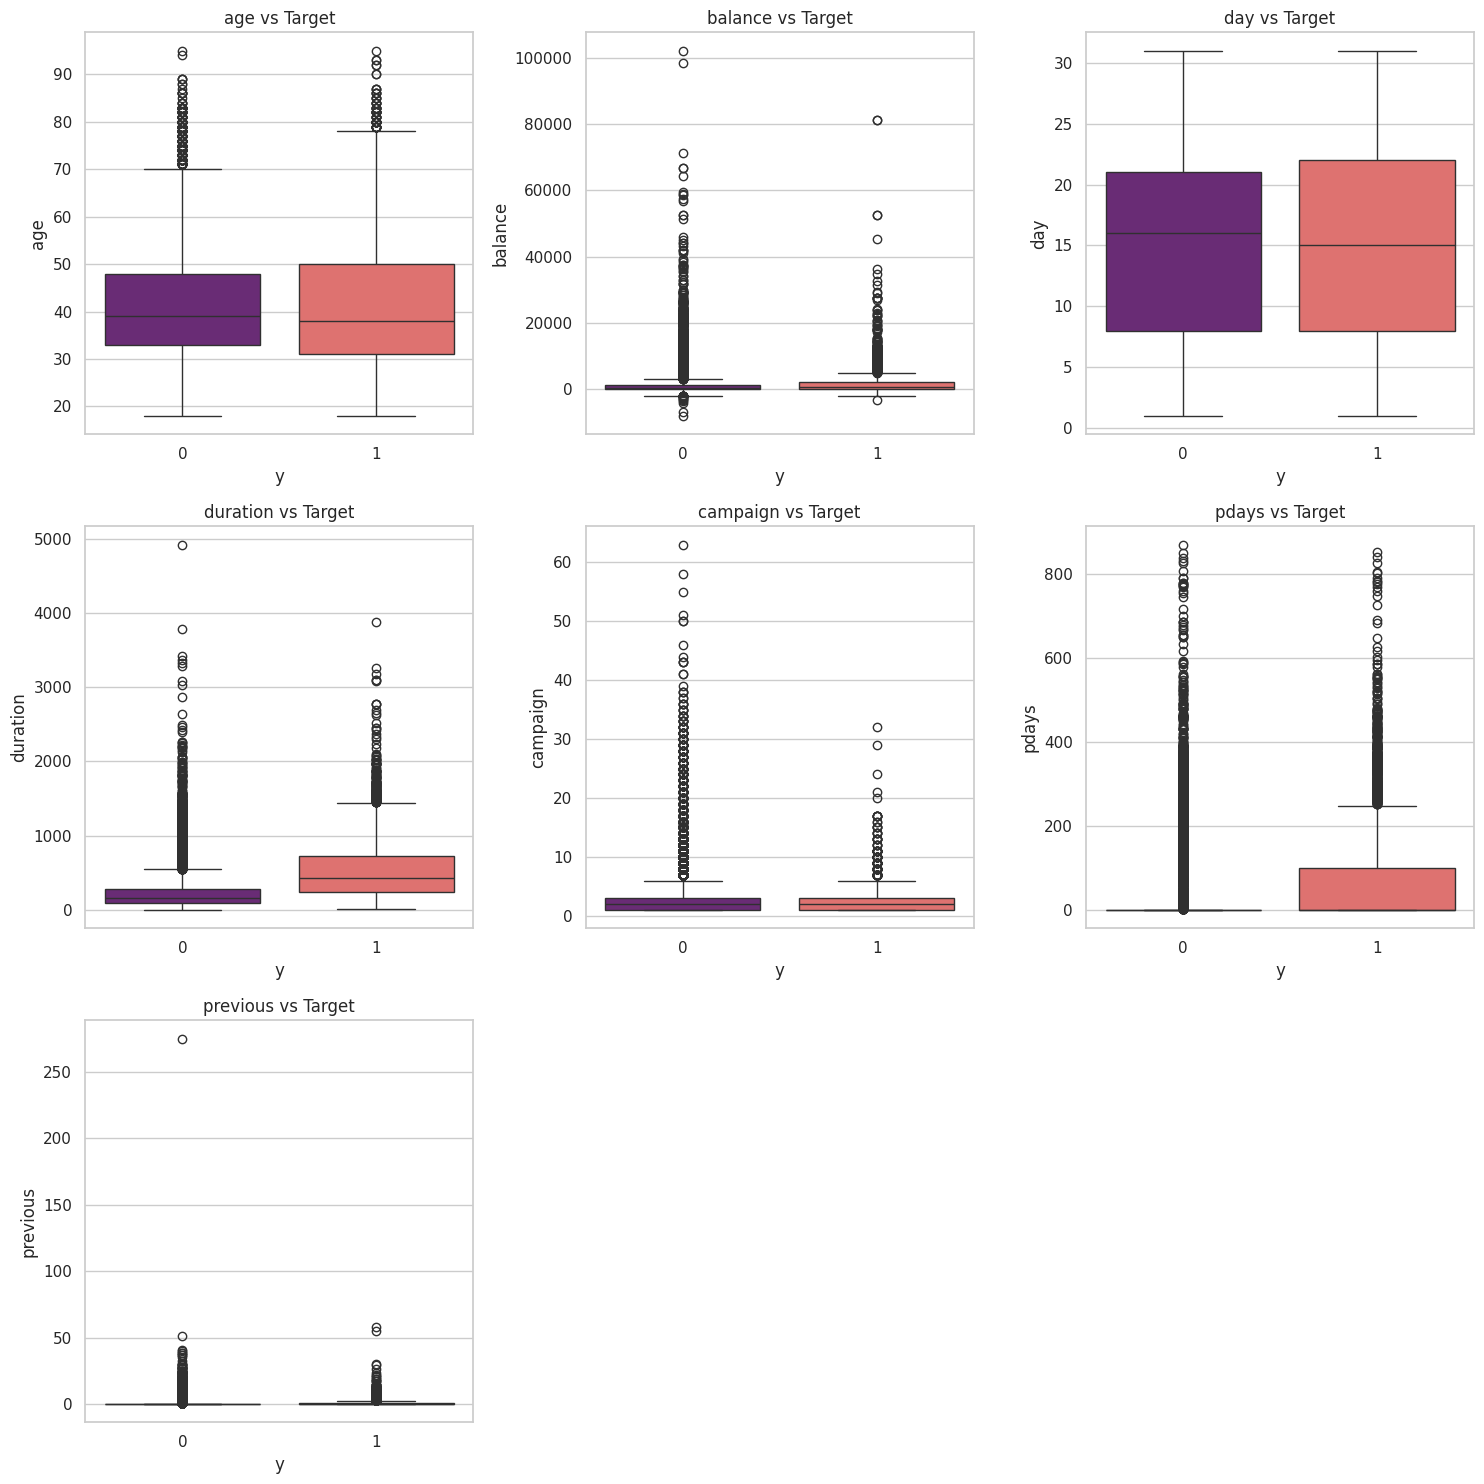

In [82]:
# Create subplots dynamically
rows = math.ceil(len(numeric_cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Advanced color palette (using 'viridis' as an example)
palette = "magma"  # or "magma", "plasma", "inferno", etc.

# Plot relationships for numerical features with the enhanced color palette
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette=palette)  # Applying the palette
    axes[i].set_title(f"{feature} vs Target")
    axes[i].set_xlabel("y")
    axes[i].set_ylabel(feature)

# Turn off unused axes
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Numerical Features: Correlation with Target

Correlation of numerical features with target (y):
age         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
Name: y, dtype: float64



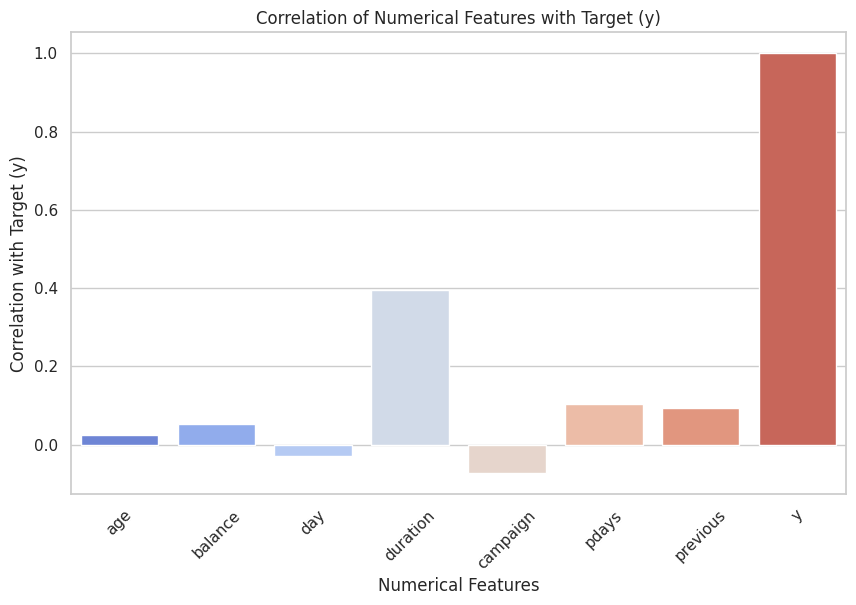

In [83]:
# Calculate the correlation matrix
correlation_matrix = bank_data[numeric_cols.tolist() + ['y']].corr()

# Check correlation with target 'y'
correlation_with_target = correlation_matrix['y']
print(f"Correlation of numerical features with target (y):\n{correlation_with_target}\n")

# Plot the correlation with target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title("Correlation of Numerical Features with Target (y)")
plt.xlabel("Numerical Features")
plt.ylabel("Correlation with Target (y)")
plt.xticks(rotation=45)
plt.show()

Categorical Features: Association with Target using Cramér's V

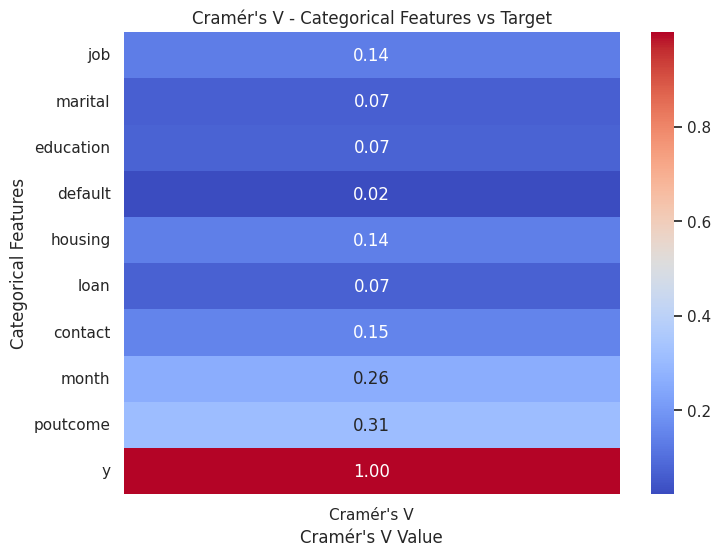

In [84]:
# Cramér's V calculation function
def calculate_cramers_v(feature, target):
    contingency = pd.crosstab(feature, target)
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / (min(k - 1, r - 1))) if chi2 > 0 else 0


if len(categorical_cols_with_target) > 0:
    # Calculate Cramér's V for each categorical feature
    cramers_v_results = {
        feature: calculate_cramers_v(bank_data[feature], bank_data['y'])
        for feature in categorical_cols_with_target
    }

    # Convert the results to a DataFrame for visualization
    cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramér\'s V'])
    cramers_v_df.index.name = "Categorical Features"

    # Plot the results as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cramers_v_df,
        annot=True,
        cmap='coolwarm',
        cbar=True,
        fmt=".2f"
    )
    plt.title("Cramér's V - Categorical Features vs Target")
    plt.xlabel("Cramér's V Value")
    plt.ylabel("Categorical Features")
    plt.show()
else:
    print("No categorical features found for Cramér's V calculation.")

# Feature Engineering

1. Handle Unknown Values

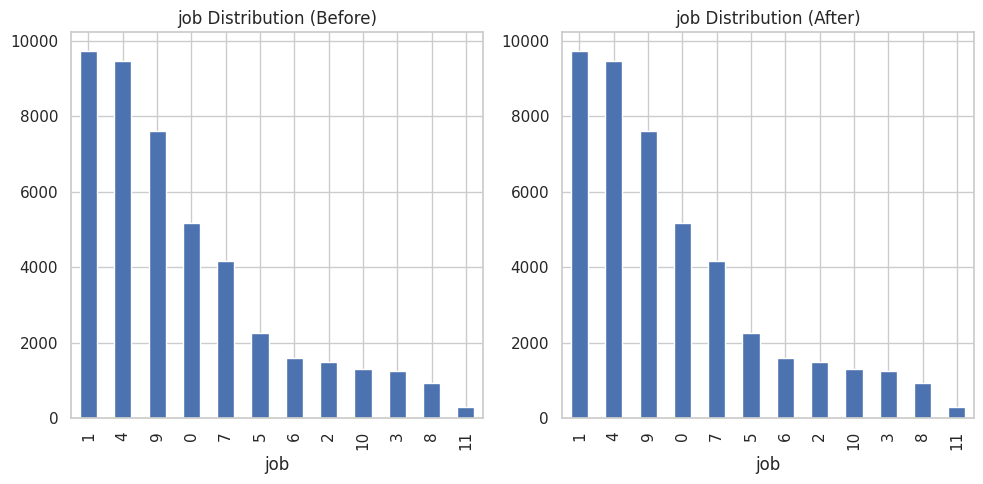

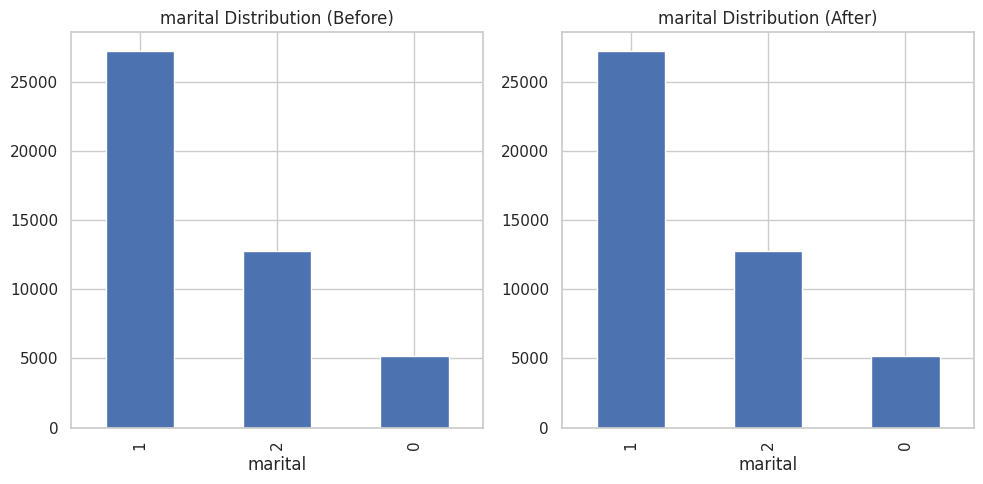

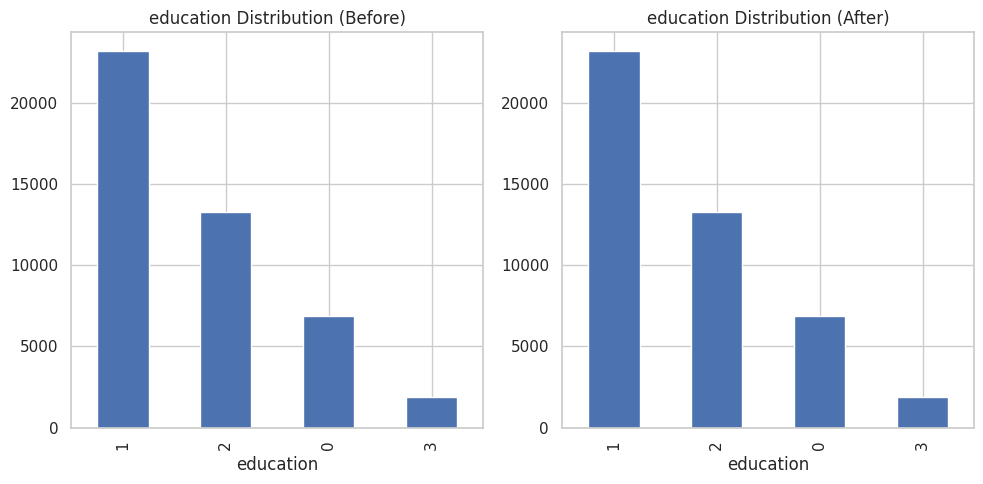

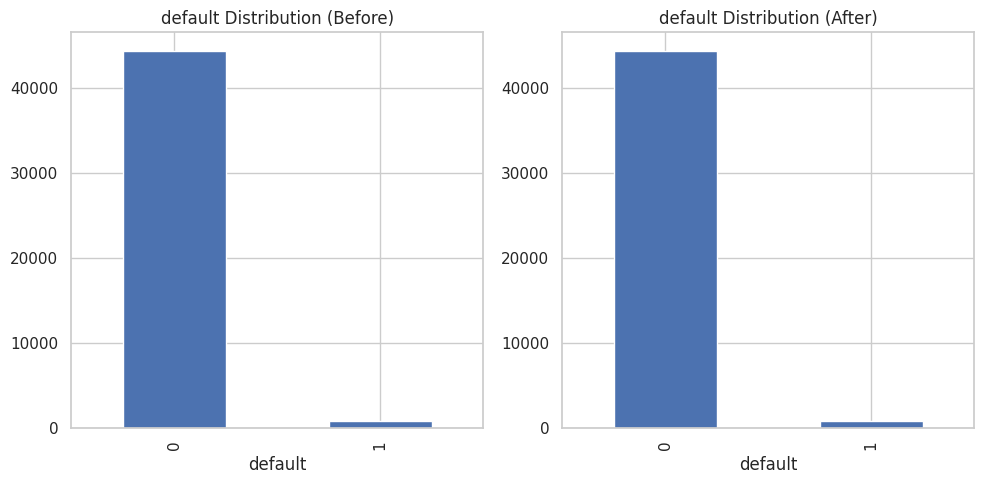

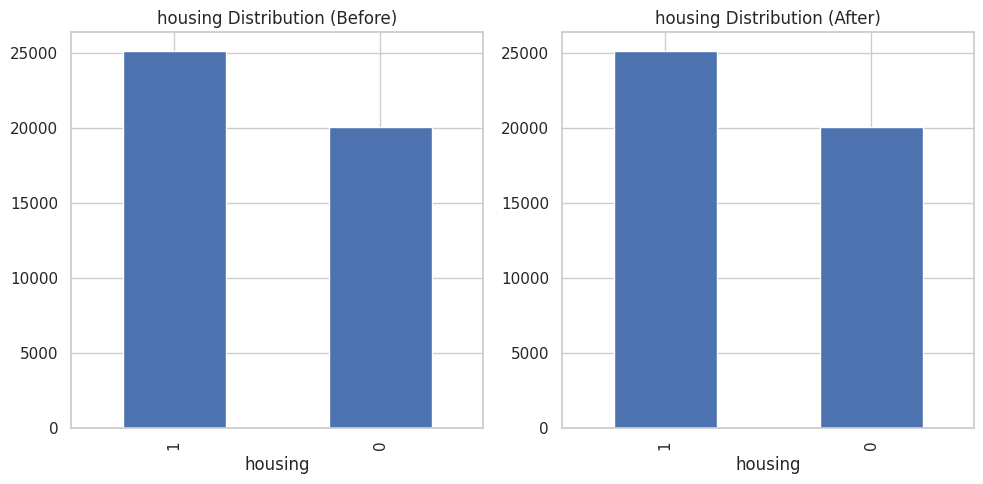

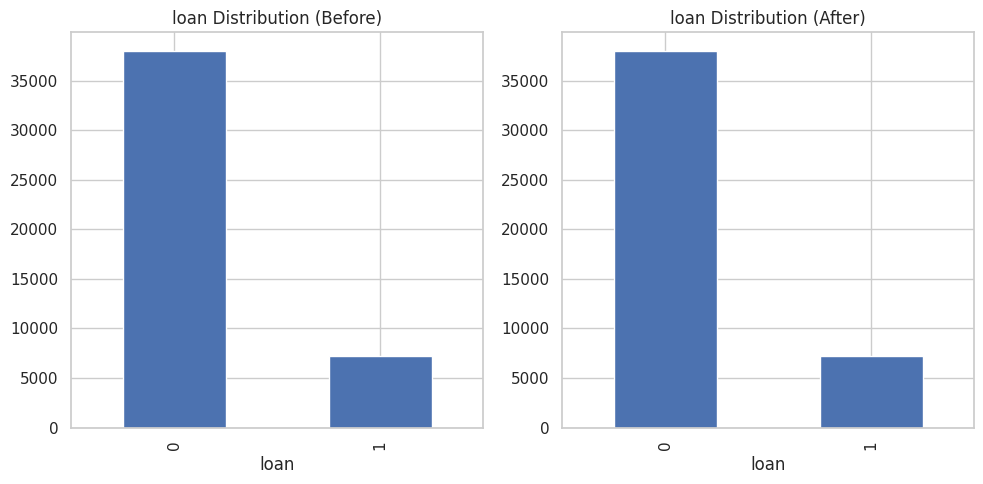

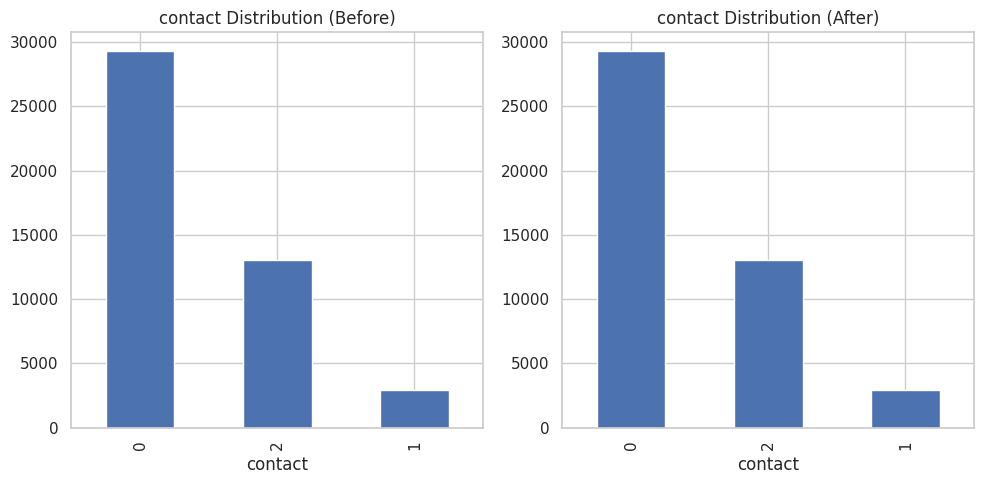

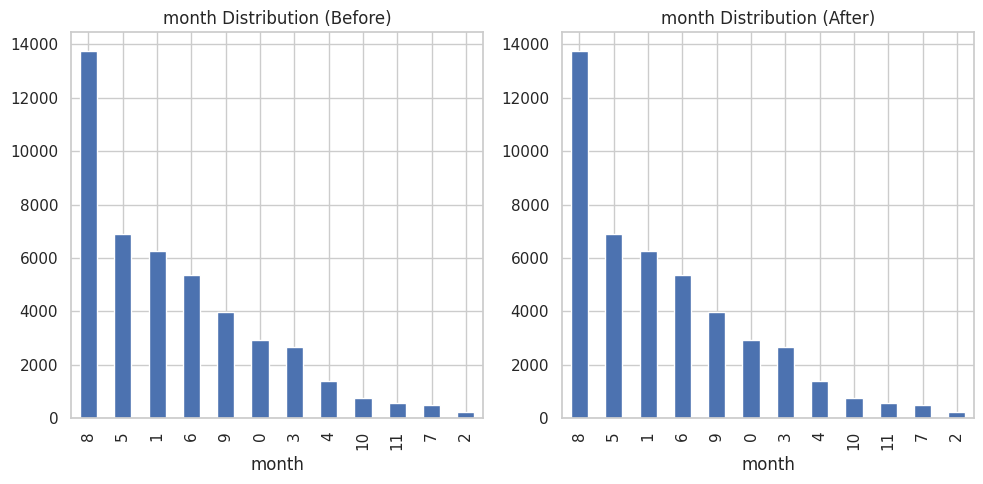

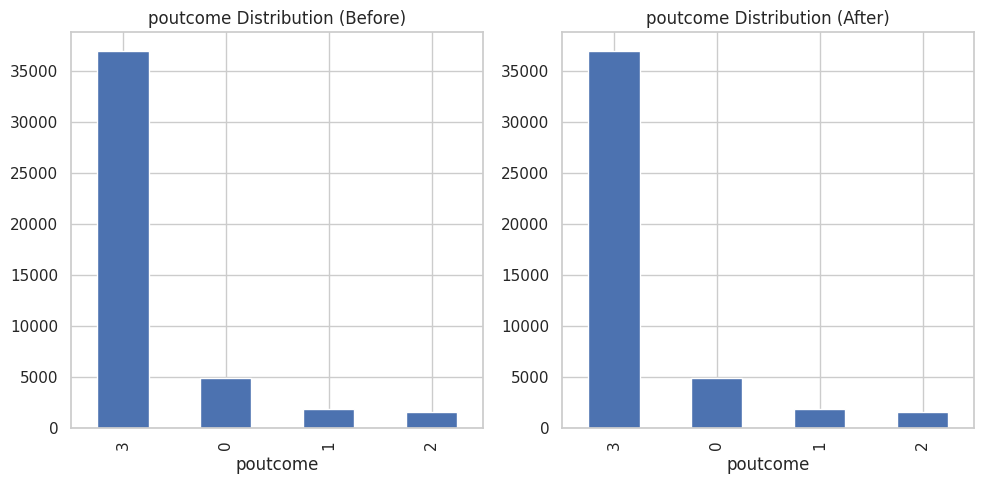

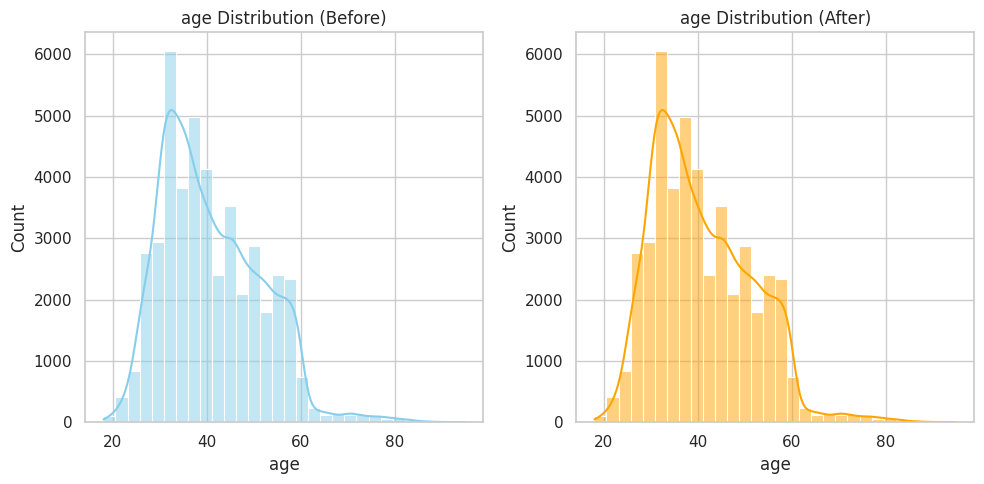

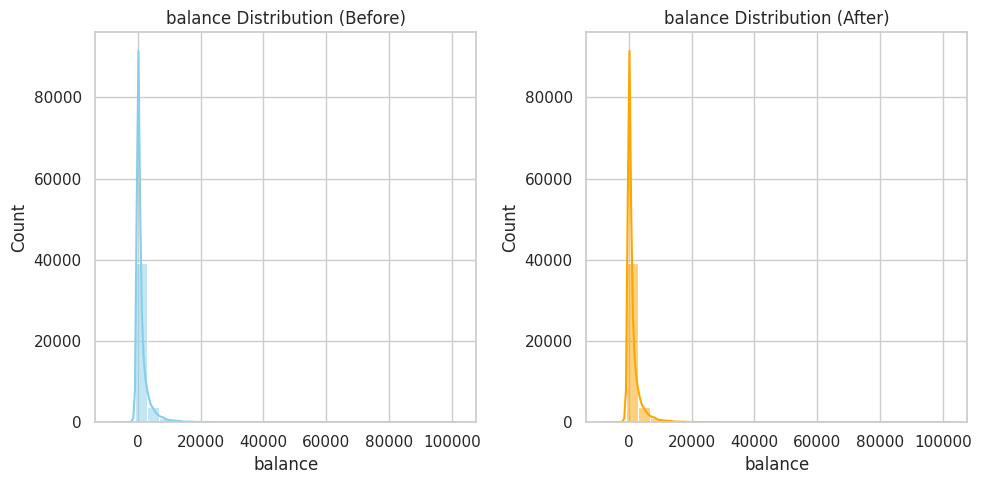

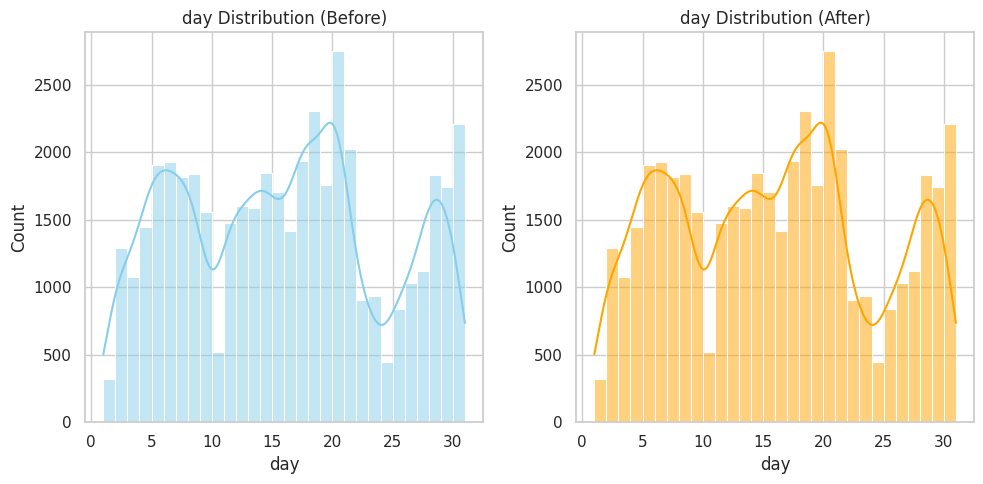

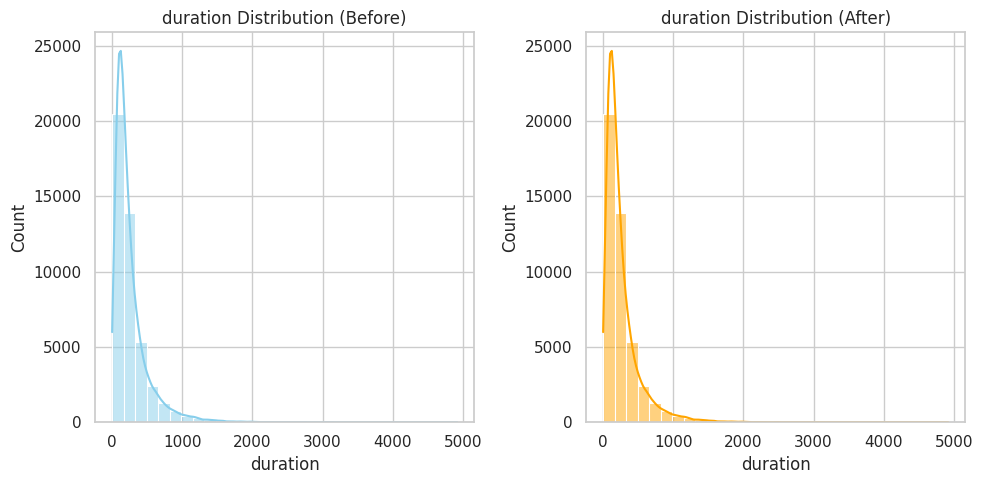

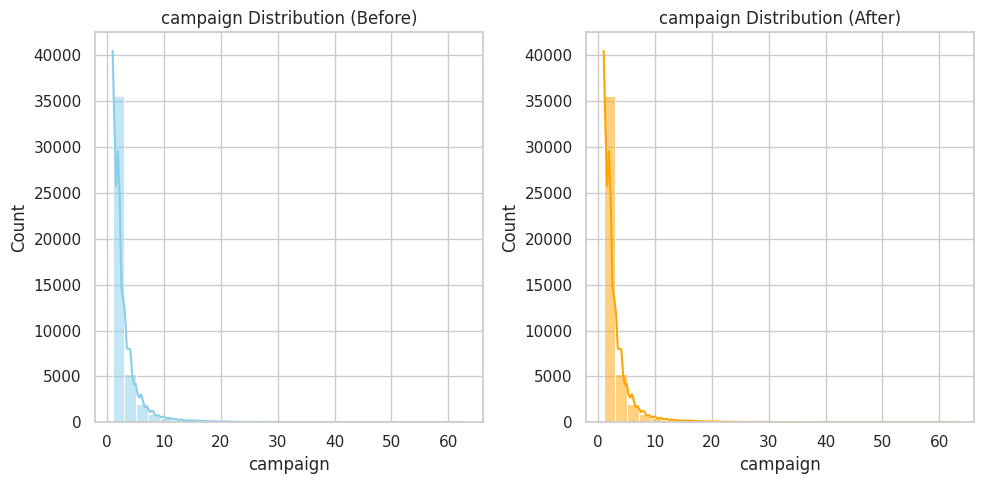

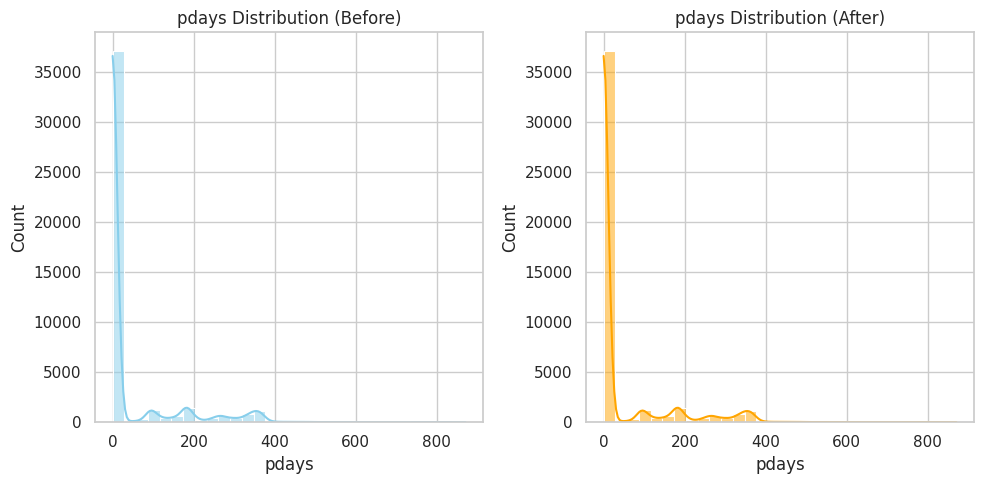

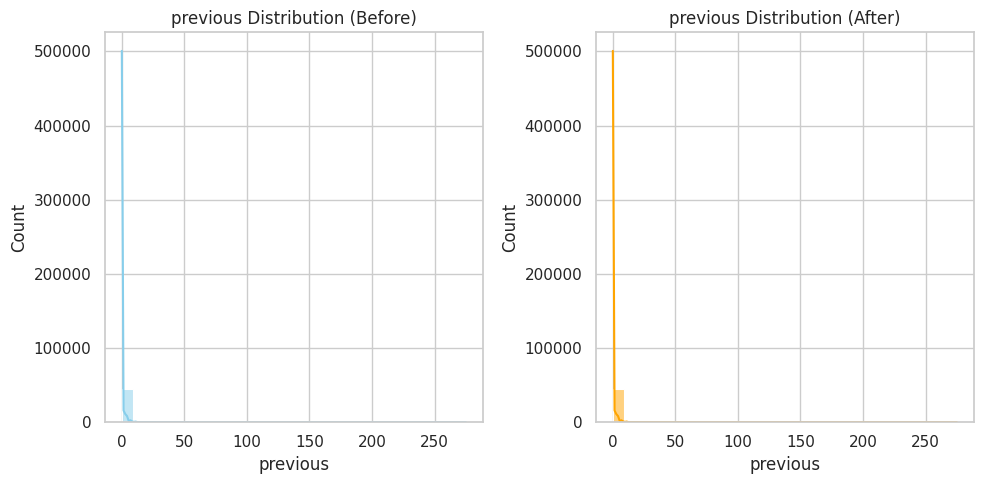

In [85]:
def handle_unknown_values(data, categorical_cols, numerical_cols):
    """
    Handles unknown values in the dataset.

    Args:
        data (pd.DataFrame): The input DataFrame.
        categorical_cols (list): List of categorical column names.
        numerical_cols (list): List of numerical column names.

    Returns:
        pd.DataFrame: The DataFrame with unknown values handled.
    """

    # Handling Unknown Values in Categorical Features
    for column in categorical_cols:
        # Calculate the mode (most frequent value)
        mode_value = data[column].mode()[0]

        # Replace unknown values (e.g., 'unknown', '?', etc.) with the mode
        data[column] = data[column].replace(['unknown', '?'], mode_value)

        # Visualization: Before and After Unknown Value Handling (Categorical)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        data[column].value_counts().plot(kind='bar', title=f'{column} Distribution (Before)')
        plt.subplot(1, 2, 2)
        data[column].value_counts().plot(kind='bar', title=f'{column} Distribution (After)')
        plt.tight_layout()
        plt.show()

    # Handling Unknown Values in Numerical Features
    for column in numerical_cols:
        # Calculate the median (or mean)
        median_value = data[column].median()  # Or use bank_data[column].mean()

        # Replace unknown values (e.g., -1) with the median
        data[column] = data[column].replace([-1, 999], median_value)  # Replace -1, 999 with your specific unknown value representations

        # Visualization: Before and After Unknown Value Handling (Numerical)
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Create subplots with fig and ax

        # Plot on the first subplot (ax[0])
        sns.histplot(data[column], bins=30, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'{column} Distribution (Before)') # Set title for the subplot

        # Plot on the second subplot (ax[1])
        sns.histplot(data[column], bins=30, kde=True, color='orange', ax=ax[1])
        ax[1].set_title(f'{column} Distribution (After)') # Set title for the subplot

        plt.tight_layout()
        plt.show()

    return data

# Assuming 'bank_data', 'categorical_cols', and 'numeric_cols' are defined
bank_data_cleaned = handle_unknown_values(bank_data.copy(), categorical_cols, numeric_cols) # Use numeric_cols in the function call

2. Handle Outliers

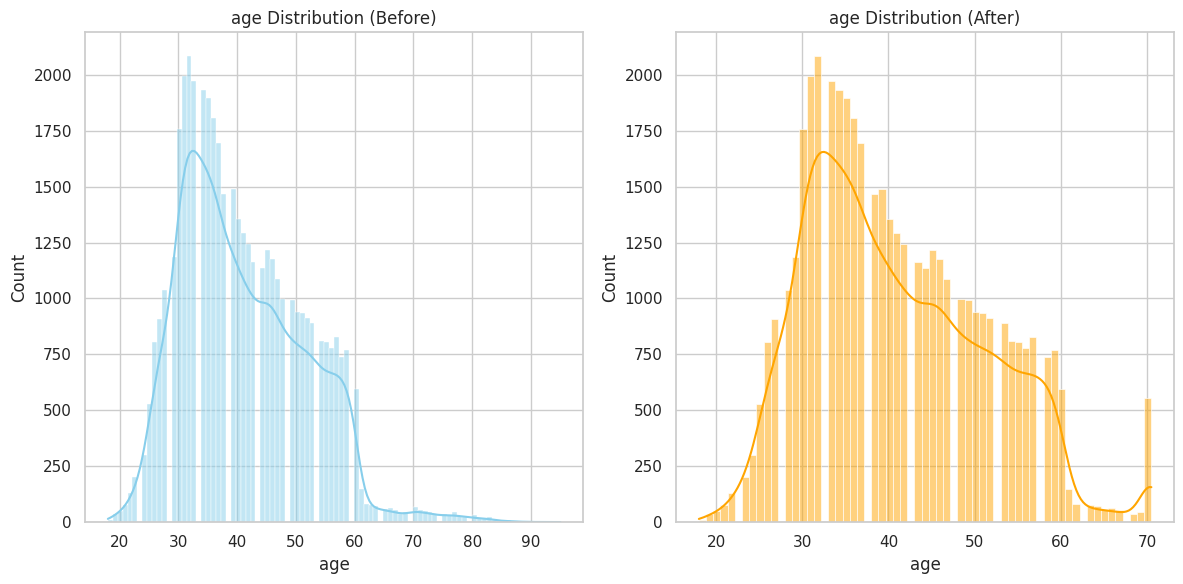

Column: age
Number of outliers detected: 487
Lower Bound: 10.50
Upper Bound: 70.50



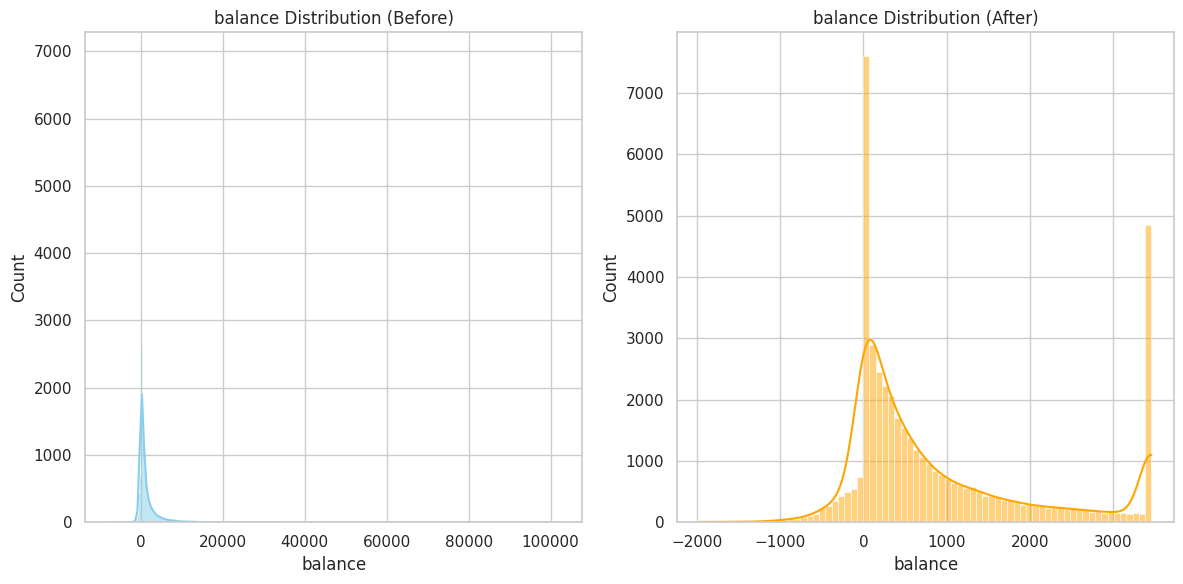

Column: balance
Number of outliers detected: 4729
Lower Bound: -1962.00
Upper Bound: 3462.00



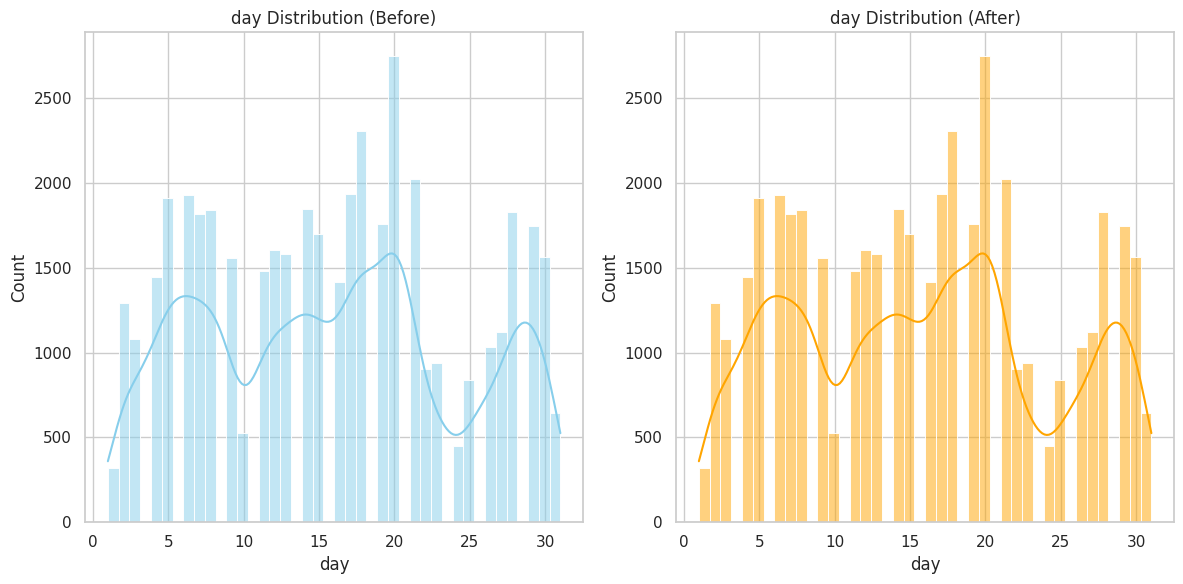

Column: day
Number of outliers detected: 0
Lower Bound: -11.50
Upper Bound: 40.50



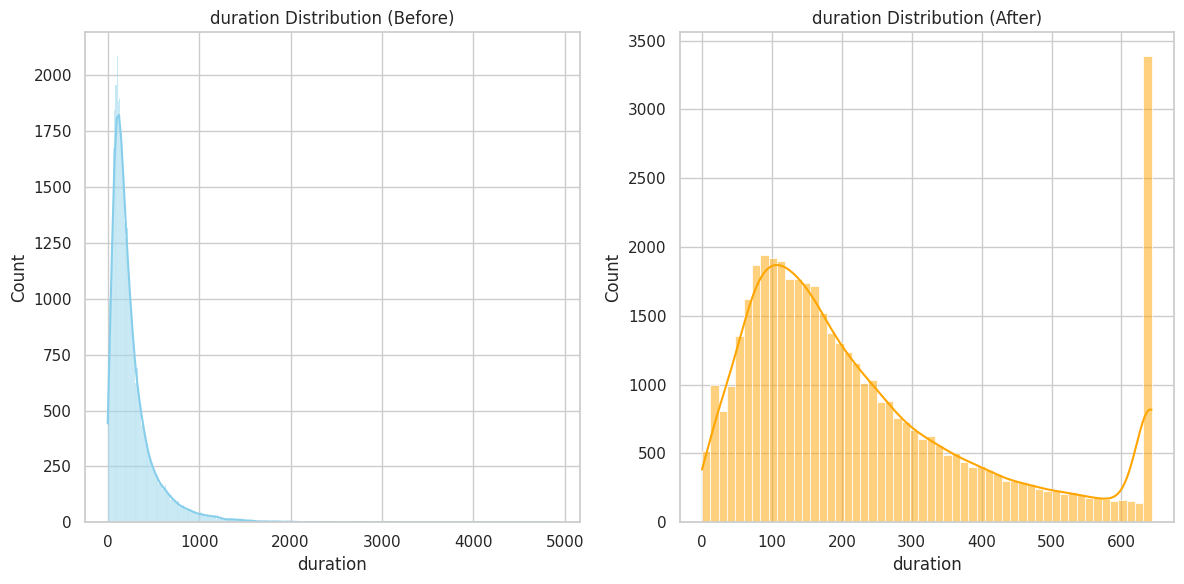

Column: duration
Number of outliers detected: 3235
Lower Bound: -221.00
Upper Bound: 643.00



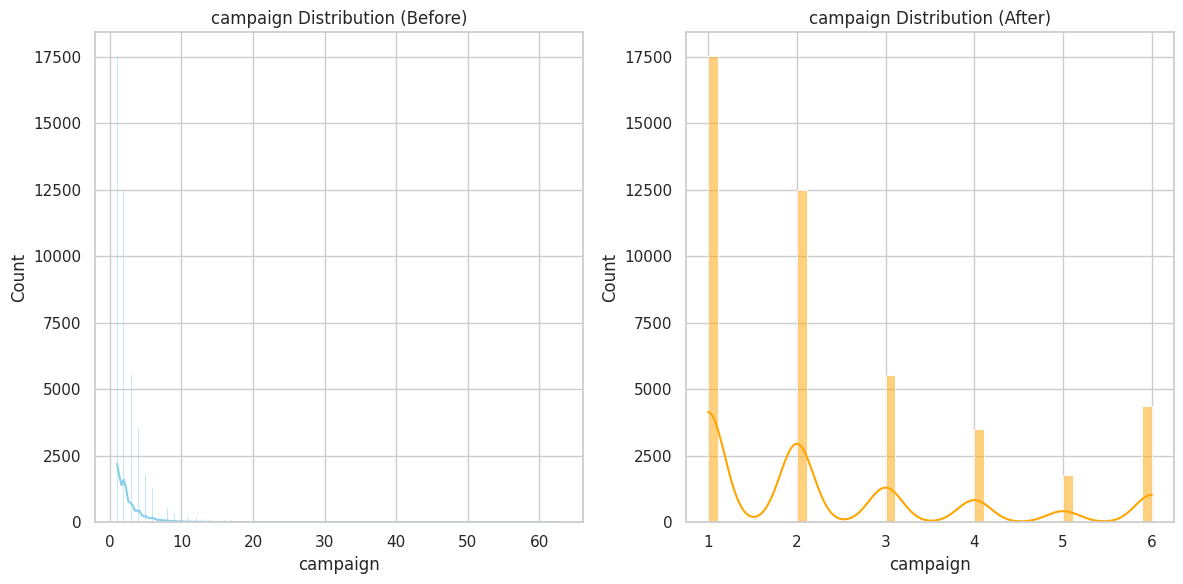

Column: campaign
Number of outliers detected: 3064
Lower Bound: -2.00
Upper Bound: 6.00



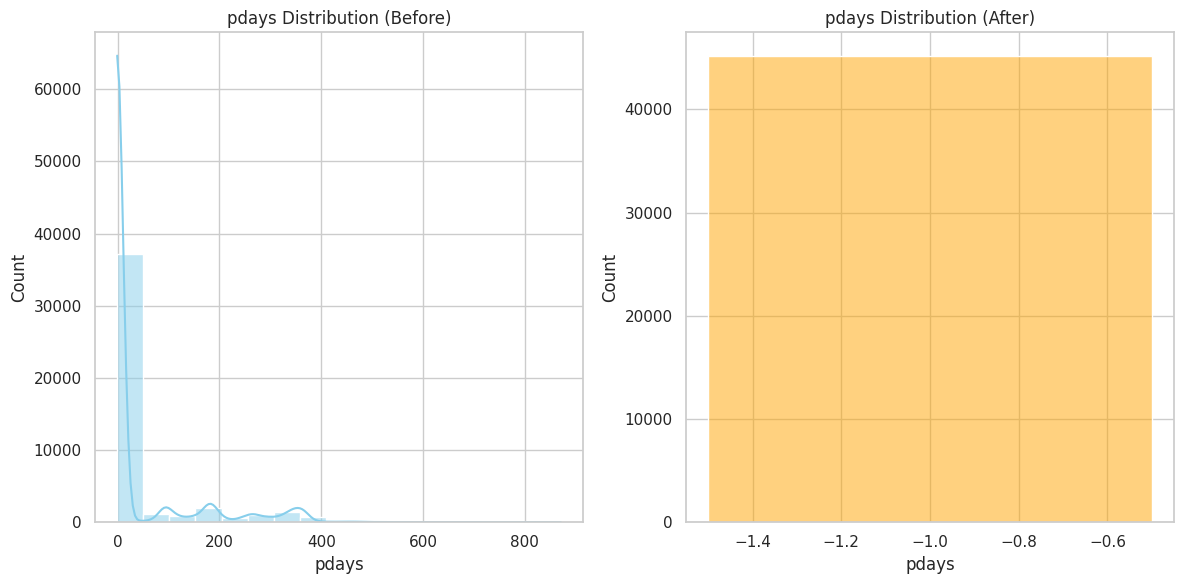

Column: pdays
Number of outliers detected: 8257
Lower Bound: -1.00
Upper Bound: -1.00



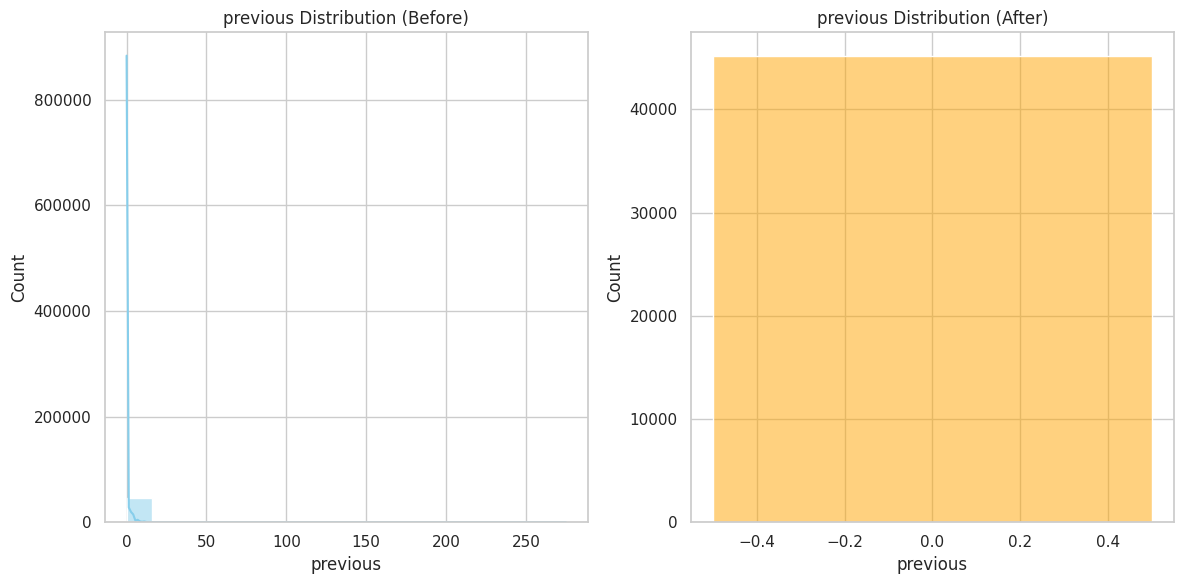

Column: previous
Number of outliers detected: 8257
Lower Bound: 0.00
Upper Bound: 0.00



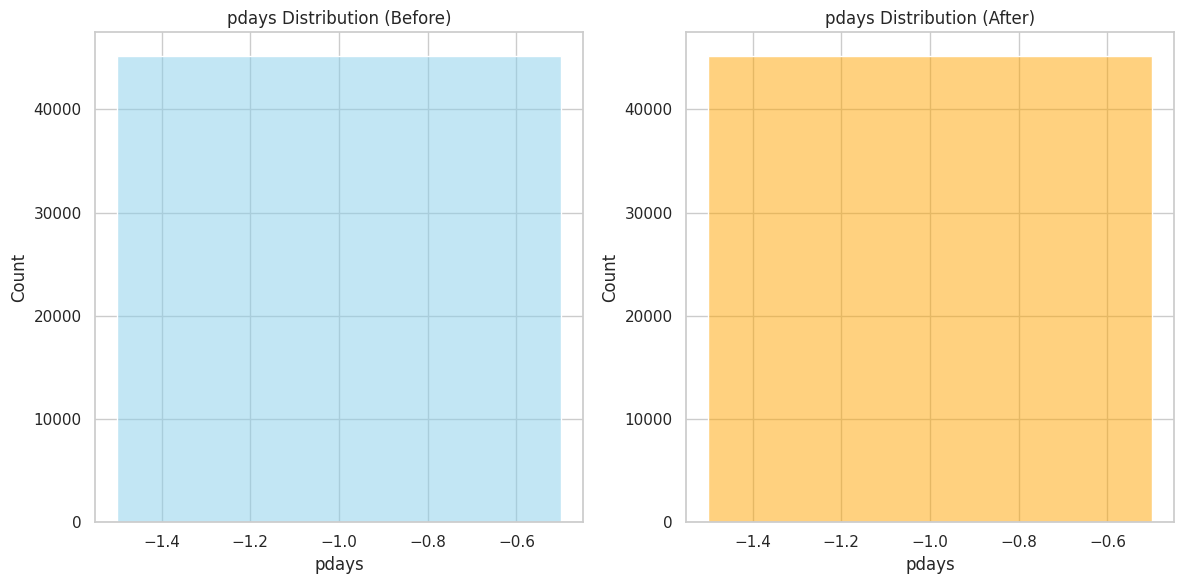

Column: pdays
Number of outliers detected: 0
Lower Bound: -1.00
Upper Bound: -1.00



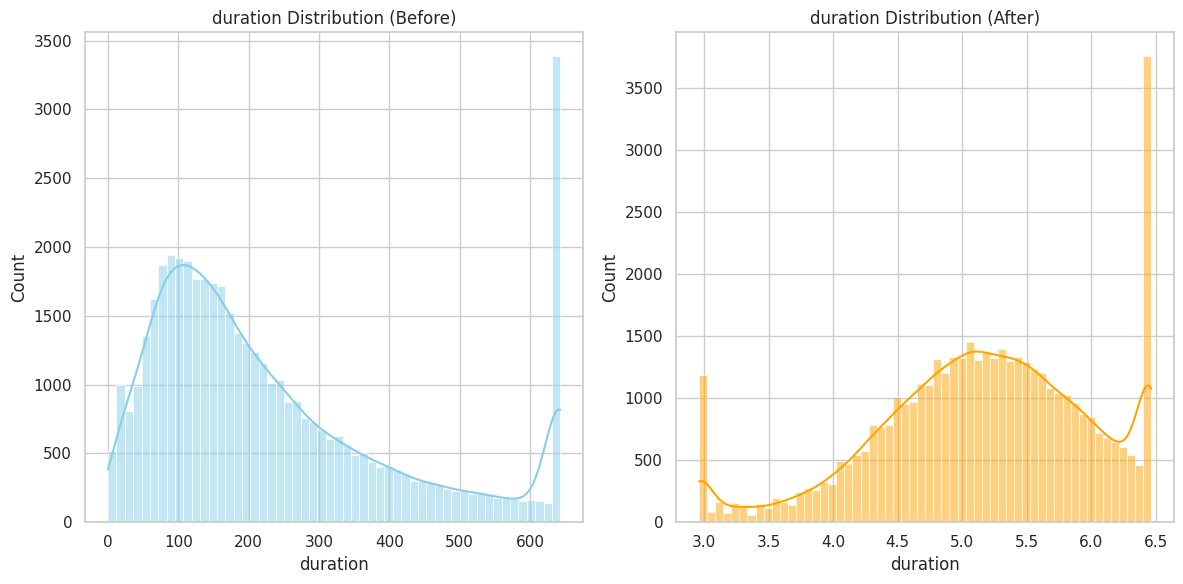

Column: duration
Number of outliers detected: 45211
Lower Bound: 2.96
Upper Bound: 7.45



In [86]:
def handle_outliers(data, numerical_cols, iqr_multiplier=1.5, transform=None, winsorize_percentile=None):
    """
    Handles outliers in numerical features using various methods and provides visualizations.

    Args:
        data (pd.DataFrame): The input DataFrame.
        numerical_cols (list): List of numerical column names.
        iqr_multiplier (float, optional): Multiplier for IQR method (default: 1.5).
        transform (str, optional): Transformation to apply (e.g., 'log', 'boxcox').
        winsorize_percentile (tuple, optional): Percentiles for winsorization (e.g., (1, 99)).

    Returns:
        pd.DataFrame: The DataFrame with outliers handled.
    """

    for column in numerical_cols:
        original_data = data[column].copy()  # Store original data for comparison

        # Apply transformation if specified
        if transform == 'log':
            data[column] = np.log1p(data[column])  # Use log1p to handle zero values
        elif transform == 'boxcox':
            # Handle negative values if present (Box-Cox requires positive data)
            if data[column].min() <= 0:
                data[column] = data[column] - data[column].min() + 1
            data[column] = stats.boxcox(data[column])[0]

        # Outlier handling method selection
        if winsorize_percentile:
            lower_bound = data[column].quantile(winsorize_percentile[0] / 100)
            upper_bound = data[column].quantile(winsorize_percentile[1] / 100)
            data[column] = np.clip(data[column], lower_bound, upper_bound)
        else:
            # IQR method
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            data[column] = np.clip(data[column], lower_bound, upper_bound)

        # Visualization: Before and After Outlier Handling
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(original_data, kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'{column} Distribution (Before)')
        sns.histplot(data[column], kde=True, ax=axes[1], color='orange')
        axes[1].set_title(f'{column} Distribution (After)')
        plt.tight_layout()
        plt.show()

        # Summary of outlier handling
        outliers = data[(data[column] != original_data)]  # Detect changed values
        print(f"Column: {column}")
        print(f"Number of outliers detected: {len(outliers)}")
        print(f"Lower Bound: {lower_bound:.2f}")
        print(f"Upper Bound: {upper_bound:.2f}\n")
    return data


# For IQR method with default multiplier:
bank_data_cleaned = handle_outliers(bank_data.copy(), numeric_cols)

# For winsorization with 1st and 99th percentiles for 'pdays':
bank_data_cleaned = handle_outliers(bank_data_cleaned.copy(), ['pdays'], winsorize_percentile=(1, 99))

# For log transformation and IQR on 'duration':
bank_data_cleaned = handle_outliers(bank_data_cleaned.copy(), ['duration'], transform='log')

3. Feature Selection

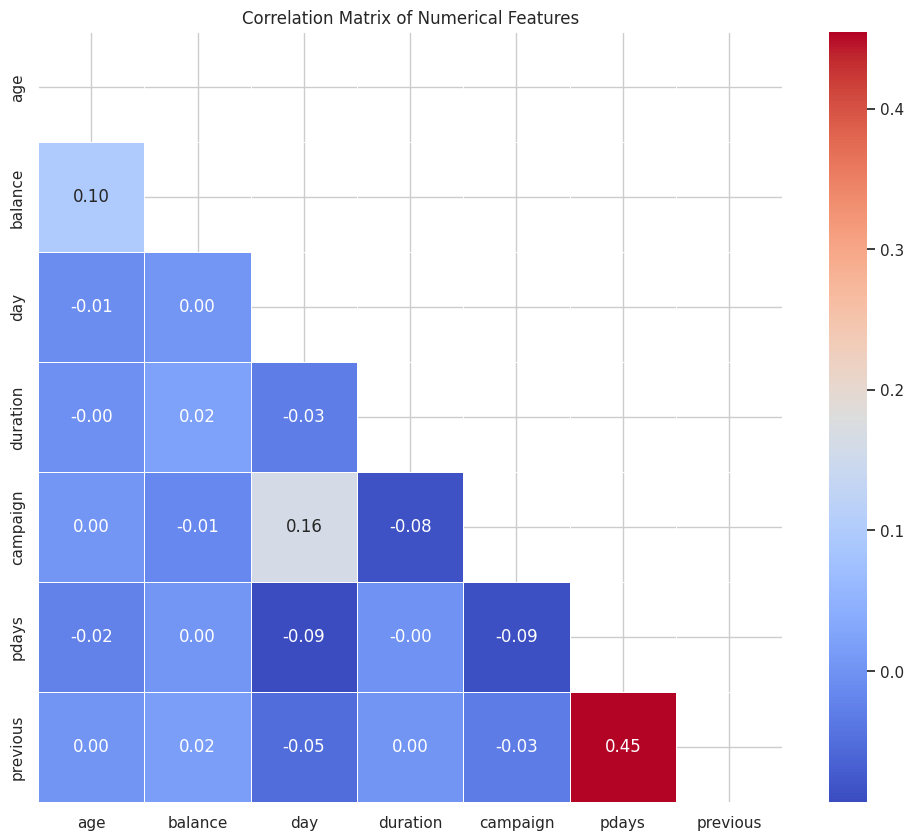

Selected Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Dropped Numerical Features (Reasons): {}


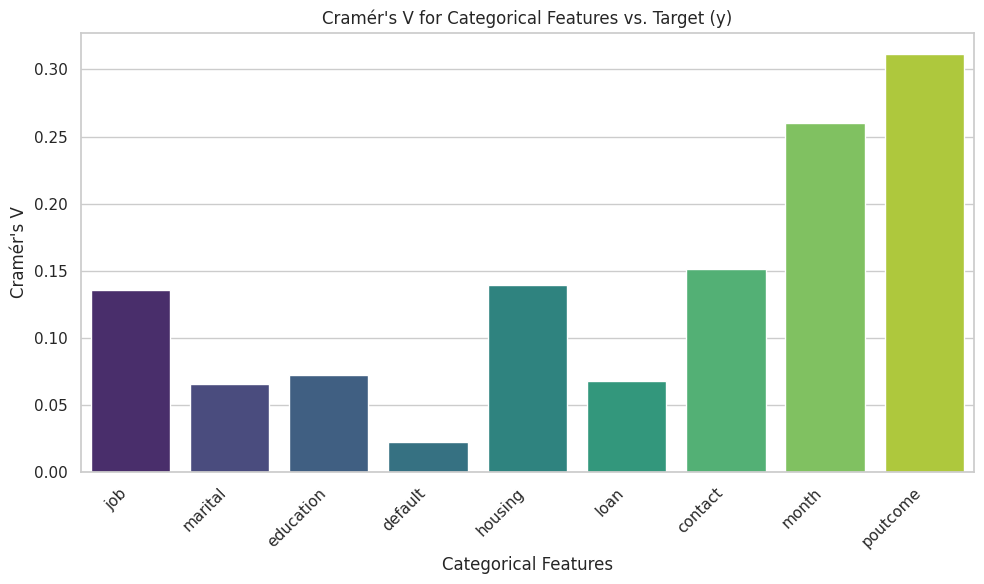

Selected Categorical Features: ['job', 'housing', 'contact', 'month', 'poutcome']
Dropped Categorical Features (Reasons): {'marital': "Low Cramér's V with target (<0.1)", 'education': "Low Cramér's V with target (<0.1)", 'default': "Low Cramér's V with target (<0.1)", 'loan': "Low Cramér's V with target (<0.1)"}
All Selected Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job', 'housing', 'contact', 'month', 'poutcome']


In [87]:

# --- Feature Selection ---

# 1. Correlation-based Feature Selection for Numerical Features
correlation_matrix = bank_data[numeric_cols].corr()
threshold = 0.7  # Adjust as needed

# Visualize Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=np.triu(correlation_matrix))
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Identify Highly Correlated Features with Reasons
highly_correlated_features = set()
dropped_features_reasons = {}  # Store reasons for dropping features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)
            dropped_features_reasons[colname] = f"High correlation with {correlation_matrix.columns[j]} (>{threshold})"

# Remove Highly Correlated Features
selected_numerical_features = numeric_cols.difference(highly_correlated_features)
print(f"Selected Numerical Features: {selected_numerical_features.tolist()}")
print(f"Dropped Numerical Features (Reasons): {dropped_features_reasons}")

# 2. Cramér's V for Categorical Features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if chi2_stat > 0 else 0

cramers_v_results = {}
for col in categorical_cols:
    cramers_v_results[col] = cramers_v(bank_data[col], bank_data['y'])

cramers_v_df = pd.DataFrame(cramers_v_results, index=['Cramers_V']).T

# Visualize Cramér's V
plt.figure(figsize=(10, 6))
sns.barplot(x=cramers_v_df.index, y=cramers_v_df['Cramers_V'], palette="viridis")
plt.title("Cramér's V for Categorical Features vs. Target (y)")
plt.xlabel("Categorical Features")
plt.ylabel("Cramér's V")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Select Categorical Features based on Cramér's V with Reasons
cramers_v_threshold = 0.1  # Adjust as needed
selected_categorical_features = []
dropped_categorical_features_reasons = {}
for feature, value in cramers_v_results.items():
    if value > cramers_v_threshold:
        selected_categorical_features.append(feature)
    else:
        dropped_categorical_features_reasons[feature] = f"Low Cramér's V with target (<{cramers_v_threshold})"

print(f"Selected Categorical Features: {selected_categorical_features}")
print(f"Dropped Categorical Features (Reasons): {dropped_categorical_features_reasons}")

# Combine Selected Features
selected_features = selected_numerical_features.tolist() + selected_categorical_features
print(f"All Selected Features: {selected_features}")

4. Categorical Encoding

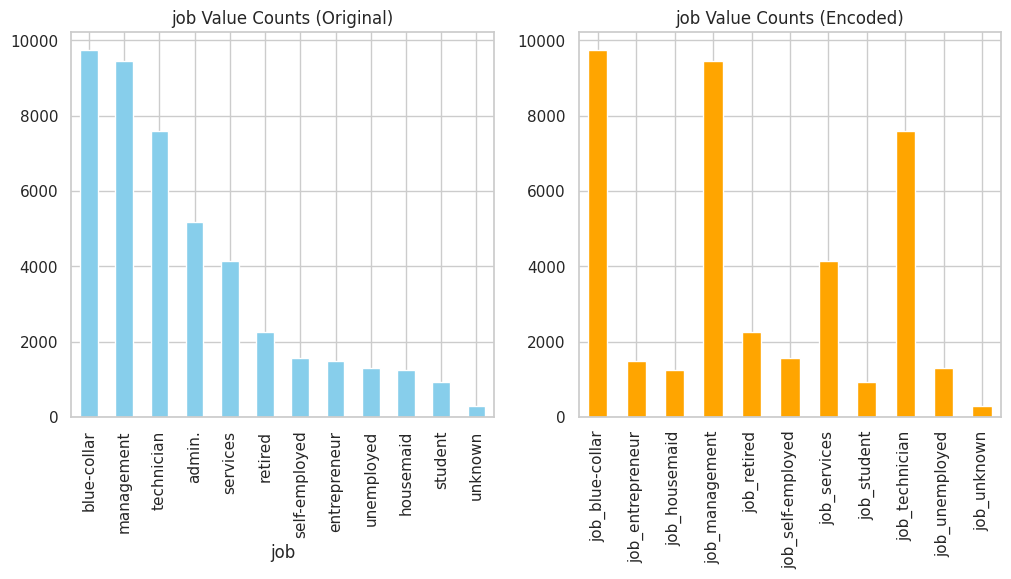

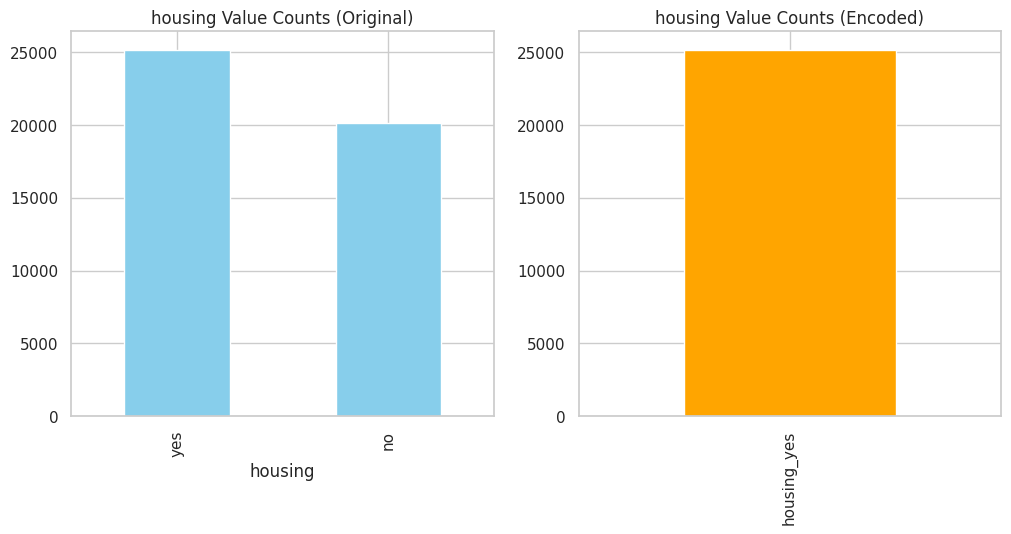

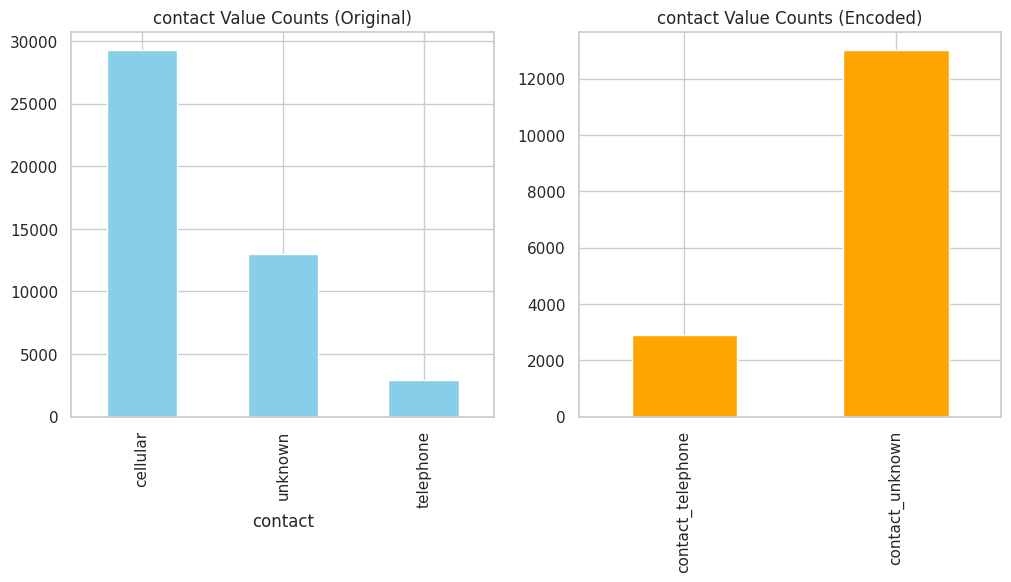

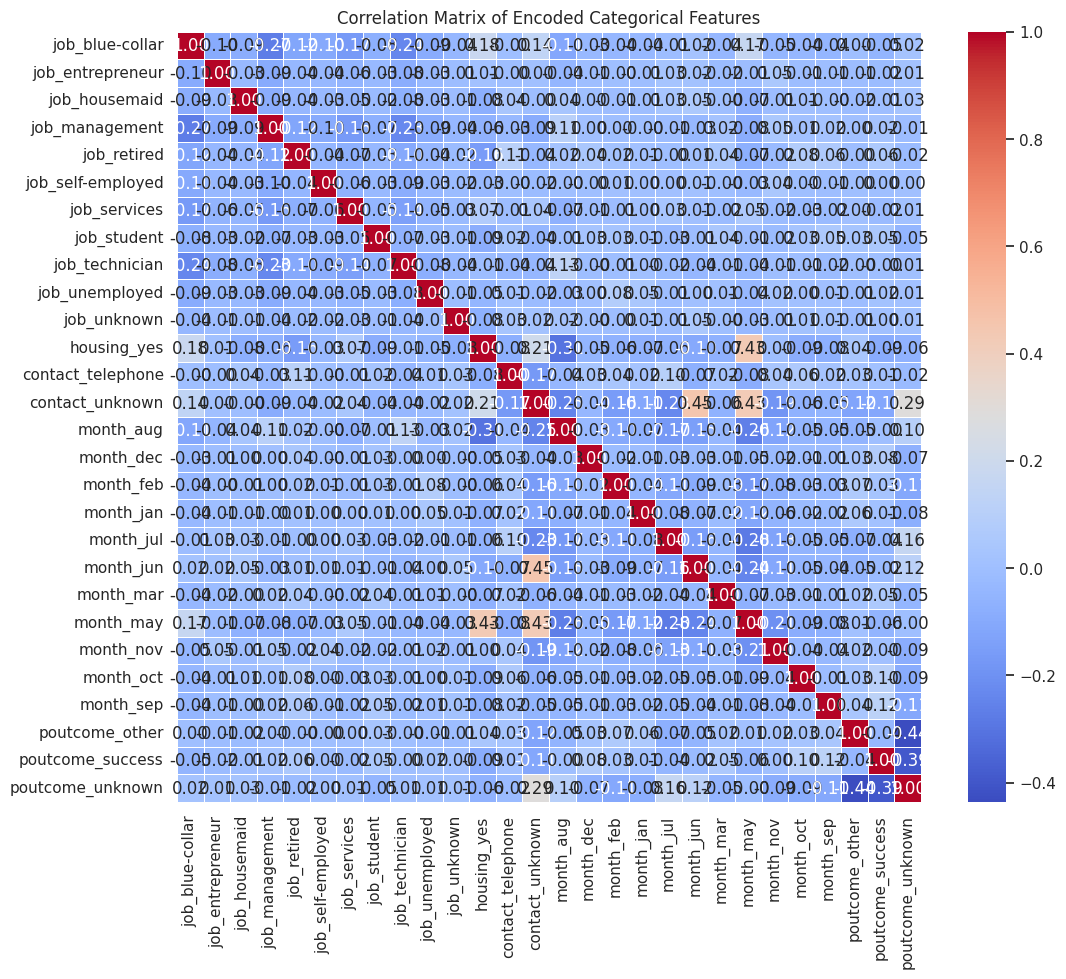

In [89]:
# --- Categorical Encoding ---
# Create a new DataFrame with selected features from original data
encoded_bank_data = original_bank_data[selected_features].copy()

# Perform one-hot encoding on selected categorical features
encoded_bank_data = pd.get_dummies(encoded_bank_data, columns=selected_categorical_features, drop_first=True)

# Update selected features to include encoded features
# Get all columns that start with any of the selected_categorical_features
encoded_categorical_features = [col for col in encoded_bank_data.columns if any(col.startswith(cat_feature) for cat_feature in selected_categorical_features)]
all_selected_features = selected_numerical_features.tolist() + encoded_categorical_features


# --- Visualizations to Check Encoding ---

# 1. Value Counts of Original vs. Encoded Features (for a few features)
for feature in selected_categorical_features[:3]:  # Visualize for the first 3 selected categorical features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Original Feature
    original_bank_data[feature].value_counts().plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title(f'{feature} Value Counts (Original)')

    # Encoded Features
    encoded_features = [col for col in encoded_bank_data.columns if col.startswith(feature)] # Use encoded_bank_data
    encoded_bank_data[encoded_features].sum().plot(kind='bar', ax=ax2, color='orange') # Use encoded_bank_data
    ax2.set_title(f'{feature} Value Counts (Encoded)')

    plt.show()

# 2. Correlation Heatmap of Encoded Features (if there are multiple)
if len(encoded_categorical_features) > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(encoded_bank_data[encoded_categorical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # Use encoded_bank_data
    plt.title("Correlation Matrix of Encoded Categorical Features")
    plt.show()

5. Feature Scaling

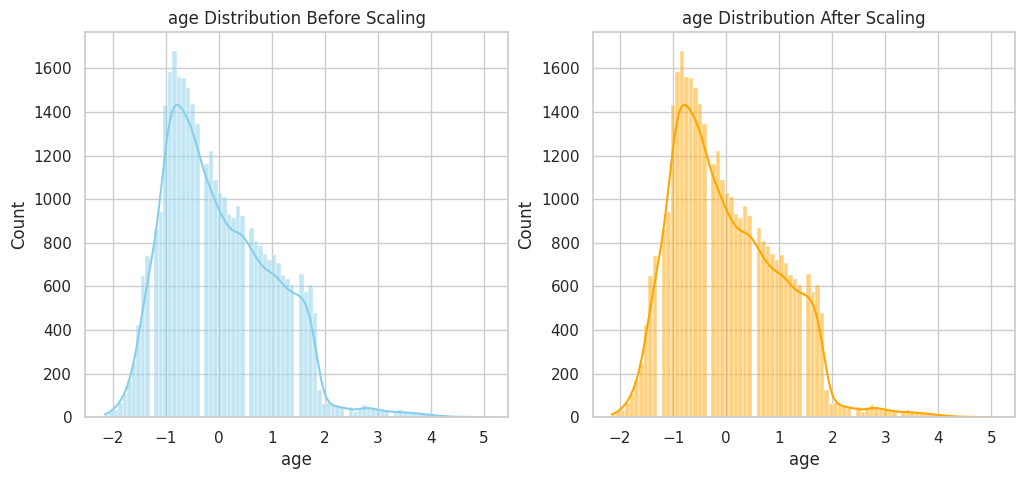

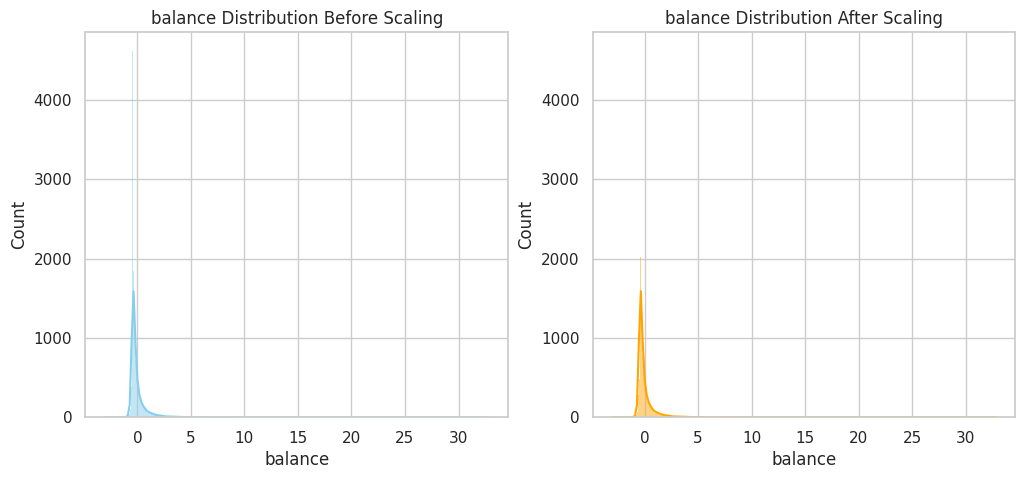

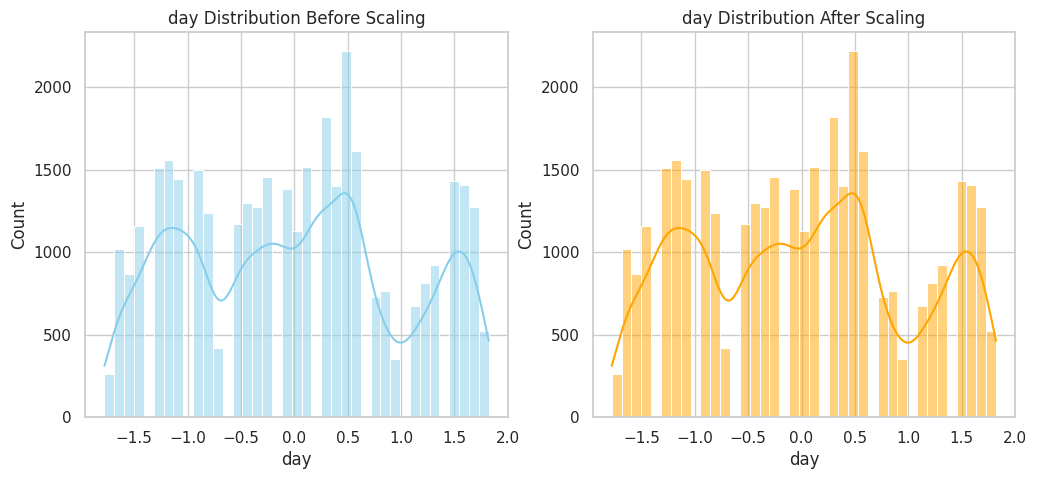

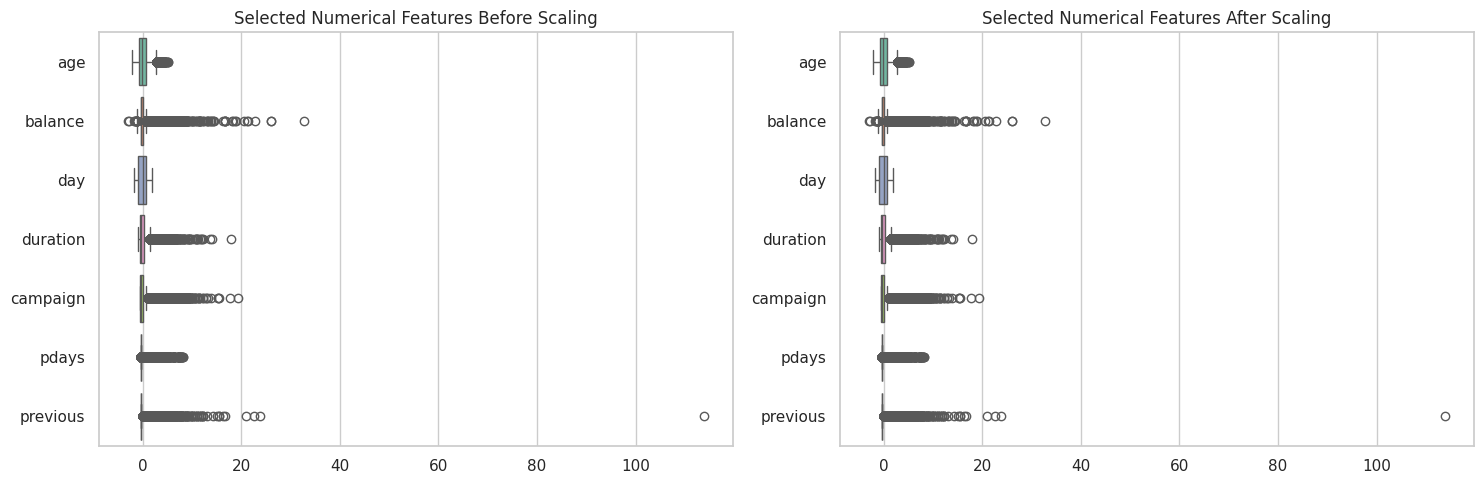

In [90]:
#Feature Selection has been performed, and 'selected_features' is defined
selected_numerical_features = [f for f in selected_features if f in numeric_cols]
selected_categorical_features = [f for f in selected_features if f in categorical_cols]

# One-Hot Encoding for categorical features
bank_data = pd.get_dummies(bank_data, columns=selected_categorical_features, drop_first=True)

all_selected_features = selected_numerical_features + list(bank_data.columns[bank_data.columns.str.startswith(tuple(selected_categorical_features))])

# Split data BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(
    bank_data[all_selected_features], bank_data['y'], test_size=0.2, random_state=42, stratify=bank_data['y']
)

# Scale numerical features only
scaler = StandardScaler()
scaler.fit(X_train[selected_numerical_features])
X_train[selected_numerical_features] = scaler.transform(X_train[selected_numerical_features])
X_test[selected_numerical_features] = scaler.transform(X_test[selected_numerical_features])

# --- Visualizations to Check Scaling ---

# 1. Distribution Before and After Scaling (for a few selected numerical features)
for feature in selected_numerical_features[:3]:  # Visualize for the first 3 selected numerical features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Before Scaling
    sns.histplot(X_train[feature], kde=True, ax=ax1, color='skyblue')
    ax1.set_title(f'{feature} Distribution Before Scaling')

    # After Scaling
    sns.histplot(X_train[feature], kde=True, ax=ax2, color='orange')
    ax2.set_title(f'{feature} Distribution After Scaling')

    plt.show()

# 2. Box Plots Before and After Scaling (for all selected features)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Before Scaling
sns.boxplot(data=X_train[selected_numerical_features], orient="h", palette="Set2", ax=ax1)  # Use selected_numerical_features
ax1.set_title('Selected Numerical Features Before Scaling')

# After Scaling
sns.boxplot(data=X_train[selected_numerical_features], orient="h", palette="Set2", ax=ax2)  # Use selected_numerical_features
ax2.set_title('Selected Numerical Features After Scaling')

plt.tight_layout()
plt.show()

6. Train Test Split

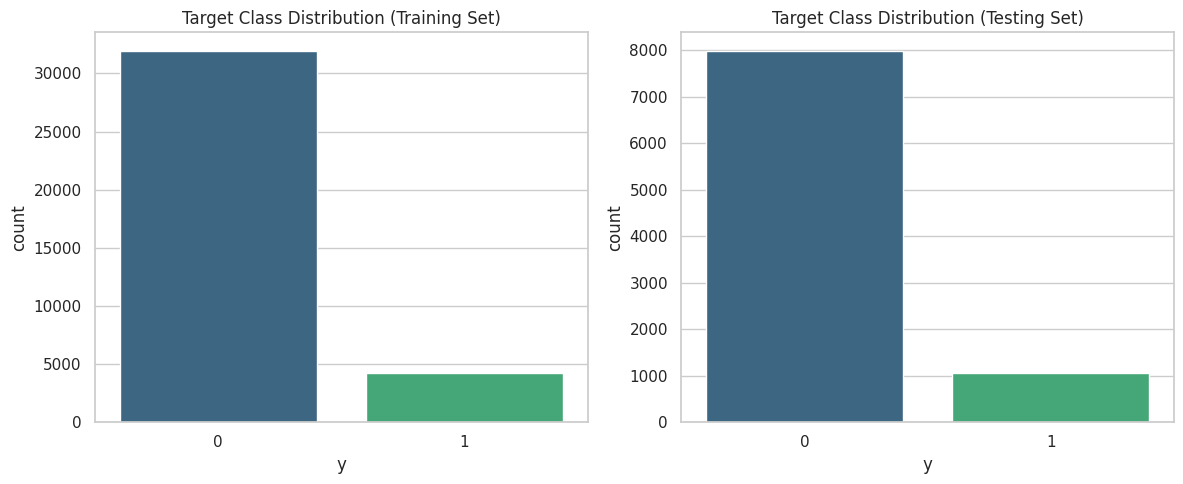

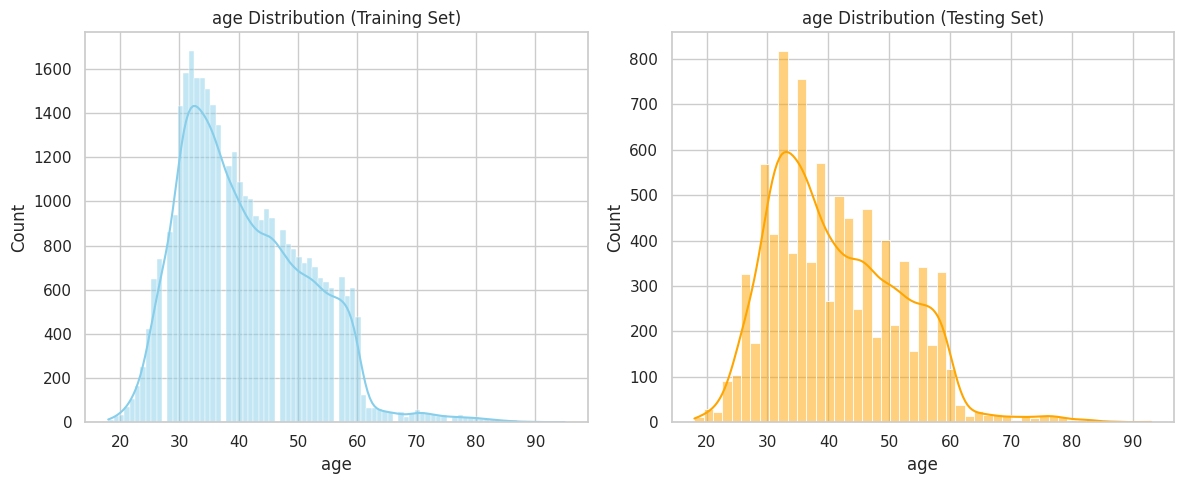

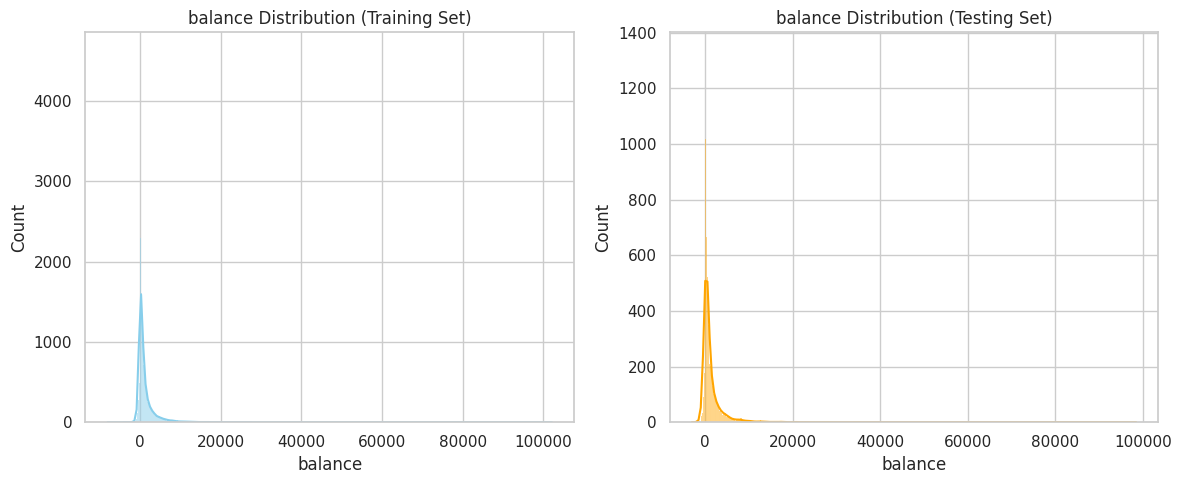

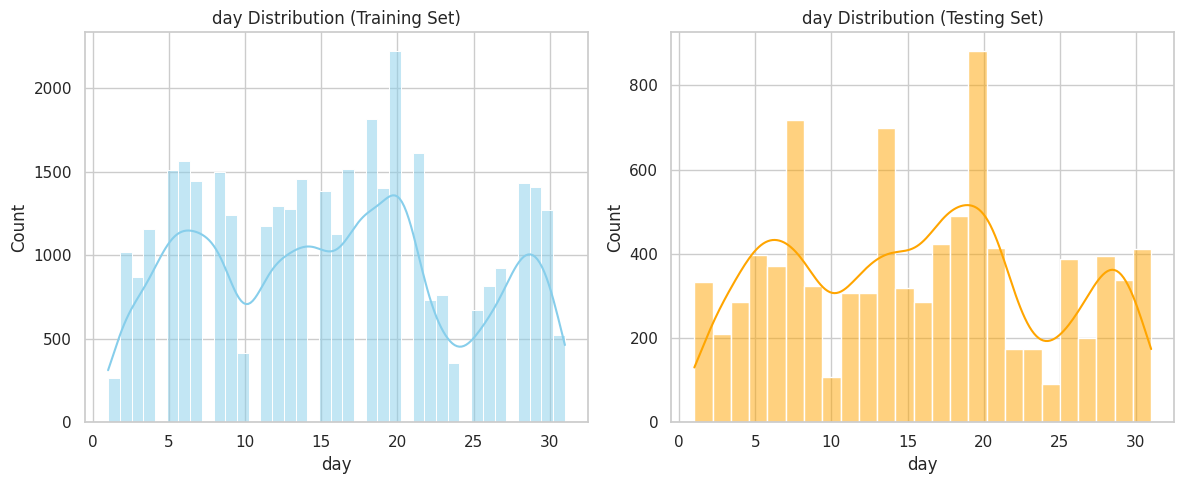

In [92]:
# ... (your previous code imports and data loading) ...

# --- Preprocessing and Feature Engineering ---
# ... (your existing code for handling unknown values, outliers, feature selection, etc.) ...

# --- Train-Test Split ---
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = bank_data[all_selected_features]  # Use selected features for X
y = bank_data['y']

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Visualizations to Verify Train-Test Split ---

# 1. Target Class Distribution in Training and Testing Sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Set
sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Target Class Distribution (Training Set)")

# Testing Set
sns.countplot(x=y_test, ax=axes[1], palette="viridis")
axes[1].set_title("Target Class Distribution (Testing Set)")

plt.tight_layout()
plt.show()

# 2. Feature Distributions in Training and Testing Sets (for a few features)
for feature in selected_features[:3]:  # Visualize for the first 3 selected features
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Training Set
    sns.histplot(X_train[feature], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{feature} Distribution (Training Set)")

    # Testing Set
    sns.histplot(X_test[feature], kde=True, ax=axes[1], color="orange")
    axes[1].set_title(f"{feature} Distribution (Testing Set)")

    plt.tight_layout()
    plt.show()

# Explanation of parameters:
# - X: Your feature matrix (DataFrame or NumPy array)
# - y: Your target variable (Series or NumPy array)
# - test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%)
# - random_state: Controls the shuffling applied to the data before applying the split (for reproducibility)
# - stratify: Specifies the variable to use for stratified sampling (in this case, 'y' to ensure class proportions are maintained)

In [93]:
print(y_train.value_counts())  # This will show the frequency of each class in your training target variable

y
0    31937
1     4231
Name: count, dtype: int64


7. Handle Class Imbalance

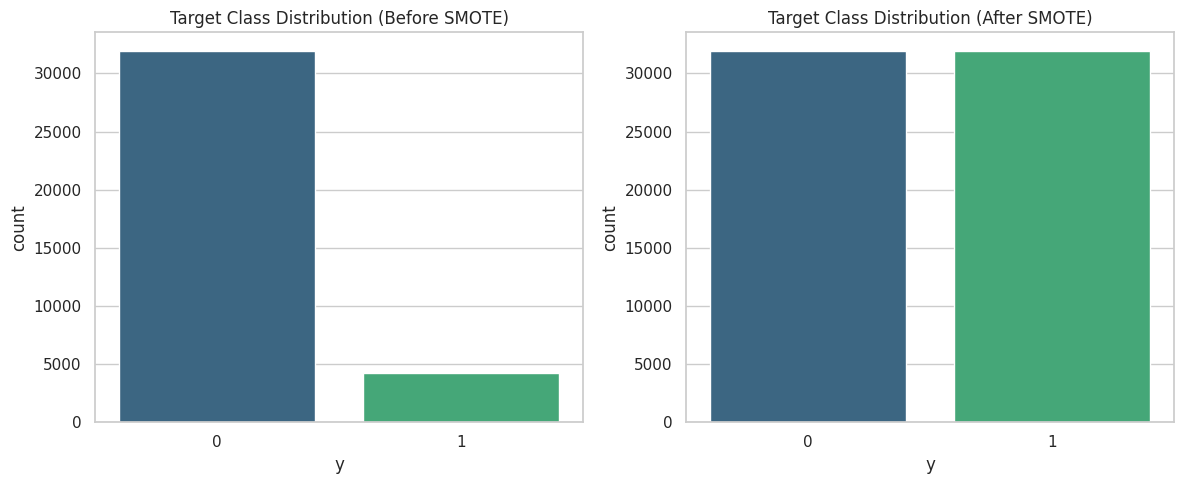

In [94]:
# Apply SMOTE ONLY to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)  # Adjust random_state as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualization: Target Class Distribution Before and After SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Target Class Distribution (Before SMOTE)")

# After SMOTE
sns.countplot(x=y_train_resampled, ax=axes[1], palette="viridis")
axes[1].set_title("Target Class Distribution (After SMOTE)")

plt.tight_layout()
plt.show()

Final visualization

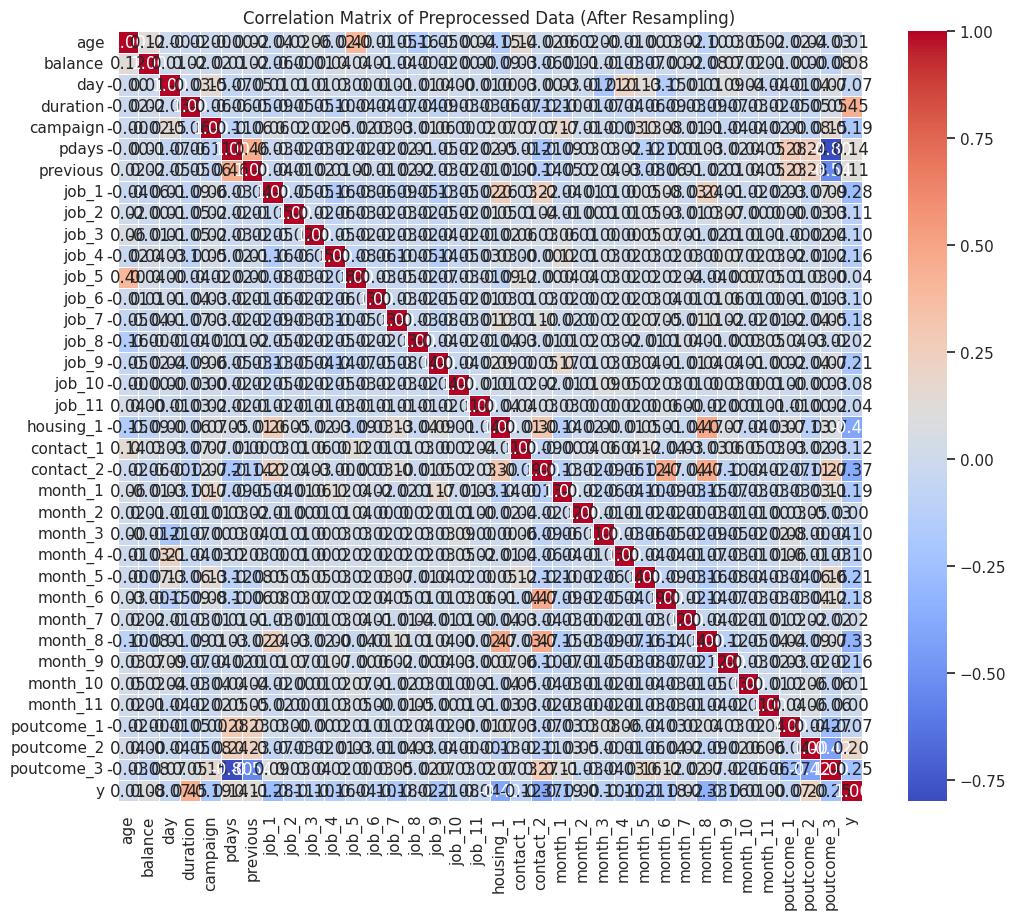

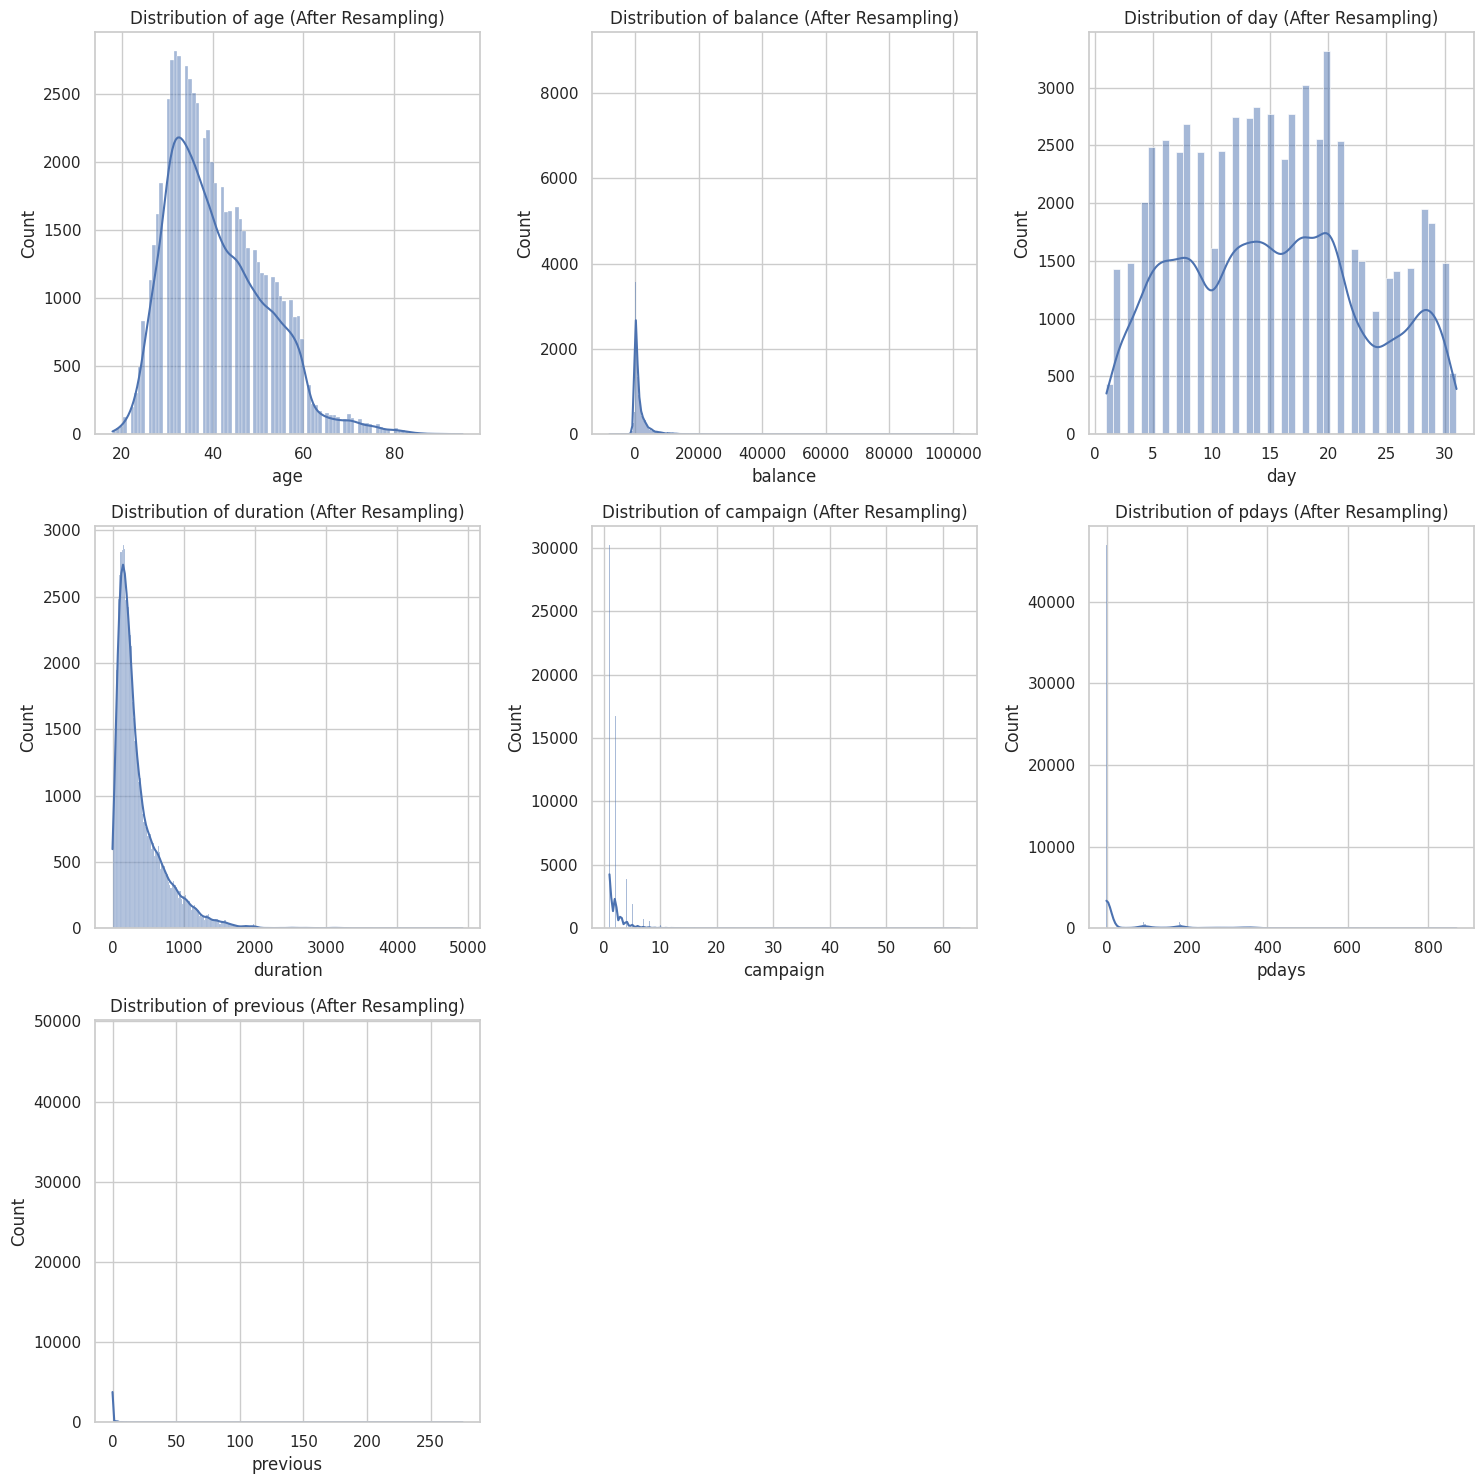

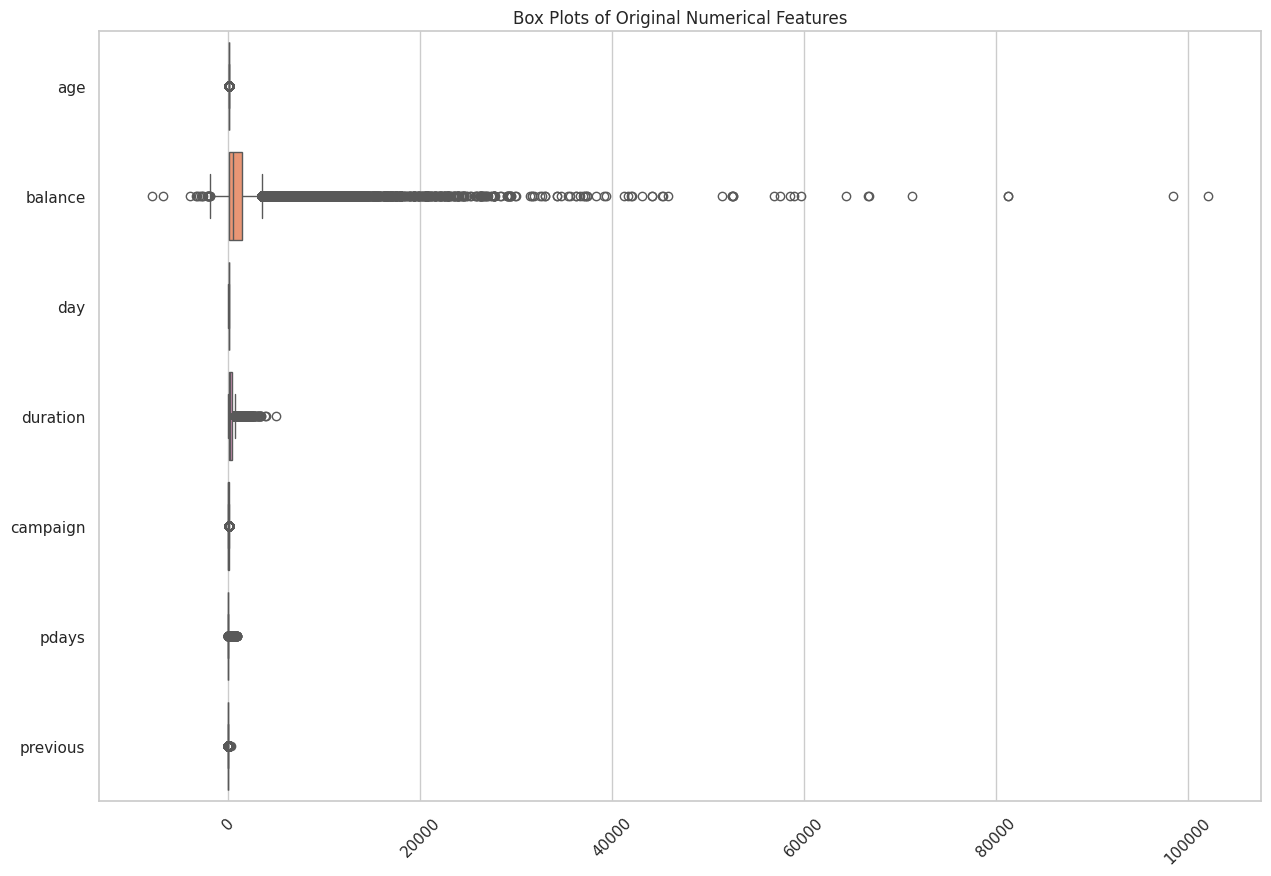

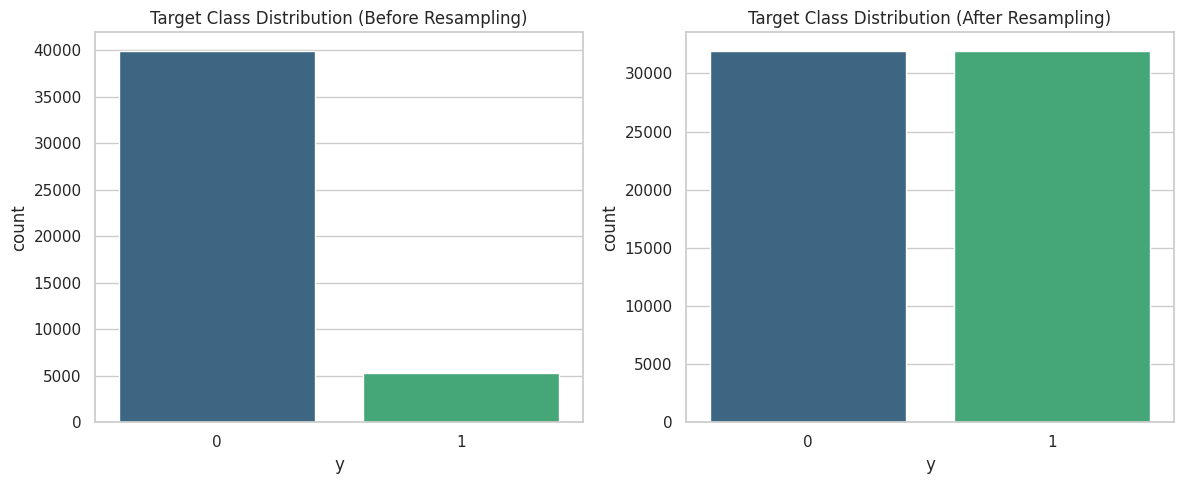

In [106]:
def visualize_preprocessed_data(X_train_resampled, y_train_resampled, selected_numerical_features, all_selected_features):
    """
    Visualizes the preprocessed dataset using various techniques.

    Args:
        X_train_resampled (pd.DataFrame): The resampled feature data.
        y_train_resampled (pd.Series): The resampled target variable.
        selected_numerical_features (list): List of selected numerical features.
        all_selected_features (list): List of all selected features (numerical and categorical).
    """

    # Combine resampled data into a DataFrame for easier visualization
    preprocessed_data = pd.DataFrame(X_train_resampled, columns=all_selected_features)
    preprocessed_data['y'] = y_train_resampled

    # 1. Correlation Matrix (Heatmap)
    plt.figure(figsize=(12, 10))
    sns.heatmap(preprocessed_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Correlation Matrix of Preprocessed Data (After Resampling)")
    plt.show()

    # 2. Distribution of Numerical Features (Histograms)
    num_features = len(selected_numerical_features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(selected_numerical_features):
        sns.histplot(preprocessed_data[feature], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {feature} (After Resampling)")

    # Hide any unused subplots
    for i in range(num_features, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # 3. Box Plots for Outlier Detection (Using Original Data)
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=bank_data[selected_numerical_features], orient="h", palette="Set2")  # Use original_bank_data
    plt.title("Box Plots of Original Numerical Features")
    plt.xticks(rotation=45)
    plt.show()

    # 4. Target Variable Distribution (Before and After Resampling)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=bank_data['y'], ax=axes[0], palette="viridis")  # Use original_bank_data
    axes[0].set_title("Target Class Distribution (Before Resampling)")
    sns.countplot(x=y_train_resampled, ax=axes[1], palette="viridis")
    axes[1].set_title("Target Class Distribution (After Resampling)")
    plt.tight_layout()
    plt.show()


visualize_preprocessed_data(X_train_resampled, y_train_resampled, selected_numerical_features, all_selected_features)

# Classifiers

Random forest

In [111]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt


# --- 2. Feature Importance Pre-selection (Optional) ---
# This section can be uncommented to pre-select features using a basic Random Forest.

rf_preselector = RandomForestClassifier(random_state=42, n_estimators=100)
rf_preselector.fit(X_train_resampled, y_train_resampled)
feature_importances = rf_preselector.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top k features (adjust k as needed)
k = 20  # Example: Select top 20 features
selected_features = feature_importance_df['Feature'][:k].tolist()
X_train_resampled = X_train_resampled[selected_features]
X_test = X_test[selected_features]


# --- 3. Define Hyperparameter Search Space (Optimized for Speed) ---
param_dist = {
    'n_estimators': randint(50, 100),  # Reduced range for the number of trees
    'max_depth': [None, 10],            # Reduced options for maximum depth
    'min_samples_split': randint(2, 5),  # Small range for min_samples_split
    'min_samples_leaf': randint(1, 2),   # Small range for min_samples_leaf
    'max_features': ['sqrt'],            # Focus on 'sqrt' for now
    'max_samples': [0.8],                 # Single value for max_samples
    # 'class_weight': ['balanced', None],  # Consider removing or adding back later
}

# --- 4. Initialize RandomizedSearchCV with Reduced Iterations and Folds ---
search_cv = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,  # Significantly reduced iterations for faster search
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # Reduced folds
    scoring='roc_auc',  # Using ROC AUC as the evaluation metric
    n_jobs=-1,  # Utilize all available CPU cores
    verbose=2,  # Print detailed information during the search
)

# --- 5. Reduce Data Size for Hyperparameter Tuning (Optional) ---
# If your dataset is very large, uncomment this section to use a smaller subset for tuning.

from sklearn.model_selection import train_test_split

# Use a fraction of the resampled data for tuning (adjust the fraction as needed)
X_tune, _, y_tune, _ = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.8, random_state=42, stratify=y_train_resampled
)

# Fit the search_cv on the smaller subset
search_cv.fit(X_tune, y_tune)


# --- 6. Train the Model (Using Full or Reduced Data) ---
# If using the full data for tuning, comment out the previous section and uncomment this line:
search_cv.fit(X_train_resampled, y_train_resampled)

# --- 7. Get the Best Model and Make Predictions ---
best_rf_model = search_cv.best_estimator_
y_pred = best_rf_model.predict(X_test)

# --- 8. Comprehensive Model Evaluation ---
# (Include the evaluation metrics and visualizations from the previous response)
# ...

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7985
           1       0.53      0.59      0.56      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.76      0.75      9043
weighted avg       0.90      0.89      0.89      9043

Accuracy: 0.8908548048214088
ROC AUC Score: 0.9190964154197437


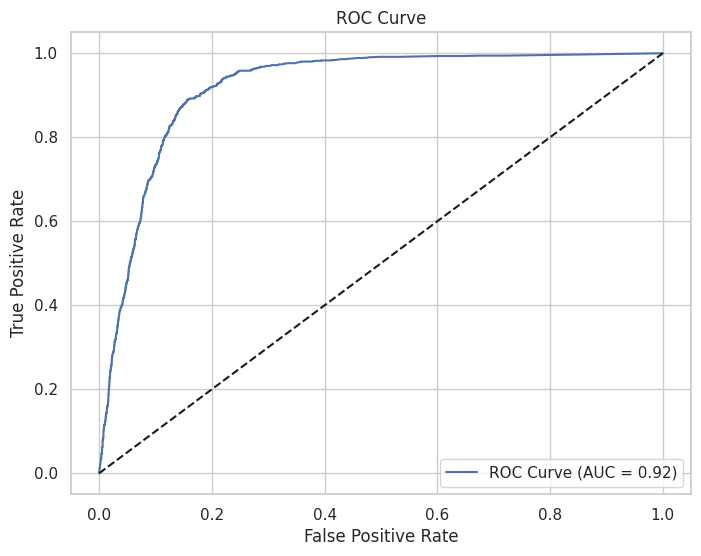

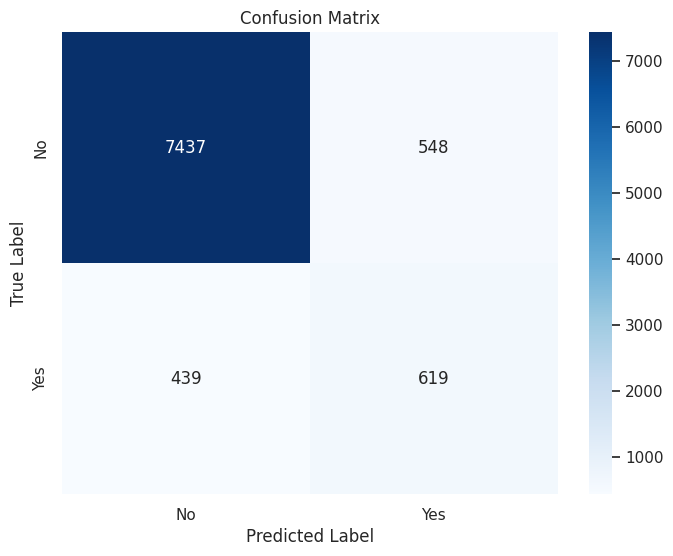

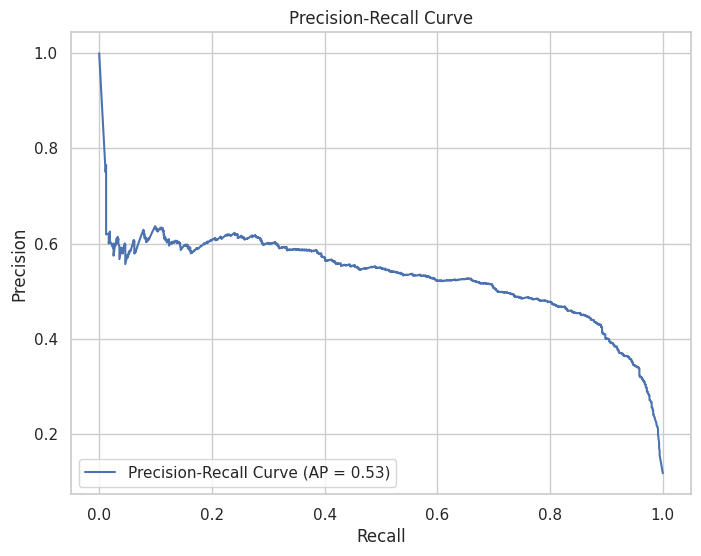

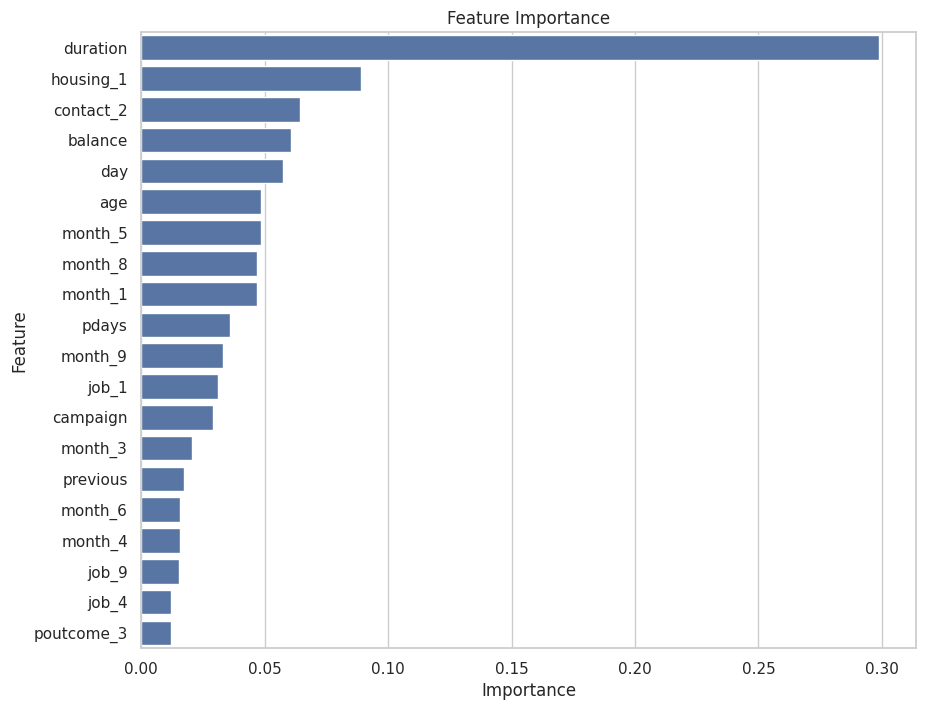

In [112]:


# --- 8. Comprehensive Model Evaluation ---

# 1. Classification Report and Accuracy
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# 2. ROC AUC Score and Curve
y_prob = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 4. Precision-Recall Curve and Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# 5. Feature Importance (Optional - if feature pre-selection was used)

if 'feature_importance_df' in locals():  # Check if feature_importance_df was created
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

Model saved to: random_forest_model.pkl

Descriptive Statistics of Incorrect Predictions:
          duration       balance         day         age       pdays  \
count   987.000000    987.000000  987.000000  987.000000  987.000000   
mean    502.939210   1972.656535   14.827761   41.877406   65.785208   
std     376.974136   3463.592177    8.238134   12.854947  117.355472   
min       8.000000  -1272.000000    1.000000   18.000000   -1.000000   
25%     216.500000    210.500000    8.000000   32.000000   -1.000000   
50%     404.000000    775.000000   15.000000   39.000000   -1.000000   
75%     680.000000   2269.000000   21.000000   50.000000   97.500000   
max    3284.000000  31630.000000   31.000000   93.000000  655.000000   

         campaign    previous    actual_y  predicted_y  
count  987.000000  987.000000  987.000000   987.000000  
mean     2.172239    0.983789    0.444782     0.555218  
std      2.499233    1.973388    0.497194     0.497194  
min      1.000000    0.000000    

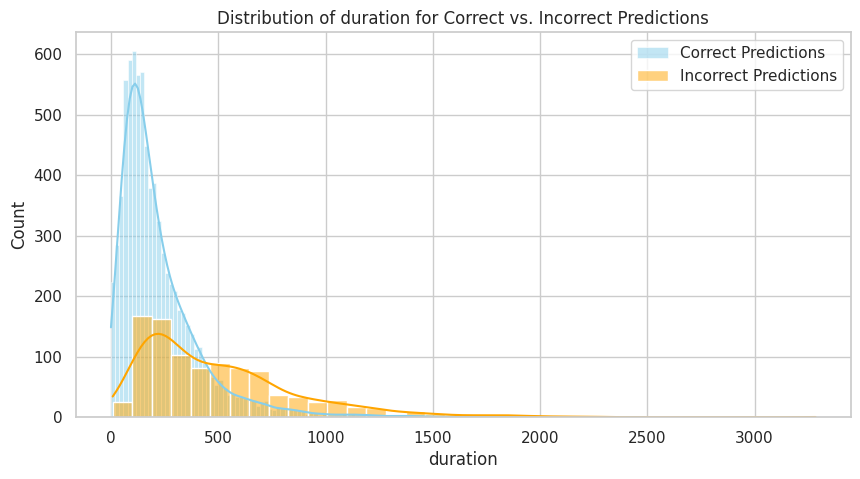

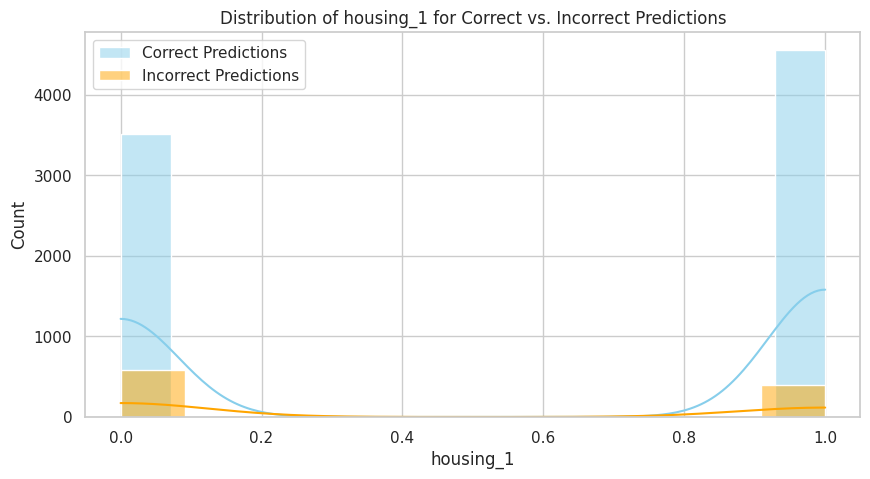

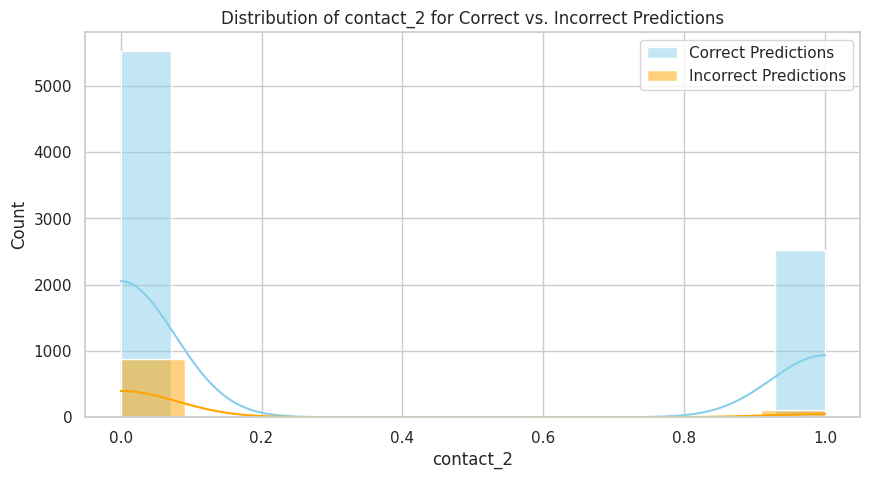

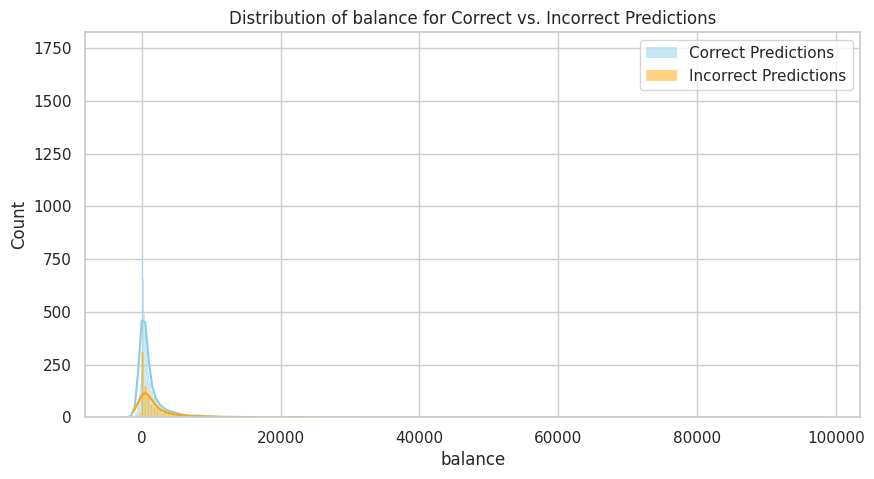

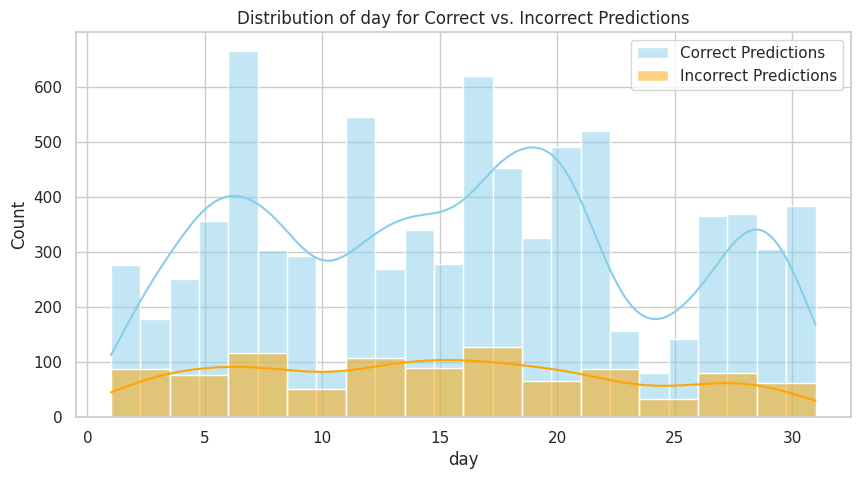


Examples of Incorrect Predictions:
       duration  housing_1  contact_2  balance  day  age  month_5  month_8  \
33749       102      False      False    10072   22   42    False    False   
43272        93       True      False     3730   11   26    False    False   
43303       129      False      False     1205   15   42    False    False   
20861       733      False      False      556   13   52    False    False   
39734       294      False      False     3382   28   58    False     True   

       month_1  pdays  ...  campaign  month_3  previous  month_6  month_4  \
33749    False     -1  ...         1    False         0    False    False   
43272    False     98  ...         1    False         4    False    False   
43303    False    188  ...         1    False         2    False    False   
20861     True     -1  ...         6    False         0    False    False   
39734    False    309  ...         2    False         2    False    False   

       job_9  job_4  poutcome_3 

In [113]:
# --- 9. Save the Model ---
import joblib

# Save the model to a file (using joblib)
model_filename = 'random_forest_model.pkl'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved to: {model_filename}")

# --- 10. Error Analysis ---
# Get indices of incorrect predictions
incorrect_indices = np.where(y_test != y_pred)[0]

# Create a DataFrame with incorrect predictions and their features
incorrect_predictions_df = X_test.iloc[incorrect_indices].copy()
incorrect_predictions_df['actual_y'] = y_test.iloc[incorrect_indices]
incorrect_predictions_df['predicted_y'] = y_pred[incorrect_indices]

# --- Analyze Incorrect Predictions ---
# 1. Descriptive Statistics:
print("\nDescriptive Statistics of Incorrect Predictions:")
print(incorrect_predictions_df.describe())

# 2. Feature Distributions:
# (Visualize the distribution of features for incorrect predictions compared to correct predictions)
for feature in selected_features[:5]:  # Example: Visualize first 5 features
    plt.figure(figsize=(10, 5))
    sns.histplot(X_test[y_test == y_pred][feature], label="Correct Predictions", color="skyblue", kde=True)
    sns.histplot(incorrect_predictions_df[feature], label="Incorrect Predictions", color="orange", kde=True)
    plt.title(f"Distribution of {feature} for Correct vs. Incorrect Predictions")
    plt.legend()
    plt.show()

# 3. Explore Specific Cases:
# (Examine individual instances of incorrect predictions to identify patterns)
print("\nExamples of Incorrect Predictions:")
print(incorrect_predictions_df.head()) # Print first few incorrect predictions

#machine learning model based on Neural Networks

Epoch 1/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6135 - loss: 10.6740 - val_accuracy: 0.3595 - val_loss: 0.7935
Epoch 2/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6964 - loss: 0.6148 - val_accuracy: 0.4482 - val_loss: 0.7645
Epoch 3/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7263 - loss: 0.5573 - val_accuracy: 0.5800 - val_loss: 0.6580
Epoch 4/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7418 - loss: 0.5359 - val_accuracy: 0.5797 - val_loss: 0.6725
Epoch 5/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7635 - loss: 0.4894 - val_accuracy: 0.4141 - val_loss: 0.8095
Epoch 6/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7992 - loss: 0.4330 - val_accuracy: 0.8059 - val_loss: 0.4494
Epoch 7/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8387 - loss: 0.3759 - val_accuracy: 0.9216 - val_loss: 0.2446
Epoch 8/100
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8552 - loss: 

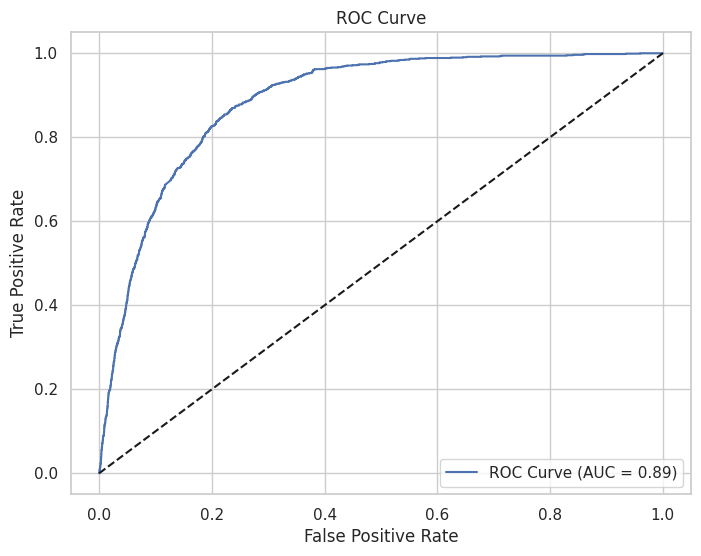

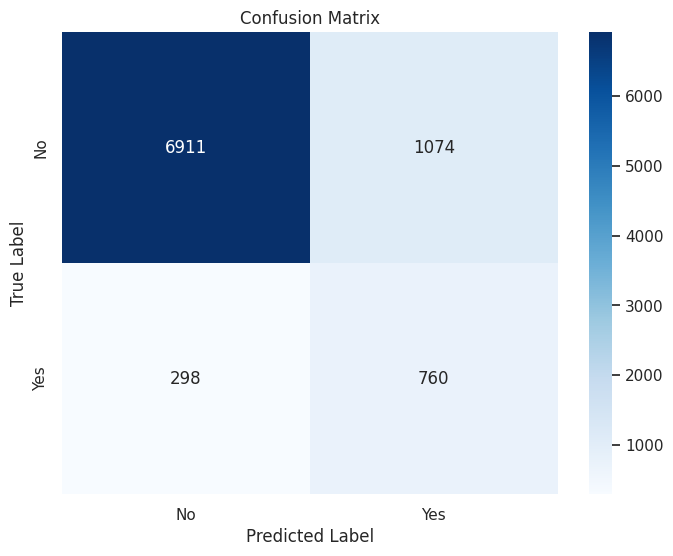

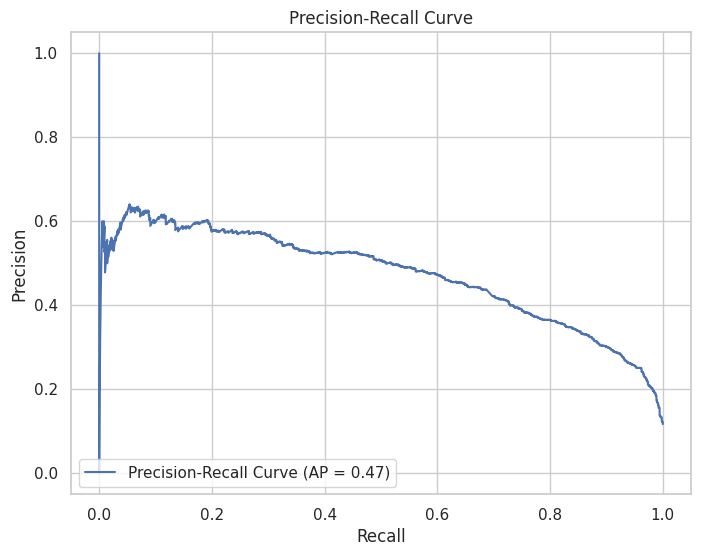

Model saved to neural_network_model.h5


In [115]:
# prompt: now i have completed the random forest implementation, so now i need a machine learning models based on Neural Networks  to do the same task, so fully read my existing code and give all the codes with comments needed for that, i need a advanced optimized code with all enhancements and fully runnable and  completed

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# --- Neural Network Model ---

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)))  # Input layer
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu')) # Hidden Layer
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Make sure X_train_resampled and X_test have the same columns
# Get a list of common columns between X_train_resampled and X_test
common_cols = list(set(X_train_resampled.columns) & set(X_test.columns))

# Select only the common columns from both DataFrames
X_train_resampled = X_train_resampled[common_cols]
X_test = X_test[common_cols]

# Ensure all features are of numeric type and convert to float32
X_train_resampled = X_train_resampled.astype(np.float32)
X_test = X_test.astype(np.float32)


# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=100,  # Adjust the number of epochs as needed
    batch_size=32, # Adjust the batch size as needed
    validation_split=0.2,  # Use a validation set
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

# --- Model Evaluation ---

# 1. Classification Report and Accuracy
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


# 2. ROC AUC Score and Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 4. Precision-Recall Curve and Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


#Save the model
model_filename = 'neural_network_model.h5'
model.save(model_filename)
print(f"Model saved to {model_filename}")

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Random Forest Evaluation ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7985
           1       0.53      0.59      0.56      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.76      0.75      9043
weighted avg       0.90      0.89      0.89      9043

Accuracy: 0.8909
ROC AUC Score: 0.9191
Average Precision: 0.5293
------------------------------
--- Neural Network Evaluation ---
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7985
           1       0.41      0.72      0.53      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.79      0.72      9043
weighted avg       0.89      0.85      0.86      9043

Accuracy: 0.8483
ROC AUC Score: 0.8879
Average Precision: 0.4726
------------------------------


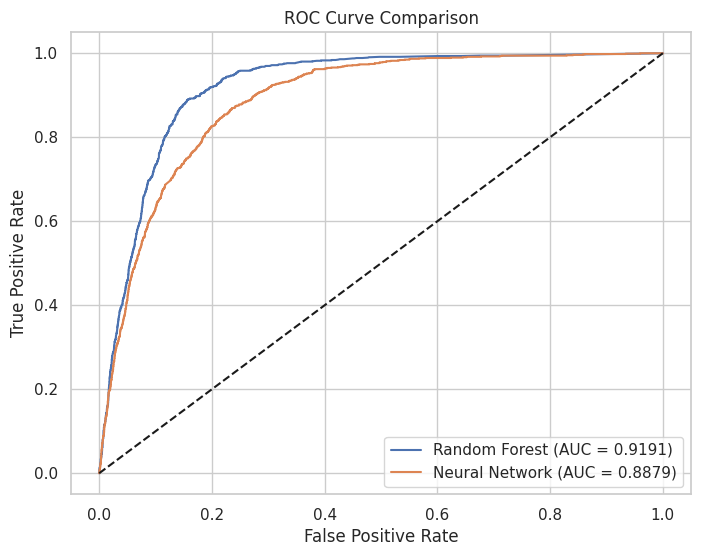

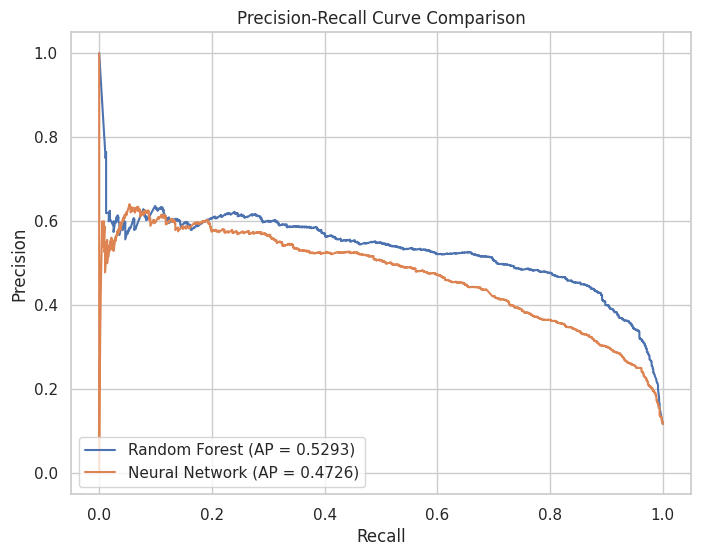

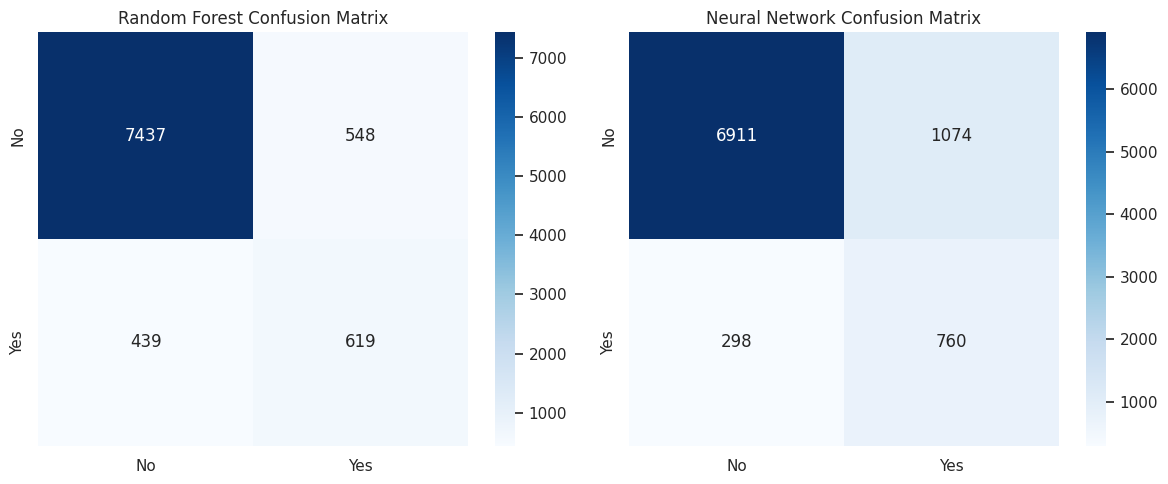

In [120]:
# --- Model Evaluation and Comparison ---

# --- Random Forest Evaluation ---
# Ensure X_test has the same features as used during training (all_selected_features)
# Get the feature names the model was trained on
training_features = best_rf_model.feature_names_in_

# Select only these features from X_test, in the correct order
X_test_rf = X_test[training_features]

y_pred_rf = best_rf_model.predict(X_test_rf)  # Predict on X_test_rf
y_prob_rf = best_rf_model.predict_proba(X_test_rf)[:, 1]  # Predict probabilities on X_test_rf

# --- Neural Network Evaluation ---
# Make sure X_test has the same features and order as the neural network expects
X_test_nn = X_test[X_train_resampled.columns]  # Use X_train_resampled columns as reference

y_pred_nn = model.predict(X_test_nn)  # Predict on X_test_nn
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to binary predictions
y_prob_nn = model.predict(X_test_nn)  # Predict probabilities on X_test_nn

# --- Evaluation Metrics ---
def evaluate_model(y_true, y_pred, y_prob, model_name):
    """Evaluates a model and prints the results."""
    print(f"--- {model_name} Evaluation ---")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    print(f"Average Precision: {average_precision_score(y_true, y_prob):.4f}")
    print("-" * 30)

evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_nn, y_prob_nn, "Neural Network")

# --- Advanced Visualizations ---

# 1. ROC Curve Comparison
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.4f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_score(y_test, y_prob_nn):.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve Comparison
plt.figure(figsize=(8, 6))
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_prob_nn)
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP = {average_precision_score(y_test, y_prob_rf):.4f})")
plt.plot(recall_nn, precision_nn, label=f"Neural Network (AP = {average_precision_score(y_test, y_prob_nn):.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend(loc="lower left")
plt.show()

# 3. Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", ax=axes[1],
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
axes[1].set_title("Neural Network Confusion Matrix")
plt.tight_layout()
plt.show()